In [5]:
import pandas as pd
import numpy as np
import jieba
import os

In [6]:
news_content = pd.read_csv('sqlResult_1558435.csv', encoding='gb18030')

In [7]:
news_content.head()

id      author                  source  \
0  89617         NaN  快科技@http://www.kkj.cn/   
1  89616         NaN  快科技@http://www.kkj.cn/   
2  89615         NaN  快科技@http://www.kkj.cn/   
3  89614         NaN                     新华社   
4  89613  胡淑丽_MN7479                   深圳大件事   

                                             content  \
0  此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...   
1  骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...   
2  此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...   
3    这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n   
4  （原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...   

                                             feature  \
0  {"type":"科技","site":"cnbeta","commentNum":"37"...   
1  {"type":"科技","site":"cnbeta","commentNum":"15"...   
2  {"type":"科技","site":"cnbeta","commentNum":"18"...   
3  {"type":"国际新闻","site":"环球","commentNum":"0","j...   
4  {"type":"新闻","site":"网易热门","commentNum":"978",...   

                           title  \
0           小米MIUI 9首批机型曝光：共计15款   
1     骁龙835在Windows 10上的性能表现有望改善   
2      一加手机5细节曝光：3300mAh、充半小时用1天   
3  葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）   
4       44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随   

                                                 url  
0     http://www.cnbeta.com/articles/tech/623597.htm  
1     http://www.cnbeta.com/articles/tech/623599.htm  
2     http://www.cnbeta.com/articles/tech/623601.htm  
3  http://world.huanqiu.com/hot/2017-06/10866126....  
4  http://news.163.com/17/0618/00/CN617P3Q0001875...

In [1]:
from gensim.models import FastText

In [8]:
def cut(string):
    return ' '.join(jieba.cut(string))

In [9]:
pure_content = pd.DataFrame()

In [10]:
pure_content['content'] = news_content['content']

In [11]:
pure_content=pure_content.fillna('')
pure_content['tokenized_content'] = pure_content['content'].apply(cut)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ZOUCHE~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.327 seconds.
Prefix dict has been built succesfully.


In [12]:
pure_content.head()

content  \
0  此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...   
1  骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...   
2  此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...   
3    这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n   
4  （原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...   

                                   tokenized_content  
0  此外 ， 自 本周 （ 6 月 12 日 ） 起 ， 除 小米 手机 6 等 15 款 机型...  
1  骁龙 835 作为 唯一 通过 Windows   10 桌面 平台 认证 的 ARM 处理...  
2  此前 的 一加 3T 搭载 的 是 3400mAh 电池 ， DashCharge 快充 规...  
3  这是 6 月 18 日 在 葡萄牙 中部 大 佩德罗 冈 地区 拍摄 的 被 森林 大火 烧...  
4  （ 原 标题 ： 44 岁 女子 跑 深圳 约会 网友 被 拒 ， 暴雨 中 裸身 奔走 …...

In [146]:
with open('corpus.txt','w',encoding='utf-8') as f:
    f.write(' '.join(pure_content['tokenized_content'].tolist()))

In [147]:
from gensim.models.word2vec import LineSentence

In [148]:
model=FastText(LineSentence('corpus.txt'), window=5,size=35,iter=10,min_count=1)

In [149]:
model.save('summar_word2vec.model')

In [4]:
from functools import reduce

In [13]:
# vacabulary word count
tokeners=[t for l in pure_content['tokenized_content'] for t in l.split()]

In [14]:
tokeners[:10]

['此外', '，', '自', '本周', '（', '6', '月', '12', '日', '）']

In [15]:
from collections import Counter

In [16]:
tokeners_counter = Counter(tokeners)

In [17]:
frequence={w: count/len(tokeners) for w, count in tokeners_counter.items()}

float

In [205]:
with open('frequency.txt', 'w', encoding='utf-8') as f:
    for k,v in tqdm(frequence.items()):
        f.write('{}:{}{}'.format(k,v,'\r\n'))



  0%|                                                                                       | 0/257938 [00:00<?, ?it/s]

  5%|███▎                                                                   | 12241/257938 [00:00<00:02, 122083.83it/s]

  9%|██████▍                                                                | 23523/257938 [00:00<00:01, 118784.16it/s]

 13%|█████████▏                                                             | 33295/257938 [00:00<00:02, 111467.59it/s]

 17%|████████████                                                           | 43776/257938 [00:00<00:01, 109292.07it/s]

 22%|███████████████▌                                                       | 56420/257938 [00:00<00:01, 113846.02it/s]

 27%|██████████████████▉                                                    | 68769/257938 [00:00<00:01, 116489.74it/s]

 31%|█████████████████████▊                                                 | 79073/257938 [00:00<00:01, 112002.72it/s]

 35%|████████████████████████▌

In [206]:
with open('frequency1.txt', 'w', encoding='utf-8') as f:
    count=0
    for k,v in tqdm(frequence.items()):
        f.write('{}:{}{}'.format(k,v,'\r\n'))
        if(count > 10):
            break
        count+=1



  0%|                                                                                       | 0/257938 [00:00<?, ?it/s]

In [207]:
def get_frequency():
    frequency = {}
    with open('frequency1.txt', 'r', encoding='utf-8') as f:
        for line in f.readlines():
            split = line.split(':')
            frequency[split[0]] = np.float(split[1])
    return frequency

In [209]:
fre={}
with open('frequency.txt', 'r', encoding='utf-8') as f:
    for line in f.readlines():
        if line.isspace():
            continue
        split=line.split(':')
        fre[split[0]]=split[1]

In [210]:
count=0
for k,v in fre.items():
    print(k+":"+v)
    count+=1
    if(count>10):
        break

此外:0.0001881903392340631

，:0.06041265049289309

自:0.00021438338008051208

本周:2.157596245995628e-05

（:0.009435221657720264

6:0.0014521155475364401

月:0.008413959434615667

12:0.00046472669759428463

日:0.007545060798265328

）:0.009446453588795097

起:0.00023378398830067854



In [18]:
occurences_frequences = sorted(list(frequence.values()), reverse=True)

In [19]:
X=range(len(occurences_frequences))

In [22]:
import matplotlib.pyplot as plt

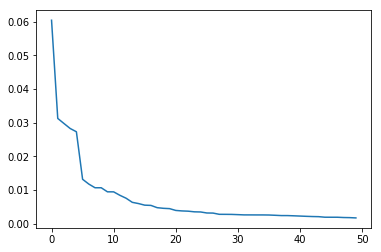

In [23]:
plt.plot(X[:50],occurences_frequences[:50])

## 使用TextRank

In [25]:
!pip install networkx

  Stored in directory: C:\Users\zouchengyuan\AppData\Local\pip\Cache\wheels\de\63\64\3699be2a9d0ccdb37c7f16329acf3863fd76eda58c39c737af
Successfully built networkx


In [26]:
import networkx

In [27]:
import random

In [28]:
def generate_name(length=3):
    return ''.join(chr(random.randint(65,73)) for _ in range(length))

In [29]:
generate_name()

'DGG'

In [31]:
graph={
    'Yao': ['Guo', 'Wang', 'Tian', 'Tim'] + [generate_name() for _ in range(6)], 
    'Guo': ['Li'] + [generate_name() for _ in range(5)], 
    'Wang': ['Li_2'] + [generate_name() for _ in range(5)], 
    'Li': [generate_name() for _ in range(3)], 
    'Li_2': [generate_name() for _ in range(1)]
}

In [32]:
graph

{'Yao': ['Guo',
  'Wang',
  'Tian',
  'Tim',
  'IHA',
  'IGE',
  'DFF',
  'BFF',
  'FBB',
  'BFE'],
 'Guo': ['Li', 'DFA', 'BGG', 'ADF', 'CBD', 'BHD'],
 'Wang': ['Li_2', 'FGE', 'GCF', 'DHH', 'CCF', 'FED'],
 'Li': ['HID', 'IHA', 'ADI'],
 'Li_2': ['CEB']}

In [33]:
social_network = networkx.graph.Graph()

In [34]:
for vertex, edge in graph.items():
    for v in edge:
        social_network.add_edges_from([(vertex,v)])

In [35]:
%matplotlib inline

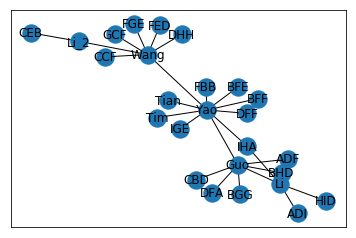

In [36]:
networkx.draw_networkx(social_network)

In [37]:
ranking_result = networkx.pagerank(social_network)

In [87]:
ranking_result

{'Yao': 0.1745008505752919,
 'Guo': 0.12486245797154708,
 'Wang': 0.1295389332260547,
 'Tian': 0.02060187404656145,
 'Tim': 0.02060187404656145,
 'IHA': 0.03590479194339524,
 'IGE': 0.02060187404656145,
 'DFF': 0.02060187404656145,
 'BFF': 0.02060187404656145,
 'FBB': 0.02060187404656145,
 'BFE': 0.02060187404656145,
 'Li': 0.0720114572739808,
 'DFA': 0.020930622481838416,
 'BGG': 0.020930622481838416,
 'ADF': 0.020930622481838416,
 'CBD': 0.020930622481838416,
 'BHD': 0.020930622481838416,
 'Li_2': 0.04133646688141793,
 'FGE': 0.021499622572023456,
 'GCF': 0.021499622572023456,
 'DHH': 0.021499622572023456,
 'CCF': 0.021499622572023456,
 'FED': 0.021499622572023456,
 'HID': 0.021072148666064563,
 'ADI': 0.021072148666064563,
 'CEB': 0.023336401200943737}

In [38]:
sorted(ranking_result.items(), key=lambda x: x[1], reverse=True)

[('Yao', 0.1745008505752919),
 ('Wang', 0.1295389332260547),
 ('Guo', 0.12486245797154708),
 ('Li', 0.0720114572739808),
 ('Li_2', 0.04133646688141793),
 ('IHA', 0.03590479194339524),
 ('CEB', 0.023336401200943737),
 ('FGE', 0.021499622572023456),
 ('GCF', 0.021499622572023456),
 ('DHH', 0.021499622572023456),
 ('CCF', 0.021499622572023456),
 ('FED', 0.021499622572023456),
 ('HID', 0.021072148666064563),
 ('ADI', 0.021072148666064563),
 ('DFA', 0.020930622481838416),
 ('BGG', 0.020930622481838416),
 ('ADF', 0.020930622481838416),
 ('CBD', 0.020930622481838416),
 ('BHD', 0.020930622481838416),
 ('Tian', 0.02060187404656145),
 ('Tim', 0.02060187404656145),
 ('IGE', 0.02060187404656145),
 ('DFF', 0.02060187404656145),
 ('BFF', 0.02060187404656145),
 ('FBB', 0.02060187404656145),
 ('BFE', 0.02060187404656145)]

In [39]:
pure_content.head()

content  \
0  此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...   
1  骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...   
2  此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...   
3    这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n   
4  （原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...   

                                   tokenized_content  
0  此外 ， 自 本周 （ 6 月 12 日 ） 起 ， 除 小米 手机 6 等 15 款 机型...  
1  骁龙 835 作为 唯一 通过 Windows   10 桌面 平台 认证 的 ARM 处理...  
2  此前 的 一加 3T 搭载 的 是 3400mAh 电池 ， DashCharge 快充 规...  
3  这是 6 月 18 日 在 葡萄牙 中部 大 佩德罗 冈 地区 拍摄 的 被 森林 大火 烧...  
4  （ 原 标题 ： 44 岁 女子 跑 深圳 约会 网友 被 拒 ， 暴雨 中 裸身 奔走 …...

In [40]:
lengthes_of_text = map(len, pure_content['content'].tolist())

In [41]:
import matplotlib.font_manager as fm

In [42]:
networkx.__path__

['E:\\App\\Anaconda\\envs\\dllearn\\lib\\site-packages\\networkx']

In [43]:
fp1=fm.FontProperties(fname='SourceHanSerifSC-Regular.otf')

In [44]:
def get_connect_graph_by_text_rank(tokenized_text: str, window=3):
    keywords_graph = networkx.Graph()
    tokeners = tokenized_text.split()
    for ii, t in enumerate(tokeners):
        word_tuples = [(tokeners[connect], t) 
                       for connect in range(ii-window, ii+window+1) 
                       if connect >= 0 and connect < len(tokeners)]
        keywords_graph.add_edges_from(word_tuples)

    return keywords_graph

In [48]:
first_content_continous = pure_content.iloc[1]['content']

In [50]:
import re

In [56]:
pattern=re.compile('[。，,.]')
token_by_sentence_first=pattern.sub(' ', first_content_continous)

In [57]:
token_by_sentence_first[:10]

'骁龙835作为唯一通'

In [69]:
first_content=pure_content.iloc[1]['tokenized_content']

In [70]:
sentence_graph=get_connect_graph_by_text_rank(first_content)

In [141]:
from matplotlib import rcParams
rcParams['font.family'] = 'SourceHanSerifSC-Regular.otf'

In [142]:
%matplotlib inline

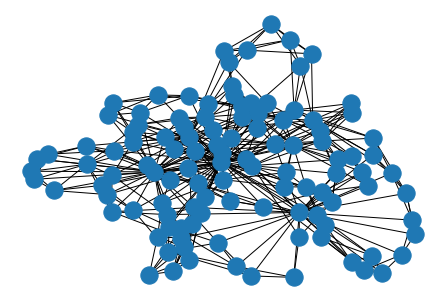

In [143]:
networkx.draw(sentence_graph)

In [60]:
ranking_sentence = networkx.pagerank(sentence_graph)

In [91]:
def split_sentence(sentence):
    pattern=re.compile('[.,。，]:')
    split=pattern.sub(' ',sentence).split()
    return split

In [92]:
def get_summarization_simple_with_text_rank(text, constraint=200):
    return get_summarization_simple(text, sentence_ranking_by_text_ranking, constraint)

In [93]:
def get_summarization_simple(text, score_fn, constraint=200):
    sub_sentence = split_sentence(text)
    ranking_sentence = score_fn(sub_sentence)
    selected_text = set()
    current_text = ''
    
    for sen, _ in ranking_sentence:
        if len(current_text) < constraint:
            current_text += sen
            selected_text.add(sen)
        else:
            break

    summarized = []
    for sen in sub_sentence:  # print the selected sentence by sequent
        if sen in selected_text:
            summarized.append(sen)
    return summarized

In [94]:
def sentence_ranking_by_text_ranking(split_sentence):
    sentence_graph = get_connect_graph_by_text_rank(' '.join(split_sentence))
    ranking_sentence = networkx.pagerank(sentence_graph)
    ranking_sentence = sorted(ranking_sentence.items(), key=lambda x: x[1], reverse=True)
    return ranking_sentence

In [72]:
get_summarization_simple_with_text_rank(first_content_continous)

['10桌面平台认证的ARM处理器，高通强调，不会因为只考虑性能而去屏蔽掉小核心。相反，他们正联手微软，找到一种适合桌面平台的、兼顾性能和功耗的完美方案。',
 '报道称，微软已经拿到了一些新的源码，以便Windows',
 '10更好地理解big.little架构。',
 '资料显示，骁龙835作为一款集成了CPU、GPU、基带、蓝牙/Wi-Fi的SoC，比传统的Wintel方案可以节省至少30%的PCB空间。',
 '按计划，今年Q4，华硕、惠普、联想将首发骁龙835',
 'Win10电脑，预计均是二合一形态的产品。']

In [73]:
first_content_continous

'骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考虑性能而去屏蔽掉小核心。相反，他们正联手微软，找到一种适合桌面平台的、兼顾性能和功耗的完美方案。\r\n报道称，微软已经拿到了一些新的源码，以便Windows 10更好地理解big.little架构。\r\n资料显示，骁龙835作为一款集成了CPU、GPU、基带、蓝牙/Wi-Fi的SoC，比传统的Wintel方案可以节省至少30%的PCB空间。\r\n按计划，今年Q4，华硕、惠普、联想将首发骁龙835 Win10电脑，预计均是二合一形态的产品。\r\n当然，高通骁龙只是个开始，未来也许还能见到三星Exynos、联发科、华为麒麟、小米澎湃等进入Windows 10桌面平台。\r\n'

In [74]:
four_content_continous=pure_content.iloc[4]['content']

In [95]:
get_summarization_simple_with_text_rank(four_content_continous)

['到底都发生了些什么呢？',
 '南都记者带您一起还原现场',
 '南都记者在龙岗大队坂田中队见到了辅警刘青（发现女生的辅警），一位外表高大帅气，说话略带些腼腆的90后青年。',
 '刘青介绍，6月16日早上7时36分，他正在环城南路附近值勤，接到中队关于一位女子裸身进入机动车可能有危险的警情，随后骑着小铁骑开始沿路寻找，大概花了十多分钟在南坪大道坂田出口往龙岗方向的逆行辅道上发现该女子。',
 '@中華云盾：警察……警察就是群众最需时申出援手',
 '@Tomchlee：蜀黍帅！',
 '@SJ-李赫海i：这个交警很暖有木有！']

In [76]:
four_content_continous

'（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清晨交警发现有一女子赤裸上身，行走在南坪快速上，期间还起了轻生年头，一辅警发现后赶紧为其披上黄衣，并一路劝说她。\r\n那么事发时\r\n到底都发生了些什么呢？\r\n南都记者带您一起还原现场\r\n南都记者在龙岗大队坂田中队见到了辅警刘青（发现女生的辅警），一位外表高大帅气，说话略带些腼腆的90后青年。\r\n刘青介绍，6月16日早上7时36分，他正在环城南路附近值勤，接到中队关于一位女子裸身进入机动车可能有危险的警情，随后骑着小铁骑开始沿路寻找，大概花了十多分钟在南坪大道坂田出口往龙岗方向的逆行辅道上发现该女子。\r\n女子身上一丝不挂地逆车流而行，时走时停，时坐时躺，险象环生。刘青停好小铁骑，和另外一名巡防员追了上去，发现女子的情绪很低落，话不多，刘青尝试和女子交流，劝说女子离开，可女子并不愿意接受，继续缓慢地往南坪快速路的主干道上走去。\r\n此时路边上已经聚集了很市民围观，为了不刺激女子的情绪，刘青和巡防员一边盯着女子一边驱赶着围观的群众。\r\n现场还原\r\n从警方提供的一份视频了解到，16日早上7时25分，女子出现在坂雪岗大道与环城南路的监控视频中，此时女子还穿着白色的内裤，正沿着坂雪岗大道往南坪快速的方向缓慢地走着。\r\n当时正值上班高峰期，十字路口的车流已经排起了长队。当女子出现时，路上的市民纷纷驻足观望，不少车辆也放慢了速度，但女子并不为市民观望停下脚步，依然缓慢走着。当女子行进到十字路口中间时，一辆大货车挡住了镜头，但是当女子再次出现镜头时，可以发现女子已经没穿内裤了，全身裸露继续朝着南坪快速方向走去。记者发现，视频中女子周围并没有人尾随或者上前劝止的市民。\r\n一大清早路上看到这样的情况\r\n恐怕大家都没办法淡定\r\n面对这一情况\r\n刘青表示，“一开始根本不敢看她，心里挺别扭，感觉很尴尬”，但当刘青跟随女子上了南坪快速路主干道时，女子作出了让人意想不到的举动，她突然靠近护栏要从上面跳下去，刘青赶忙冲上去拉住了女子的手，将其控制住并远离护栏。碍于女子没有穿衣服，刘青递上衣服，女子没接受还把衣服扔到排水沟里，继续往前走，没办法刘青只能紧紧拉着她的一只手跟在后面。\r\n刘青一路上耐心地开导安慰她，但只听到她不断地重复着一句话“要是你也遭遇我的

## 使用词的PageRank进行摘要提取

In [81]:
from collections import defaultdict

In [88]:
import numpy as np

In [126]:
def split_sentence1(sentence):
    pattern=re.compile('[.,。，]')
    split=pattern.sub(' ',sentence).split()
    return split

In [127]:
def get_summarization_simple_with_text_rank1(text, constraint=200):
    return get_summarization_simple1(text, sentence_ranking_by_text_ranking1, constraint)

In [128]:
def get_summarization_simple1(text, score_fn, constraint=200):
    sub_sentence = split_sentence1(text)
    ranking_sentence = score_fn(sub_sentence)
    selected_text = set()
    current_text = ''
    
    for sen, _ in ranking_sentence:
        if len(current_text) < constraint:
            current_text += sen
            selected_text.add(sen)
        else:
            break

    summarized = []
    for sen in sub_sentence:  # print the selected sentence by sequent
        if sen in selected_text:
            summarized.append(sen)
    return summarized

In [133]:
def sentence_ranking_by_text_ranking1(split_sentence):
    text_word=cut(''.join(split_sentence))
    word_graph = get_connect_graph_by_text_rank(text_word)
    ranking_word = networkx.pagerank(word_graph)
    ranking_sentence={sentence: np.mean([ranking_word[word] for word in jieba.cut(sentence) if word in ranking_word]) for sentence in split_sentence}
    ranking_sentence = sorted(ranking_sentence.items(), key=lambda x: x[1], reverse=True)
    return ranking_sentence

In [134]:
get_summarization_simple_with_text_rank1(first_content_continous)

['骁龙835作为唯一通过Windows',
 '10桌面平台认证的ARM处理器',
 '找到一种适合桌面平台的、兼顾性能和功耗的完美方案',
 '微软已经拿到了一些新的源码',
 '骁龙835作为一款集成了CPU、GPU、基带、蓝牙/Wi-Fi的SoC',
 '比传统的Wintel方案可以节省至少30%的PCB空间',
 '华硕、惠普、联想将首发骁龙835',
 '预计均是二合一形态的产品',
 '高通骁龙只是个开始',
 '未来也许还能见到三星Exynos、联发科、华为麒麟、小米澎湃等进入Windows',
 '10桌面平台']

In [135]:
first_content_continous

'骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考虑性能而去屏蔽掉小核心。相反，他们正联手微软，找到一种适合桌面平台的、兼顾性能和功耗的完美方案。\r\n报道称，微软已经拿到了一些新的源码，以便Windows 10更好地理解big.little架构。\r\n资料显示，骁龙835作为一款集成了CPU、GPU、基带、蓝牙/Wi-Fi的SoC，比传统的Wintel方案可以节省至少30%的PCB空间。\r\n按计划，今年Q4，华硕、惠普、联想将首发骁龙835 Win10电脑，预计均是二合一形态的产品。\r\n当然，高通骁龙只是个开始，未来也许还能见到三星Exynos、联发科、华为麒麟、小米澎湃等进入Windows 10桌面平台。\r\n'

In [140]:
' '.join(get_summarization_simple_with_text_rank1('新浪科技讯 10月14日下午消息，贾跃亭于10月13日在美国主动申请个人破产重组（Chapter 11），这一消息也得到了得到官方确认。贾跃亭债务处理小组在发布的《有关贾跃亭先生个人破产重组及成立债权人信托的声明》（以下简称声明）中表示，贾跃亭已于美国当地时间10月13日根据美国相关法律第11章（chapter 11）主动申请个人破产重组。FF发表声明称，贾跃亭个人破产重组方案完成后，贾跃亭把个人所持有的全部FF股权和相关收益权转让给债权人，个人担保义务和债务得以解除，从而可以回国推动和落实FF中美双主场战略，这对FF成功融资和未来IPO都是重大利好，尤其对FF中国业务的快速发展意义重大。FF表示，贾跃亭放弃所有FF股权及相关收益权，只为彻底地还债，以及把FF做成一个伟大的公司。贾跃亭力推的FF合伙人制改革已经完成，为FF成为伟大的公司奠定了先进的公司治理架构基础，并通过合伙人机制源源不断地吸引全球跨行业的精英共同创业。贾跃亭将继续以FF创始人和CPUO的身份推动FF团队完成既定战略目标，实现FF股权资产价值和债权人信托资产价值最大化，从而使全体债权人通过信托资产的增值实现偿债目标。', 100))

'FF发表声明称 贾跃亭把个人所持有的全部FF股权和相关收益权转让给债权人 FF表示 以及把FF做成一个伟大的公司 贾跃亭力推的FF合伙人制改革已经完成 贾跃亭将继续以FF创始人和CPUO的身份推动FF团队完成既定战略目标'

## Sentence Embedding方法

In [150]:
frequence.get?

In [166]:
def get_sentence_embedding(sentence):
        #pattern = re.compile(r'[\u4E00-\u9FA5]')
        # 匹配所有中文
        #filecontent = pattern.findall(sentence)
        #filestr = ''.join(filecontent)
        # 分词
        words = jieba.cut(sentence)
        # 去除停用词
        #stopwords = self.get_stop_words()
        #filefinal=[word for word in filecut if word not in stopwords]
        #content = ' '.join(filecut)
        global frequence
        max_fre=max(frequence.values())
        sentence_vec=np.zeros_like(model.wv['测试'])
        words=[w for w in words if w in model]
        alpha=1e-4
        for w in words:
            weight=alpha/(alpha+frequence.get(w,max_fre))
            sentence_vec+=weight*model.wv[w]
        sentence_vec /= len(words)
        return sentence_vec

In [152]:
from sklearn.decomposition import TruncatedSVD

In [153]:
def compute_pc(embedings):
    svd=TruncatedSVD(n_components=1,n_iter=7, random_state=0)
    svd.fit(embedings)
    return svd.components_

In [159]:
from tqdm import tqdm

In [168]:
embeddings=[]
for percontent in tqdm(pure_content['content'].tolist()):
    sentences=split_sentence(percontent)
    for sentence in sentences:
        sentence_vec=get_sentence_embedding(sentence)
        embeddings.append(sentence_vec)



  0%|                                                                                        | 0/89611 [00:00<?, ?it/s]E:\App\Anaconda\envs\dllearn\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  from ipykernel import kernelapp as app


  0%|                                                                              | 2/89611 [00:00<2:44:43,  9.07it/s]

  0%|                                                                              | 3/89611 [00:00<2:44:16,  9.09it/s]

  0%|                                                                              | 5/89611 [00:00<3:49:32,  6.51it/s]

  0%|                                                                              | 6/89611 [00:00<3:42:40,  6.71it/s]

  0%|                                                                              | 7/89611 [00:01<7:03:08,  3.53it/s]

  0%|                            

  0%|                                                                             | 96/89611 [00:17<4:30:59,  5.51it/s]

  0%|                                                                             | 97/89611 [00:17<4:06:13,  6.06it/s]

  0%|                                                                            | 98/89611 [00:18<10:22:27,  2.40it/s]

  0%|                                                                             | 99/89611 [00:18<8:03:17,  3.09it/s]

  0%|                                                                            | 100/89611 [00:18<6:30:48,  3.82it/s]

  0%|                                                                            | 103/89611 [00:18<4:56:08,  5.04it/s]

  0%|                                                                            | 106/89611 [00:19<3:52:52,  6.41it/s]

  0%|                                                                            | 108/89611 [00:19<3:27:12,  7.20it/s]

  0%|                           

  0%|▏                                                                           | 191/89611 [00:34<5:53:07,  4.22it/s]

  0%|▏                                                                           | 192/89611 [00:34<7:06:29,  3.49it/s]

  0%|▏                                                                           | 194/89611 [00:34<5:41:07,  4.37it/s]

  0%|▏                                                                           | 196/89611 [00:35<5:30:40,  4.51it/s]

  0%|▏                                                                           | 197/89611 [00:35<4:49:17,  5.15it/s]

  0%|▏                                                                           | 198/89611 [00:35<4:13:09,  5.89it/s]

  0%|▏                                                                           | 200/89611 [00:35<3:43:49,  6.66it/s]

  0%|▏                                                                           | 202/89611 [00:36<3:17:41,  7.54it/s]

  0%|▏                          

  0%|▎                                                                           | 297/89611 [00:53<6:19:57,  3.92it/s]

  0%|▎                                                                           | 298/89611 [00:53<5:19:41,  4.66it/s]

  0%|▎                                                                          | 300/89611 [00:56<13:35:42,  1.82it/s]

  0%|▎                                                                          | 301/89611 [00:56<11:02:46,  2.25it/s]

  0%|▎                                                                           | 302/89611 [00:56<8:51:05,  2.80it/s]

  0%|▎                                                                           | 303/89611 [00:57<7:35:29,  3.27it/s]

  0%|▎                                                                           | 304/89611 [00:57<9:11:12,  2.70it/s]

  0%|▎                                                                           | 305/89611 [00:57<7:25:23,  3.34it/s]

  0%|▎                          

  0%|▎                                                                           | 390/89611 [01:14<4:50:30,  5.12it/s]

  0%|▎                                                                           | 392/89611 [01:15<3:46:36,  6.56it/s]

  0%|▎                                                                           | 395/89611 [01:15<3:07:32,  7.93it/s]

  0%|▎                                                                           | 397/89611 [01:15<2:45:56,  8.96it/s]

  0%|▎                                                                           | 399/89611 [01:15<2:54:04,  8.54it/s]

  0%|▎                                                                           | 401/89611 [01:16<4:37:56,  5.35it/s]

  0%|▎                                                                           | 403/89611 [01:16<3:48:05,  6.52it/s]

  0%|▎                                                                           | 405/89611 [01:16<3:09:10,  7.86it/s]

  0%|▎                          

  1%|▍                                                                           | 496/89611 [01:30<3:18:02,  7.50it/s]

  1%|▍                                                                           | 497/89611 [01:30<3:06:52,  7.95it/s]

  1%|▍                                                                           | 498/89611 [01:30<2:56:49,  8.40it/s]

  1%|▍                                                                           | 499/89611 [01:31<4:27:10,  5.56it/s]

  1%|▍                                                                           | 501/89611 [01:31<3:50:08,  6.45it/s]

  1%|▍                                                                           | 503/89611 [01:31<3:26:25,  7.19it/s]

  1%|▍                                                                           | 504/89611 [01:31<3:14:32,  7.63it/s]

  1%|▍                                                                          | 505/89611 [01:32<10:13:15,  2.42it/s]

  1%|▍                          

  1%|▌                                                                           | 604/89611 [01:50<3:46:50,  6.54it/s]

  1%|▌                                                                           | 606/89611 [01:50<3:35:00,  6.90it/s]

  1%|▌                                                                           | 608/89611 [01:51<4:44:48,  5.21it/s]

  1%|▌                                                                           | 609/89611 [01:51<4:12:00,  5.89it/s]

  1%|▌                                                                           | 610/89611 [01:51<7:25:28,  3.33it/s]

  1%|▌                                                                           | 612/89611 [01:52<5:50:52,  4.23it/s]

  1%|▌                                                                           | 613/89611 [01:52<5:14:18,  4.72it/s]

  1%|▌                                                                           | 615/89611 [01:52<4:59:38,  4.95it/s]

  1%|▌                          

  1%|▌                                                                           | 709/89611 [02:10<6:22:56,  3.87it/s]

  1%|▌                                                                           | 710/89611 [02:10<6:52:54,  3.59it/s]

  1%|▌                                                                           | 711/89611 [02:11<6:09:15,  4.01it/s]

  1%|▌                                                                           | 713/89611 [02:11<4:48:33,  5.13it/s]

  1%|▌                                                                           | 714/89611 [02:11<4:39:58,  5.29it/s]

  1%|▌                                                                           | 716/89611 [02:11<3:51:24,  6.40it/s]

  1%|▌                                                                           | 717/89611 [02:11<3:41:15,  6.70it/s]

  1%|▌                                                                           | 718/89611 [02:11<3:56:25,  6.27it/s]

  1%|▌                          

  1%|▋                                                                           | 795/89611 [02:25<3:29:14,  7.07it/s]

  1%|▋                                                                           | 796/89611 [02:25<3:33:42,  6.93it/s]

  1%|▋                                                                           | 797/89611 [02:26<3:19:00,  7.44it/s]

  1%|▋                                                                           | 799/89611 [02:26<3:03:36,  8.06it/s]

  1%|▋                                                                           | 800/89611 [02:26<3:09:31,  7.81it/s]

  1%|▋                                                                           | 802/89611 [02:26<2:48:56,  8.76it/s]

  1%|▋                                                                           | 803/89611 [02:26<3:02:49,  8.10it/s]

  1%|▋                                                                           | 804/89611 [02:26<3:01:23,  8.16it/s]

  1%|▋                          

  1%|▋                                                                           | 880/89611 [02:40<6:09:58,  4.00it/s]

  1%|▋                                                                           | 881/89611 [02:41<9:38:49,  2.55it/s]

  1%|▋                                                                           | 882/89611 [02:41<9:34:11,  2.58it/s]

  1%|▋                                                                           | 883/89611 [02:42<9:46:31,  2.52it/s]

  1%|▋                                                                           | 884/89611 [02:42<8:07:04,  3.04it/s]

  1%|▊                                                                           | 885/89611 [02:42<7:03:14,  3.49it/s]

  1%|▊                                                                           | 886/89611 [02:42<5:42:31,  4.32it/s]

  1%|▊                                                                           | 887/89611 [02:43<7:43:56,  3.19it/s]

  1%|▊                          

  1%|▊                                                                           | 992/89611 [02:59<9:59:23,  2.46it/s]

  1%|▊                                                                           | 994/89611 [02:59<7:54:25,  3.11it/s]

  1%|▊                                                                           | 995/89611 [02:59<6:19:11,  3.90it/s]

  1%|▊                                                                           | 997/89611 [02:59<4:57:11,  4.97it/s]

  1%|▊                                                                           | 999/89611 [02:59<4:01:07,  6.12it/s]

  1%|▊                                                                          | 1001/89611 [03:00<3:35:52,  6.84it/s]

  1%|▊                                                                          | 1003/89611 [03:00<3:20:38,  7.36it/s]

  1%|▊                                                                          | 1004/89611 [03:00<3:06:38,  7.91it/s]

  1%|▊                          

  1%|▉                                                                          | 1095/89611 [03:17<4:29:34,  5.47it/s]

  1%|▉                                                                         | 1096/89611 [03:20<28:39:12,  1.17s/it]

  1%|▉                                                                         | 1098/89611 [03:21<21:13:58,  1.16it/s]

  1%|▉                                                                         | 1099/89611 [03:21<17:18:12,  1.42it/s]

  1%|▉                                                                         | 1100/89611 [03:21<13:49:14,  1.78it/s]

  1%|▉                                                                         | 1101/89611 [03:21<10:53:40,  2.26it/s]

  1%|▉                                                                          | 1102/89611 [03:22<9:56:27,  2.47it/s]

  1%|▉                                                                          | 1103/89611 [03:22<8:43:33,  2.82it/s]

  1%|▉                          

  1%|█                                                                          | 1196/89611 [03:37<3:52:20,  6.34it/s]

  1%|█                                                                          | 1197/89611 [03:37<5:20:52,  4.59it/s]

  1%|█                                                                          | 1199/89611 [03:37<4:14:58,  5.78it/s]

  1%|█                                                                          | 1200/89611 [03:38<3:54:46,  6.28it/s]

  1%|█                                                                          | 1201/89611 [03:38<6:17:31,  3.90it/s]

  1%|█                                                                          | 1203/89611 [03:38<5:05:02,  4.83it/s]

  1%|█                                                                          | 1204/89611 [03:38<5:13:41,  4.70it/s]

  1%|█                                                                          | 1206/89611 [03:39<4:07:43,  5.95it/s]

  1%|█                          

  1%|█                                                                          | 1292/89611 [03:57<5:27:51,  4.49it/s]

  1%|█                                                                          | 1293/89611 [03:57<4:35:06,  5.35it/s]

  1%|█                                                                          | 1294/89611 [03:57<4:14:59,  5.77it/s]

  1%|█                                                                          | 1296/89611 [03:57<4:01:35,  6.09it/s]

  1%|█                                                                          | 1297/89611 [03:58<5:12:33,  4.71it/s]

  1%|█                                                                          | 1298/89611 [03:58<4:31:02,  5.43it/s]

  1%|█                                                                          | 1299/89611 [03:58<7:22:06,  3.33it/s]

  1%|█                                                                          | 1300/89611 [03:59<9:06:20,  2.69it/s]

  1%|█                          

  2%|█▏                                                                         | 1405/89611 [04:11<2:41:16,  9.12it/s]

  2%|█▏                                                                         | 1407/89611 [04:11<3:14:01,  7.58it/s]

  2%|█▏                                                                         | 1408/89611 [04:11<3:23:55,  7.21it/s]

  2%|█▏                                                                         | 1410/89611 [04:12<4:39:48,  5.25it/s]

  2%|█▏                                                                         | 1411/89611 [04:12<4:15:07,  5.76it/s]

  2%|█▏                                                                         | 1413/89611 [04:12<3:40:08,  6.68it/s]

  2%|█▏                                                                         | 1414/89611 [04:13<3:20:31,  7.33it/s]

  2%|█▏                                                                         | 1417/89611 [04:14<6:08:30,  3.99it/s]

  2%|█▏                         

  2%|█▎                                                                         | 1515/89611 [04:30<3:08:27,  7.79it/s]

  2%|█▎                                                                         | 1516/89611 [04:31<2:58:17,  8.24it/s]

  2%|█▎                                                                         | 1517/89611 [04:31<3:15:54,  7.49it/s]

  2%|█▎                                                                         | 1518/89611 [04:31<3:42:23,  6.60it/s]

  2%|█▎                                                                         | 1521/89611 [04:31<2:55:05,  8.38it/s]

  2%|█▎                                                                         | 1523/89611 [04:31<2:54:53,  8.39it/s]

  2%|█▎                                                                         | 1525/89611 [04:32<4:17:32,  5.70it/s]

  2%|█▎                                                                         | 1527/89611 [04:32<3:24:20,  7.18it/s]

  2%|█▎                         

  2%|█▎                                                                         | 1622/89611 [04:45<3:28:13,  7.04it/s]

  2%|█▎                                                                         | 1623/89611 [04:45<5:18:15,  4.61it/s]

  2%|█▎                                                                         | 1625/89611 [04:45<4:29:18,  5.45it/s]

  2%|█▎                                                                         | 1626/89611 [04:46<3:58:20,  6.15it/s]

  2%|█▎                                                                         | 1627/89611 [04:46<4:00:30,  6.10it/s]

  2%|█▎                                                                         | 1628/89611 [04:46<3:35:06,  6.82it/s]

  2%|█▎                                                                         | 1629/89611 [04:46<3:16:00,  7.48it/s]

  2%|█▎                                                                         | 1631/89611 [04:46<2:53:35,  8.45it/s]

  2%|█▎                         

  2%|█▍                                                                        | 1725/89611 [05:01<11:09:17,  2.19it/s]

  2%|█▍                                                                         | 1727/89611 [05:01<8:34:18,  2.85it/s]

  2%|█▍                                                                         | 1729/89611 [05:01<6:27:46,  3.78it/s]

  2%|█▍                                                                         | 1731/89611 [05:01<5:19:27,  4.58it/s]

  2%|█▍                                                                         | 1733/89611 [05:01<4:22:22,  5.58it/s]

  2%|█▍                                                                         | 1735/89611 [05:02<4:03:08,  6.02it/s]

  2%|█▍                                                                         | 1736/89611 [05:02<3:45:42,  6.49it/s]

  2%|█▍                                                                         | 1737/89611 [05:02<4:29:00,  5.44it/s]

  2%|█▍                         

  2%|█▌                                                                         | 1838/89611 [05:16<5:12:00,  4.69it/s]

  2%|█▌                                                                         | 1839/89611 [05:16<5:15:12,  4.64it/s]

  2%|█▌                                                                         | 1840/89611 [05:16<5:01:10,  4.86it/s]

  2%|█▌                                                                         | 1842/89611 [05:16<3:57:12,  6.17it/s]

  2%|█▌                                                                         | 1844/89611 [05:16<3:31:48,  6.91it/s]

  2%|█▌                                                                         | 1845/89611 [05:16<3:17:59,  7.39it/s]

  2%|█▌                                                                         | 1846/89611 [05:17<3:30:18,  6.96it/s]

  2%|█▌                                                                         | 1848/89611 [05:17<4:44:55,  5.13it/s]

  2%|█▌                         

  2%|█▌                                                                         | 1937/89611 [05:30<3:50:05,  6.35it/s]

  2%|█▌                                                                         | 1938/89611 [05:30<3:32:55,  6.86it/s]

  2%|█▌                                                                         | 1939/89611 [05:30<3:26:37,  7.07it/s]

  2%|█▌                                                                         | 1940/89611 [05:30<3:25:17,  7.12it/s]

  2%|█▋                                                                         | 1942/89611 [05:30<3:03:41,  7.95it/s]

  2%|█▋                                                                         | 1944/89611 [05:31<3:59:20,  6.10it/s]

  2%|█▋                                                                         | 1945/89611 [05:31<5:07:44,  4.75it/s]

  2%|█▋                                                                         | 1946/89611 [05:32<6:03:04,  4.02it/s]

  2%|█▋                         

  2%|█▋                                                                         | 2028/89611 [05:44<3:22:17,  7.22it/s]

  2%|█▋                                                                         | 2029/89611 [05:44<3:05:30,  7.87it/s]

  2%|█▋                                                                         | 2030/89611 [05:44<3:11:19,  7.63it/s]

  2%|█▋                                                                         | 2031/89611 [05:44<4:09:24,  5.85it/s]

  2%|█▋                                                                         | 2033/89611 [05:44<3:31:27,  6.90it/s]

  2%|█▋                                                                         | 2034/89611 [05:44<3:18:04,  7.37it/s]

  2%|█▋                                                                         | 2035/89611 [05:44<3:28:01,  7.02it/s]

  2%|█▋                                                                         | 2036/89611 [05:45<3:13:01,  7.56it/s]

  2%|█▋                         

  2%|█▊                                                                         | 2128/89611 [05:58<2:45:04,  8.83it/s]

  2%|█▊                                                                         | 2130/89611 [05:59<3:06:22,  7.82it/s]

  2%|█▊                                                                         | 2132/89611 [05:59<2:36:33,  9.31it/s]

  2%|█▊                                                                         | 2134/89611 [05:59<2:55:48,  8.29it/s]

  2%|█▊                                                                         | 2135/89611 [05:59<2:54:22,  8.36it/s]

  2%|█▊                                                                         | 2136/89611 [05:59<4:22:49,  5.55it/s]

  2%|█▊                                                                         | 2138/89611 [06:00<3:34:40,  6.79it/s]

  2%|█▊                                                                         | 2139/89611 [06:00<4:48:25,  5.05it/s]

  2%|█▊                         

  3%|█▉                                                                         | 2254/89611 [06:13<1:54:27, 12.72it/s]

  3%|█▉                                                                         | 2256/89611 [06:13<2:13:46, 10.88it/s]

  3%|█▉                                                                         | 2258/89611 [06:13<2:08:00, 11.37it/s]

  3%|█▉                                                                         | 2260/89611 [06:13<2:57:37,  8.20it/s]

  3%|█▉                                                                         | 2262/89611 [06:14<5:22:03,  4.52it/s]

  3%|█▉                                                                         | 2264/89611 [06:14<4:09:04,  5.84it/s]

  3%|█▉                                                                         | 2266/89611 [06:15<4:24:59,  5.49it/s]

  3%|█▉                                                                         | 2269/89611 [06:15<3:38:02,  6.68it/s]

  3%|█▉                         

  3%|█▉                                                                         | 2350/89611 [06:27<3:09:33,  7.67it/s]

  3%|█▉                                                                         | 2352/89611 [06:27<2:47:01,  8.71it/s]

  3%|█▉                                                                         | 2354/89611 [06:27<2:47:13,  8.70it/s]

  3%|█▉                                                                         | 2356/89611 [06:28<3:31:58,  6.86it/s]

  3%|█▉                                                                         | 2357/89611 [06:28<4:35:40,  5.28it/s]

  3%|█▉                                                                         | 2359/89611 [06:28<3:57:48,  6.12it/s]

  3%|█▉                                                                         | 2361/89611 [06:29<4:57:54,  4.88it/s]

  3%|█▉                                                                         | 2363/89611 [06:29<5:17:00,  4.59it/s]

  3%|█▉                         

  3%|██                                                                         | 2451/89611 [06:49<4:53:59,  4.94it/s]

  3%|██                                                                         | 2453/89611 [06:50<4:21:29,  5.56it/s]

  3%|██                                                                         | 2454/89611 [06:50<4:19:30,  5.60it/s]

  3%|██                                                                         | 2456/89611 [06:50<3:26:07,  7.05it/s]

  3%|██                                                                         | 2458/89611 [06:50<3:12:07,  7.56it/s]

  3%|██                                                                         | 2460/89611 [06:50<2:56:38,  8.22it/s]

  3%|██                                                                         | 2462/89611 [06:51<3:12:27,  7.55it/s]

  3%|██                                                                         | 2463/89611 [06:51<3:30:44,  6.89it/s]

  3%|██                         

  3%|██▏                                                                        | 2544/89611 [07:06<3:47:29,  6.38it/s]

  3%|██▏                                                                        | 2545/89611 [07:06<4:30:06,  5.37it/s]

  3%|██▏                                                                        | 2546/89611 [07:07<5:09:58,  4.68it/s]

  3%|██▏                                                                        | 2548/89611 [07:07<4:09:16,  5.82it/s]

  3%|██▏                                                                        | 2549/89611 [07:07<4:01:16,  6.01it/s]

  3%|██▏                                                                        | 2551/89611 [07:07<3:46:56,  6.39it/s]

  3%|██▏                                                                        | 2552/89611 [07:08<4:57:12,  4.88it/s]

  3%|██▏                                                                        | 2553/89611 [07:08<4:53:09,  4.95it/s]

  3%|██▏                        

  3%|██▏                                                                        | 2651/89611 [07:23<4:21:01,  5.55it/s]

  3%|██▏                                                                        | 2653/89611 [07:24<3:53:55,  6.20it/s]

  3%|██▏                                                                        | 2654/89611 [07:24<5:05:52,  4.74it/s]

  3%|██▏                                                                        | 2655/89611 [07:24<4:39:56,  5.18it/s]

  3%|██▏                                                                        | 2657/89611 [07:25<5:11:54,  4.65it/s]

  3%|██▏                                                                        | 2658/89611 [07:25<4:34:34,  5.28it/s]

  3%|██▏                                                                        | 2660/89611 [07:25<4:14:57,  5.68it/s]

  3%|██▏                                                                        | 2662/89611 [07:25<3:28:19,  6.96it/s]

  3%|██▏                        

  3%|██▎                                                                        | 2750/89611 [07:39<4:56:17,  4.89it/s]

  3%|██▎                                                                        | 2751/89611 [07:39<4:26:37,  5.43it/s]

  3%|██▎                                                                        | 2752/89611 [07:40<3:50:10,  6.29it/s]

  3%|██▎                                                                        | 2753/89611 [07:40<3:39:54,  6.58it/s]

  3%|██▎                                                                        | 2755/89611 [07:40<2:58:19,  8.12it/s]

  3%|██▎                                                                        | 2757/89611 [07:40<2:51:37,  8.43it/s]

  3%|██▎                                                                        | 2759/89611 [07:40<2:34:19,  9.38it/s]

  3%|██▎                                                                        | 2761/89611 [07:40<2:43:45,  8.84it/s]

  3%|██▎                        

  3%|██▍                                                                        | 2840/89611 [07:55<6:08:49,  3.92it/s]

  3%|██▍                                                                        | 2842/89611 [07:55<4:54:42,  4.91it/s]

  3%|██▍                                                                        | 2843/89611 [07:56<5:43:20,  4.21it/s]

  3%|██▍                                                                        | 2844/89611 [07:56<5:00:20,  4.81it/s]

  3%|██▍                                                                        | 2846/89611 [07:56<4:01:20,  5.99it/s]

  3%|██▍                                                                        | 2847/89611 [07:56<4:12:53,  5.72it/s]

  3%|██▍                                                                        | 2848/89611 [07:56<4:12:42,  5.72it/s]

  3%|██▍                                                                        | 2850/89611 [07:56<3:42:07,  6.51it/s]

  3%|██▍                        

  3%|██▍                                                                        | 2920/89611 [08:11<4:21:10,  5.53it/s]

  3%|██▍                                                                        | 2921/89611 [08:11<3:46:17,  6.38it/s]

  3%|██▍                                                                        | 2922/89611 [08:12<3:33:09,  6.78it/s]

  3%|██▍                                                                        | 2923/89611 [08:12<3:25:42,  7.02it/s]

  3%|██▍                                                                        | 2924/89611 [08:12<5:18:15,  4.54it/s]

  3%|██▍                                                                        | 2925/89611 [08:12<5:34:54,  4.31it/s]

  3%|██▍                                                                        | 2926/89611 [08:12<4:39:37,  5.17it/s]

  3%|██▍                                                                        | 2927/89611 [08:13<4:11:47,  5.74it/s]

  3%|██▍                        

  3%|██▌                                                                        | 2993/89611 [08:28<4:19:07,  5.57it/s]

  3%|██▌                                                                        | 2994/89611 [08:28<3:47:50,  6.34it/s]

  3%|██▌                                                                        | 2995/89611 [08:28<3:25:31,  7.02it/s]

  3%|██▌                                                                        | 2996/89611 [08:28<3:32:02,  6.81it/s]

  3%|██▌                                                                        | 2997/89611 [08:29<5:19:04,  4.52it/s]

  3%|██▌                                                                        | 2998/89611 [08:29<4:55:51,  4.88it/s]

  3%|██▌                                                                        | 2999/89611 [08:29<5:02:11,  4.78it/s]

  3%|██▌                                                                        | 3001/89611 [08:29<4:13:39,  5.69it/s]

  3%|██▌                        

  3%|██▌                                                                        | 3079/89611 [08:43<3:53:24,  6.18it/s]

  3%|██▌                                                                        | 3080/89611 [08:43<3:30:14,  6.86it/s]

  3%|██▌                                                                        | 3082/89611 [08:43<2:54:29,  8.26it/s]

  3%|██▌                                                                        | 3084/89611 [08:43<2:33:48,  9.38it/s]

  3%|██▌                                                                        | 3086/89611 [08:43<2:37:58,  9.13it/s]

  3%|██▌                                                                        | 3088/89611 [08:44<4:01:21,  5.97it/s]

  3%|██▌                                                                        | 3089/89611 [08:44<3:41:26,  6.51it/s]

  3%|██▌                                                                        | 3091/89611 [08:44<3:09:03,  7.63it/s]

  3%|██▌                        

  4%|██▋                                                                        | 3163/89611 [09:27<5:06:53,  4.69it/s]

  4%|██▋                                                                        | 3165/89611 [09:28<4:52:10,  4.93it/s]

  4%|██▋                                                                        | 3167/89611 [09:28<5:49:28,  4.12it/s]

  4%|██▋                                                                        | 3168/89611 [09:28<5:52:32,  4.09it/s]

  4%|██▋                                                                        | 3169/89611 [09:29<4:56:36,  4.86it/s]

  4%|██▋                                                                        | 3170/89611 [09:29<5:16:50,  4.55it/s]

  4%|██▋                                                                        | 3172/89611 [09:29<4:39:11,  5.16it/s]

  4%|██▋                                                                        | 3173/89611 [09:29<4:21:44,  5.50it/s]

  4%|██▋                        

  4%|██▋                                                                        | 3263/89611 [09:42<3:33:34,  6.74it/s]

  4%|██▋                                                                        | 3264/89611 [09:42<4:19:00,  5.56it/s]

  4%|██▋                                                                        | 3265/89611 [09:42<4:12:44,  5.69it/s]

  4%|██▋                                                                        | 3267/89611 [09:42<3:28:56,  6.89it/s]

  4%|██▋                                                                        | 3269/89611 [09:42<3:11:42,  7.51it/s]

  4%|██▋                                                                        | 3271/89611 [09:43<2:52:42,  8.33it/s]

  4%|██▋                                                                        | 3272/89611 [09:43<5:52:54,  4.08it/s]

  4%|██▋                                                                        | 3274/89611 [09:43<4:34:43,  5.24it/s]

  4%|██▋                        

  4%|██▊                                                                        | 3365/89611 [09:57<3:35:52,  6.66it/s]

  4%|██▊                                                                        | 3366/89611 [09:57<3:23:51,  7.05it/s]

  4%|██▊                                                                        | 3367/89611 [09:57<3:20:38,  7.16it/s]

  4%|██▊                                                                        | 3368/89611 [09:57<3:38:43,  6.57it/s]

  4%|██▊                                                                        | 3370/89611 [09:58<2:55:34,  8.19it/s]

  4%|██▊                                                                        | 3372/89611 [09:58<2:50:40,  8.42it/s]

  4%|██▊                                                                        | 3374/89611 [09:58<3:33:42,  6.73it/s]

  4%|██▊                                                                        | 3376/89611 [09:58<2:57:28,  8.10it/s]

  4%|██▊                        

  4%|██▉                                                                        | 3467/89611 [10:14<5:48:23,  4.12it/s]

  4%|██▉                                                                        | 3468/89611 [10:14<5:22:02,  4.46it/s]

  4%|██▉                                                                        | 3469/89611 [10:14<4:52:47,  4.90it/s]

  4%|██▉                                                                        | 3470/89611 [10:14<4:44:50,  5.04it/s]

  4%|██▉                                                                        | 3472/89611 [10:14<3:43:08,  6.43it/s]

  4%|██▉                                                                        | 3473/89611 [10:14<3:42:16,  6.46it/s]

  4%|██▉                                                                        | 3475/89611 [10:15<3:33:13,  6.73it/s]

  4%|██▉                                                                        | 3476/89611 [10:15<3:21:30,  7.12it/s]

  4%|██▉                        

  4%|██▉                                                                        | 3555/89611 [10:28<3:40:01,  6.52it/s]

  4%|██▉                                                                        | 3557/89611 [10:29<3:06:09,  7.70it/s]

  4%|██▉                                                                        | 3558/89611 [10:29<3:41:20,  6.48it/s]

  4%|██▉                                                                        | 3559/89611 [10:29<3:22:49,  7.07it/s]

  4%|██▉                                                                        | 3561/89611 [10:29<2:53:01,  8.29it/s]

  4%|██▉                                                                        | 3563/89611 [10:29<3:00:51,  7.93it/s]

  4%|██▉                                                                        | 3564/89611 [10:30<3:25:32,  6.98it/s]

  4%|██▉                                                                        | 3565/89611 [10:30<3:12:37,  7.44it/s]

  4%|██▉                        

  4%|███                                                                        | 3645/89611 [10:46<4:36:00,  5.19it/s]

  4%|███                                                                        | 3646/89611 [10:46<4:35:05,  5.21it/s]

  4%|███                                                                        | 3647/89611 [10:46<4:32:17,  5.26it/s]

  4%|███                                                                        | 3648/89611 [10:46<4:15:40,  5.60it/s]

  4%|███                                                                        | 3649/89611 [10:46<3:45:30,  6.35it/s]

  4%|███                                                                        | 3651/89611 [10:46<3:16:38,  7.29it/s]

  4%|███                                                                        | 3653/89611 [10:47<3:09:34,  7.56it/s]

  4%|███                                                                        | 3654/89611 [10:47<2:58:48,  8.01it/s]

  4%|███                        

  4%|███                                                                        | 3730/89611 [10:59<4:37:28,  5.16it/s]

  4%|███                                                                        | 3731/89611 [10:59<4:08:02,  5.77it/s]

  4%|███                                                                        | 3732/89611 [11:00<4:05:57,  5.82it/s]

  4%|███                                                                        | 3733/89611 [11:00<3:49:51,  6.23it/s]

  4%|███▏                                                                       | 3734/89611 [11:00<3:28:41,  6.86it/s]

  4%|███▏                                                                       | 3736/89611 [11:00<2:56:00,  8.13it/s]

  4%|███▏                                                                       | 3737/89611 [11:00<2:53:08,  8.27it/s]

  4%|███▏                                                                       | 3738/89611 [11:00<2:53:17,  8.26it/s]

  4%|███▏                       

  4%|███▏                                                                       | 3828/89611 [11:14<5:23:35,  4.42it/s]

  4%|███▏                                                                       | 3830/89611 [11:14<4:11:52,  5.68it/s]

  4%|███▏                                                                       | 3831/89611 [11:14<4:29:12,  5.31it/s]

  4%|███▏                                                                       | 3834/89611 [11:15<3:57:44,  6.01it/s]

  4%|███▏                                                                       | 3836/89611 [11:15<3:34:47,  6.66it/s]

  4%|███▏                                                                       | 3838/89611 [11:15<2:59:22,  7.97it/s]

  4%|███▏                                                                       | 3840/89611 [11:15<2:40:10,  8.92it/s]

  4%|███▏                                                                       | 3842/89611 [11:15<2:15:46, 10.53it/s]

  4%|███▏                       

  4%|███▎                                                                       | 3916/89611 [11:29<4:32:23,  5.24it/s]

  4%|███▎                                                                       | 3917/89611 [11:29<6:39:53,  3.57it/s]

  4%|███▎                                                                       | 3918/89611 [11:29<5:46:30,  4.12it/s]

  4%|███▎                                                                       | 3920/89611 [11:29<4:24:14,  5.40it/s]

  4%|███▎                                                                       | 3921/89611 [11:29<3:48:21,  6.25it/s]

  4%|███▎                                                                       | 3922/89611 [11:30<3:25:48,  6.94it/s]

  4%|███▎                                                                       | 3924/89611 [11:30<3:04:14,  7.75it/s]

  4%|███▎                                                                       | 3925/89611 [11:30<3:06:31,  7.66it/s]

  4%|███▎                       

  4%|███▎                                                                       | 4011/89611 [11:42<4:03:46,  5.85it/s]

  4%|███▎                                                                       | 4012/89611 [11:43<3:39:59,  6.49it/s]

  4%|███▎                                                                       | 4013/89611 [11:43<7:48:32,  3.04it/s]

  4%|███▎                                                                       | 4014/89611 [11:43<6:16:53,  3.79it/s]

  4%|███▎                                                                       | 4016/89611 [11:44<4:58:09,  4.78it/s]

  4%|███▎                                                                       | 4018/89611 [11:44<3:56:35,  6.03it/s]

  4%|███▎                                                                       | 4021/89611 [11:44<3:05:20,  7.70it/s]

  4%|███▎                                                                       | 4023/89611 [11:44<2:39:20,  8.95it/s]

  4%|███▎                       

  5%|███▍                                                                       | 4127/89611 [11:57<2:36:10,  9.12it/s]

  5%|███▍                                                                       | 4129/89611 [11:57<2:41:36,  8.82it/s]

  5%|███▍                                                                       | 4130/89611 [11:57<2:36:49,  9.08it/s]

  5%|███▍                                                                       | 4132/89611 [11:58<2:18:55, 10.26it/s]

  5%|███▍                                                                       | 4134/89611 [11:58<2:09:22, 11.01it/s]

  5%|███▍                                                                       | 4136/89611 [11:58<2:15:33, 10.51it/s]

  5%|███▍                                                                       | 4138/89611 [11:58<1:56:18, 12.25it/s]

  5%|███▍                                                                       | 4140/89611 [11:58<1:59:46, 11.89it/s]

  5%|███▍                       

  5%|███▌                                                                       | 4239/89611 [12:15<6:30:12,  3.65it/s]

  5%|███▌                                                                       | 4240/89611 [12:15<5:19:46,  4.45it/s]

  5%|███▌                                                                       | 4241/89611 [12:16<6:36:19,  3.59it/s]

  5%|███▌                                                                       | 4244/89611 [12:16<4:55:32,  4.81it/s]

  5%|███▌                                                                       | 4246/89611 [12:16<4:05:36,  5.79it/s]

  5%|███▌                                                                       | 4248/89611 [12:16<3:13:44,  7.34it/s]

  5%|███▌                                                                       | 4250/89611 [12:16<2:56:03,  8.08it/s]

  5%|███▌                                                                       | 4252/89611 [12:16<2:32:33,  9.33it/s]

  5%|███▌                       

  5%|███▋                                                                       | 4354/89611 [12:33<3:09:39,  7.49it/s]

  5%|███▋                                                                       | 4356/89611 [12:33<3:04:15,  7.71it/s]

  5%|███▋                                                                       | 4358/89611 [12:33<2:45:18,  8.60it/s]

  5%|███▋                                                                       | 4360/89611 [12:34<2:43:22,  8.70it/s]

  5%|███▋                                                                       | 4362/89611 [12:34<2:34:57,  9.17it/s]

  5%|███▋                                                                       | 4364/89611 [12:34<3:31:40,  6.71it/s]

  5%|███▋                                                                       | 4365/89611 [12:34<3:59:37,  5.93it/s]

  5%|███▋                                                                       | 4366/89611 [12:35<6:06:02,  3.88it/s]

  5%|███▋                       

  5%|███▋                                                                       | 4457/89611 [12:49<2:07:49, 11.10it/s]

  5%|███▋                                                                       | 4459/89611 [12:49<3:27:44,  6.83it/s]

  5%|███▋                                                                       | 4461/89611 [12:50<2:46:58,  8.50it/s]

  5%|███▋                                                                       | 4464/89611 [12:50<2:27:36,  9.61it/s]

  5%|███▋                                                                       | 4467/89611 [12:50<2:32:07,  9.33it/s]

  5%|███▋                                                                       | 4470/89611 [12:50<2:06:07, 11.25it/s]

  5%|███▋                                                                       | 4472/89611 [12:50<1:59:51, 11.84it/s]

  5%|███▋                                                                       | 4474/89611 [12:51<2:25:21,  9.76it/s]

  5%|███▋                       

  5%|███▊                                                                       | 4590/89611 [13:07<3:00:44,  7.84it/s]

  5%|███▊                                                                       | 4591/89611 [13:07<3:13:00,  7.34it/s]

  5%|███▊                                                                       | 4595/89611 [13:07<2:26:23,  9.68it/s]

  5%|███▊                                                                       | 4598/89611 [13:07<1:59:31, 11.85it/s]

  5%|███▊                                                                       | 4600/89611 [13:07<1:58:36, 11.95it/s]

  5%|███▊                                                                       | 4602/89611 [13:07<2:13:32, 10.61it/s]

  5%|███▊                                                                       | 4604/89611 [13:08<2:28:39,  9.53it/s]

  5%|███▊                                                                       | 4606/89611 [13:08<2:10:28, 10.86it/s]

  5%|███▊                       

  5%|███▉                                                                       | 4701/89611 [13:24<6:43:22,  3.51it/s]

  5%|███▉                                                                       | 4703/89611 [13:24<5:09:35,  4.57it/s]

  5%|███▉                                                                       | 4704/89611 [13:24<4:42:16,  5.01it/s]

  5%|███▉                                                                       | 4705/89611 [13:24<4:50:22,  4.87it/s]

  5%|███▉                                                                       | 4707/89611 [13:25<5:11:09,  4.55it/s]

  5%|███▉                                                                       | 4709/89611 [13:25<4:36:07,  5.12it/s]

  5%|███▉                                                                       | 4710/89611 [13:25<4:06:29,  5.74it/s]

  5%|███▉                                                                       | 4711/89611 [13:25<4:12:07,  5.61it/s]

  5%|███▉                       

  5%|████                                                                       | 4827/89611 [13:40<2:16:55, 10.32it/s]

  5%|████                                                                       | 4829/89611 [13:40<2:31:31,  9.33it/s]

  5%|████                                                                       | 4831/89611 [13:40<2:30:15,  9.40it/s]

  5%|████                                                                       | 4833/89611 [13:40<2:28:57,  9.49it/s]

  5%|████                                                                       | 4835/89611 [13:40<2:07:13, 11.11it/s]

  5%|████                                                                       | 4837/89611 [13:41<3:29:57,  6.73it/s]

  5%|████                                                                       | 4841/89611 [13:41<2:48:13,  8.40it/s]

  5%|████                                                                       | 4843/89611 [13:41<2:23:53,  9.82it/s]

  5%|████                       

  6%|████▏                                                                      | 4945/89611 [13:55<5:52:04,  4.01it/s]

  6%|████▏                                                                      | 4946/89611 [13:55<5:30:55,  4.26it/s]

  6%|████▏                                                                      | 4947/89611 [13:55<5:04:13,  4.64it/s]

  6%|████▏                                                                      | 4948/89611 [13:56<5:06:45,  4.60it/s]

  6%|████▏                                                                      | 4949/89611 [13:56<4:18:52,  5.45it/s]

  6%|████▏                                                                      | 4950/89611 [13:56<3:44:29,  6.29it/s]

  6%|████▏                                                                      | 4951/89611 [13:56<3:31:28,  6.67it/s]

  6%|████▏                                                                      | 4952/89611 [13:56<4:17:31,  5.48it/s]

  6%|████▏                      

  6%|████▏                                                                      | 5051/89611 [14:09<3:03:49,  7.67it/s]

  6%|████▏                                                                      | 5052/89611 [14:09<3:19:27,  7.07it/s]

  6%|████▏                                                                      | 5053/89611 [14:10<6:56:02,  3.39it/s]

  6%|████▏                                                                      | 5055/89611 [14:10<5:24:41,  4.34it/s]

  6%|████▏                                                                      | 5057/89611 [14:10<4:08:54,  5.66it/s]

  6%|████▏                                                                      | 5059/89611 [14:10<3:49:58,  6.13it/s]

  6%|████▏                                                                      | 5062/89611 [14:11<3:19:32,  7.06it/s]

  6%|████▏                                                                      | 5064/89611 [14:11<2:51:28,  8.22it/s]

  6%|████▏                      

  6%|████▎                                                                      | 5189/89611 [14:27<3:08:53,  7.45it/s]

  6%|████▎                                                                      | 5192/89611 [14:27<2:29:51,  9.39it/s]

  6%|████▎                                                                      | 5194/89611 [14:27<2:17:41, 10.22it/s]

  6%|████▎                                                                      | 5197/89611 [14:27<1:57:07, 12.01it/s]

  6%|████▎                                                                      | 5199/89611 [14:28<1:54:46, 12.26it/s]

  6%|████▎                                                                      | 5201/89611 [14:28<2:32:42,  9.21it/s]

  6%|████▎                                                                      | 5204/89611 [14:29<4:41:56,  4.99it/s]

  6%|████▎                                                                      | 5205/89611 [14:30<8:06:47,  2.89it/s]

  6%|████▎                      

  6%|████▍                                                                      | 5298/89611 [14:43<5:17:27,  4.43it/s]

  6%|████▍                                                                      | 5299/89611 [14:44<4:33:21,  5.14it/s]

  6%|████▍                                                                      | 5301/89611 [14:44<3:52:20,  6.05it/s]

  6%|████▍                                                                      | 5302/89611 [14:44<3:27:26,  6.77it/s]

  6%|████▍                                                                      | 5303/89611 [14:44<3:07:28,  7.50it/s]

  6%|████▍                                                                      | 5304/89611 [14:44<3:39:33,  6.40it/s]

  6%|████▍                                                                      | 5306/89611 [14:45<4:05:24,  5.73it/s]

  6%|████▍                                                                      | 5307/89611 [14:45<3:38:42,  6.42it/s]

  6%|████▍                      

  6%|████▌                                                                      | 5402/89611 [14:58<5:45:59,  4.06it/s]

  6%|████▌                                                                      | 5405/89611 [14:59<4:24:25,  5.31it/s]

  6%|████▌                                                                      | 5406/89611 [14:59<4:21:55,  5.36it/s]

  6%|████▌                                                                      | 5407/89611 [14:59<7:28:01,  3.13it/s]

  6%|████▌                                                                      | 5408/89611 [15:00<7:19:50,  3.19it/s]

  6%|████▌                                                                      | 5410/89611 [15:00<5:52:24,  3.98it/s]

  6%|████▌                                                                      | 5411/89611 [15:00<5:01:33,  4.65it/s]

  6%|████▌                                                                      | 5413/89611 [15:00<3:53:02,  6.02it/s]

  6%|████▌                      

  6%|████▌                                                                      | 5511/89611 [15:16<9:26:47,  2.47it/s]

  6%|████▌                                                                      | 5513/89611 [15:17<8:10:07,  2.86it/s]

  6%|████▌                                                                      | 5515/89611 [15:18<9:57:31,  2.35it/s]

  6%|████▌                                                                      | 5518/89611 [15:18<7:19:02,  3.19it/s]

  6%|████▌                                                                     | 5519/89611 [15:19<11:17:28,  2.07it/s]

  6%|████▌                                                                     | 5520/89611 [15:19<10:06:36,  2.31it/s]

  6%|████▌                                                                      | 5521/89611 [15:20<8:48:19,  2.65it/s]

  6%|████▌                                                                     | 5522/89611 [15:21<13:05:29,  1.78it/s]

  6%|████▌                      

  6%|████▋                                                                      | 5613/89611 [15:37<6:45:47,  3.45it/s]

  6%|████▋                                                                      | 5614/89611 [15:37<5:40:03,  4.12it/s]

  6%|████▋                                                                      | 5616/89611 [15:37<4:25:11,  5.28it/s]

  6%|████▋                                                                      | 5617/89611 [15:37<4:59:19,  4.68it/s]

  6%|████▋                                                                      | 5618/89611 [15:38<4:57:31,  4.70it/s]

  6%|████▋                                                                      | 5619/89611 [15:38<4:29:19,  5.20it/s]

  6%|████▋                                                                      | 5621/89611 [15:38<3:34:50,  6.52it/s]

  6%|████▋                                                                      | 5622/89611 [15:38<4:25:45,  5.27it/s]

  6%|████▋                      

  6%|████▊                                                                      | 5718/89611 [15:55<4:44:51,  4.91it/s]

  6%|████▊                                                                      | 5719/89611 [15:55<4:01:27,  5.79it/s]

  6%|████▊                                                                      | 5720/89611 [15:55<3:31:54,  6.60it/s]

  6%|████▊                                                                      | 5722/89611 [15:55<3:04:43,  7.57it/s]

  6%|████▊                                                                      | 5724/89611 [15:56<2:53:02,  8.08it/s]

  6%|████▊                                                                      | 5726/89611 [15:56<2:46:57,  8.37it/s]

  6%|████▊                                                                      | 5727/89611 [15:56<5:59:05,  3.89it/s]

  6%|████▊                                                                      | 5730/89611 [15:57<5:28:02,  4.26it/s]

  6%|████▊                      

  6%|████▊                                                                      | 5824/89611 [16:15<4:25:32,  5.26it/s]

  7%|████▉                                                                      | 5825/89611 [16:16<8:17:07,  2.81it/s]

  7%|████▉                                                                      | 5826/89611 [16:16<6:50:09,  3.40it/s]

  7%|████▉                                                                      | 5827/89611 [16:16<5:29:06,  4.24it/s]

  7%|████▉                                                                      | 5828/89611 [16:16<4:39:31,  5.00it/s]

  7%|████▉                                                                      | 5829/89611 [16:17<5:10:44,  4.49it/s]

  7%|████▉                                                                      | 5830/89611 [16:18<8:59:16,  2.59it/s]

  7%|████▊                                                                     | 5831/89611 [16:19<14:03:41,  1.66it/s]

  7%|████▊                      

  7%|████▉                                                                      | 5922/89611 [16:38<6:49:31,  3.41it/s]

  7%|████▉                                                                      | 5923/89611 [16:39<5:39:57,  4.10it/s]

  7%|████▉                                                                      | 5924/89611 [16:39<6:41:35,  3.47it/s]

  7%|████▉                                                                      | 5926/89611 [16:39<5:20:07,  4.36it/s]

  7%|████▉                                                                      | 5927/89611 [16:40<9:17:12,  2.50it/s]

  7%|████▉                                                                      | 5928/89611 [16:40<7:22:28,  3.15it/s]

  7%|████▉                                                                      | 5929/89611 [16:40<6:02:09,  3.85it/s]

  7%|████▉                                                                      | 5931/89611 [16:41<5:42:51,  4.07it/s]

  7%|████▉                      

  7%|█████                                                                      | 6026/89611 [16:54<5:58:09,  3.89it/s]

  7%|█████                                                                      | 6027/89611 [16:54<5:07:41,  4.53it/s]

  7%|█████                                                                      | 6028/89611 [16:54<5:08:24,  4.52it/s]

  7%|█████                                                                      | 6029/89611 [16:54<4:26:35,  5.23it/s]

  7%|█████                                                                      | 6032/89611 [16:54<3:30:46,  6.61it/s]

  7%|█████                                                                      | 6033/89611 [16:55<4:42:26,  4.93it/s]

  7%|█████                                                                      | 6034/89611 [16:55<4:02:07,  5.75it/s]

  7%|█████                                                                      | 6037/89611 [16:55<4:37:42,  5.02it/s]

  7%|█████                      

  7%|█████▏                                                                     | 6130/89611 [17:12<4:26:42,  5.22it/s]

  7%|█████▏                                                                     | 6131/89611 [17:12<4:04:01,  5.70it/s]

  7%|█████▏                                                                     | 6133/89611 [17:13<5:09:20,  4.50it/s]

  7%|█████▏                                                                     | 6134/89611 [17:13<4:35:07,  5.06it/s]

  7%|█████▏                                                                     | 6135/89611 [17:14<9:29:38,  2.44it/s]

  7%|█████▏                                                                     | 6136/89611 [17:14<7:53:15,  2.94it/s]

  7%|█████▏                                                                     | 6137/89611 [17:14<7:17:08,  3.18it/s]

  7%|█████▏                                                                     | 6138/89611 [17:14<5:52:01,  3.95it/s]

  7%|█████▏                     

  7%|█████▏                                                                     | 6217/89611 [17:31<9:18:49,  2.49it/s]

  7%|█████▏                                                                     | 6218/89611 [17:31<7:26:46,  3.11it/s]

  7%|█████▏                                                                     | 6220/89611 [17:31<6:18:59,  3.67it/s]

  7%|█████▏                                                                     | 6221/89611 [17:31<5:20:28,  4.34it/s]

  7%|█████▏                                                                     | 6222/89611 [17:32<7:53:54,  2.93it/s]

  7%|█████▏                                                                     | 6223/89611 [17:32<7:58:28,  2.90it/s]

  7%|█████▏                                                                     | 6224/89611 [17:33<9:44:54,  2.38it/s]

  7%|█████▏                                                                     | 6225/89611 [17:33<7:48:22,  2.97it/s]

  7%|█████▏                     

  7%|█████▎                                                                     | 6321/89611 [17:55<6:48:46,  3.40it/s]

  7%|█████▎                                                                     | 6322/89611 [17:55<8:32:02,  2.71it/s]

  7%|█████▎                                                                     | 6323/89611 [17:55<6:43:06,  3.44it/s]

  7%|█████▎                                                                     | 6324/89611 [17:56<7:51:44,  2.94it/s]

  7%|█████▎                                                                     | 6325/89611 [17:56<6:16:07,  3.69it/s]

  7%|█████▎                                                                     | 6327/89611 [17:57<6:25:37,  3.60it/s]

  7%|█████▎                                                                     | 6328/89611 [17:57<5:20:27,  4.33it/s]

  7%|█████▎                                                                     | 6329/89611 [17:57<4:48:11,  4.82it/s]

  7%|█████▎                     

  7%|█████▎                                                                     | 6418/89611 [18:14<5:21:09,  4.32it/s]

  7%|█████▎                                                                     | 6419/89611 [18:14<5:00:17,  4.62it/s]

  7%|█████▎                                                                     | 6420/89611 [18:14<4:12:44,  5.49it/s]

  7%|█████▎                                                                     | 6421/89611 [18:14<5:10:47,  4.46it/s]

  7%|█████▍                                                                     | 6423/89611 [18:14<4:15:17,  5.43it/s]

  7%|█████▍                                                                     | 6424/89611 [18:15<6:55:10,  3.34it/s]

  7%|█████▍                                                                     | 6426/89611 [18:15<5:37:44,  4.11it/s]

  7%|█████▍                                                                     | 6427/89611 [18:15<5:37:19,  4.11it/s]

  7%|█████▍                     

  7%|█████▍                                                                     | 6525/89611 [18:33<4:37:20,  4.99it/s]

  7%|█████▍                                                                     | 6528/89611 [18:33<3:32:18,  6.52it/s]

  7%|█████▍                                                                     | 6530/89611 [18:34<3:14:00,  7.14it/s]

  7%|█████▍                                                                     | 6532/89611 [18:34<2:52:52,  8.01it/s]

  7%|█████▍                                                                     | 6534/89611 [18:34<3:44:43,  6.16it/s]

  7%|█████▍                                                                     | 6535/89611 [18:34<3:43:06,  6.21it/s]

  7%|█████▍                                                                     | 6536/89611 [18:35<5:09:26,  4.47it/s]

  7%|█████▍                                                                     | 6537/89611 [18:35<6:36:31,  3.49it/s]

  7%|█████▍                     

  7%|█████▌                                                                     | 6633/89611 [18:54<6:10:10,  3.74it/s]

  7%|█████▌                                                                     | 6634/89611 [18:55<5:29:25,  4.20it/s]

  7%|█████▌                                                                     | 6636/89611 [18:55<4:41:57,  4.90it/s]

  7%|█████▌                                                                     | 6637/89611 [18:55<4:23:30,  5.25it/s]

  7%|█████▌                                                                     | 6638/89611 [18:55<6:35:21,  3.50it/s]

  7%|█████▌                                                                     | 6641/89611 [18:56<4:51:51,  4.74it/s]

  7%|█████▌                                                                     | 6643/89611 [18:56<4:01:56,  5.72it/s]

  7%|█████▌                                                                     | 6645/89611 [18:56<3:26:22,  6.70it/s]

  7%|█████▌                     

  8%|█████▋                                                                     | 6750/89611 [19:11<4:25:19,  5.21it/s]

  8%|█████▋                                                                     | 6751/89611 [19:12<6:10:09,  3.73it/s]

  8%|█████▋                                                                     | 6752/89611 [19:12<5:12:16,  4.42it/s]

  8%|█████▋                                                                     | 6753/89611 [19:12<6:06:03,  3.77it/s]

  8%|█████▋                                                                     | 6755/89611 [19:12<4:50:17,  4.76it/s]

  8%|█████▋                                                                     | 6757/89611 [19:13<4:14:42,  5.42it/s]

  8%|█████▋                                                                     | 6758/89611 [19:13<4:07:39,  5.58it/s]

  8%|█████▋                                                                     | 6759/89611 [19:13<3:36:58,  6.36it/s]

  8%|█████▋                     

  8%|█████▋                                                                     | 6870/89611 [19:26<2:29:07,  9.25it/s]

  8%|█████▊                                                                     | 6872/89611 [19:26<2:54:04,  7.92it/s]

  8%|█████▊                                                                     | 6873/89611 [19:26<3:15:41,  7.05it/s]

  8%|█████▊                                                                     | 6874/89611 [19:26<3:16:42,  7.01it/s]

  8%|█████▊                                                                     | 6875/89611 [19:27<4:48:40,  4.78it/s]

  8%|█████▊                                                                     | 6878/89611 [19:27<3:40:18,  6.26it/s]

  8%|█████▊                                                                     | 6880/89611 [19:27<4:19:33,  5.31it/s]

  8%|█████▊                                                                     | 6882/89611 [19:27<3:36:44,  6.36it/s]

  8%|█████▊                     

  8%|█████▊                                                                     | 6981/89611 [19:43<3:04:07,  7.48it/s]

  8%|█████▊                                                                     | 6983/89611 [19:43<2:52:59,  7.96it/s]

  8%|█████▊                                                                     | 6984/89611 [19:43<2:56:11,  7.82it/s]

  8%|█████▊                                                                     | 6987/89611 [19:43<2:23:37,  9.59it/s]

  8%|█████▊                                                                     | 6989/89611 [19:44<2:47:13,  8.23it/s]

  8%|█████▊                                                                     | 6991/89611 [19:44<2:28:19,  9.28it/s]

  8%|█████▊                                                                     | 6993/89611 [19:44<2:45:19,  8.33it/s]

  8%|█████▊                                                                     | 6994/89611 [19:44<2:56:12,  7.81it/s]

  8%|█████▊                     

  8%|█████▉                                                                     | 7093/89611 [20:04<4:41:23,  4.89it/s]

  8%|█████▉                                                                     | 7096/89611 [20:04<3:42:28,  6.18it/s]

  8%|█████▉                                                                     | 7097/89611 [20:04<3:35:18,  6.39it/s]

  8%|█████▉                                                                     | 7098/89611 [20:04<3:21:10,  6.84it/s]

  8%|█████▉                                                                     | 7100/89611 [20:05<3:27:49,  6.62it/s]

  8%|█████▉                                                                     | 7101/89611 [20:05<3:18:00,  6.94it/s]

  8%|█████▉                                                                     | 7102/89611 [20:05<4:51:14,  4.72it/s]

  8%|█████▉                                                                     | 7104/89611 [20:06<6:05:48,  3.76it/s]

  8%|█████▉                     

  8%|██████                                                                     | 7203/89611 [20:23<2:38:28,  8.67it/s]

  8%|██████                                                                     | 7205/89611 [20:23<2:26:15,  9.39it/s]

  8%|██████                                                                     | 7207/89611 [20:23<2:24:06,  9.53it/s]

  8%|██████                                                                     | 7209/89611 [20:24<2:31:40,  9.05it/s]

  8%|██████                                                                     | 7211/89611 [20:24<2:40:29,  8.56it/s]

  8%|██████                                                                     | 7212/89611 [20:24<2:57:36,  7.73it/s]

  8%|██████                                                                     | 7213/89611 [20:24<3:00:30,  7.61it/s]

  8%|██████                                                                     | 7214/89611 [20:24<3:14:30,  7.06it/s]

  8%|██████                     

  8%|██████                                                                     | 7303/89611 [20:42<2:20:15,  9.78it/s]

  8%|██████                                                                     | 7305/89611 [20:42<3:51:52,  5.92it/s]

  8%|██████                                                                     | 7306/89611 [20:43<4:55:59,  4.63it/s]

  8%|██████                                                                     | 7307/89611 [20:43<4:53:01,  4.68it/s]

  8%|██████                                                                     | 7308/89611 [20:43<4:13:47,  5.40it/s]

  8%|██████                                                                     | 7309/89611 [20:43<3:59:08,  5.74it/s]

  8%|██████                                                                     | 7310/89611 [20:43<3:47:13,  6.04it/s]

  8%|██████                                                                     | 7311/89611 [20:44<4:49:25,  4.74it/s]

  8%|██████                     

  8%|██████▏                                                                    | 7407/89611 [21:00<4:49:18,  4.74it/s]

  8%|██████▏                                                                    | 7408/89611 [21:00<4:36:41,  4.95it/s]

  8%|██████▏                                                                    | 7409/89611 [21:01<6:34:47,  3.47it/s]

  8%|██████▏                                                                    | 7410/89611 [21:01<7:02:14,  3.24it/s]

  8%|██████▏                                                                    | 7411/89611 [21:01<6:53:49,  3.31it/s]

  8%|██████▏                                                                    | 7413/89611 [21:01<5:22:26,  4.25it/s]

  8%|██████▏                                                                    | 7415/89611 [21:02<5:47:40,  3.94it/s]

  8%|██████▏                                                                    | 7417/89611 [21:02<5:17:07,  4.32it/s]

  8%|██████▏                    

  8%|██████▎                                                                    | 7504/89611 [21:16<2:56:21,  7.76it/s]

  8%|██████▎                                                                    | 7506/89611 [21:17<4:40:03,  4.89it/s]

  8%|██████▎                                                                    | 7508/89611 [21:17<3:48:33,  5.99it/s]

  8%|██████▎                                                                    | 7510/89611 [21:17<3:19:42,  6.85it/s]

  8%|██████▎                                                                    | 7511/89611 [21:17<3:14:32,  7.03it/s]

  8%|██████▎                                                                    | 7512/89611 [21:18<3:06:47,  7.33it/s]

  8%|██████▎                                                                    | 7513/89611 [21:18<3:00:33,  7.58it/s]

  8%|██████▎                                                                    | 7515/89611 [21:18<4:18:30,  5.29it/s]

  8%|██████▎                    

  8%|██████▎                                                                    | 7616/89611 [21:33<2:47:02,  8.18it/s]

  9%|██████▍                                                                    | 7618/89611 [21:33<2:56:06,  7.76it/s]

  9%|██████▍                                                                    | 7619/89611 [21:33<2:45:37,  8.25it/s]

  9%|██████▍                                                                    | 7620/89611 [21:34<4:48:09,  4.74it/s]

  9%|██████▍                                                                    | 7621/89611 [21:34<4:18:50,  5.28it/s]

  9%|██████▍                                                                    | 7623/89611 [21:34<3:54:12,  5.83it/s]

  9%|██████▍                                                                    | 7624/89611 [21:34<3:41:29,  6.17it/s]

  9%|██████▍                                                                    | 7625/89611 [21:35<5:20:40,  4.26it/s]

  9%|██████▍                    

  9%|██████▍                                                                    | 7722/89611 [21:54<2:49:02,  8.07it/s]

  9%|██████▍                                                                    | 7724/89611 [21:55<3:45:15,  6.06it/s]

  9%|██████▍                                                                    | 7726/89611 [21:55<3:11:33,  7.12it/s]

  9%|██████▍                                                                    | 7728/89611 [21:55<2:42:12,  8.41it/s]

  9%|██████▍                                                                    | 7730/89611 [21:55<2:52:51,  7.89it/s]

  9%|██████▍                                                                    | 7732/89611 [21:55<2:25:37,  9.37it/s]

  9%|██████▍                                                                    | 7734/89611 [21:56<3:51:38,  5.89it/s]

  9%|██████▍                                                                    | 7736/89611 [21:56<3:05:08,  7.37it/s]

  9%|██████▍                    

  9%|██████▌                                                                    | 7833/89611 [22:13<3:03:10,  7.44it/s]

  9%|██████▌                                                                    | 7835/89611 [22:14<3:19:08,  6.84it/s]

  9%|██████▌                                                                    | 7837/89611 [22:14<2:52:24,  7.91it/s]

  9%|██████▌                                                                    | 7839/89611 [22:14<2:24:39,  9.42it/s]

  9%|██████▌                                                                    | 7841/89611 [22:14<2:10:21, 10.45it/s]

  9%|██████▌                                                                    | 7843/89611 [22:15<4:39:00,  4.88it/s]

  9%|██████▌                                                                    | 7846/89611 [22:15<3:30:11,  6.48it/s]

  9%|██████▌                                                                    | 7849/89611 [22:15<2:41:36,  8.43it/s]

  9%|██████▌                    

  9%|██████▋                                                                    | 7949/89611 [22:33<5:32:32,  4.09it/s]

  9%|██████▋                                                                    | 7950/89611 [22:33<4:48:27,  4.72it/s]

  9%|██████▋                                                                    | 7952/89611 [22:33<4:19:26,  5.25it/s]

  9%|██████▋                                                                    | 7954/89611 [22:33<3:29:13,  6.50it/s]

  9%|██████▋                                                                    | 7956/89611 [22:34<3:23:46,  6.68it/s]

  9%|██████▋                                                                    | 7958/89611 [22:34<3:06:50,  7.28it/s]

  9%|██████▋                                                                    | 7959/89611 [22:34<3:51:04,  5.89it/s]

  9%|██████▋                                                                    | 7960/89611 [22:34<3:44:47,  6.05it/s]

  9%|██████▋                    

  9%|██████▋                                                                    | 8054/89611 [22:50<4:30:51,  5.02it/s]

  9%|██████▋                                                                    | 8055/89611 [22:51<6:33:12,  3.46it/s]

  9%|██████▋                                                                    | 8057/89611 [22:51<5:03:27,  4.48it/s]

  9%|██████▋                                                                    | 8058/89611 [22:51<5:18:18,  4.27it/s]

  9%|██████▋                                                                    | 8059/89611 [22:51<4:30:14,  5.03it/s]

  9%|██████▋                                                                    | 8061/89611 [22:52<3:37:46,  6.24it/s]

  9%|██████▋                                                                    | 8062/89611 [22:52<3:19:27,  6.81it/s]

  9%|██████▋                                                                    | 8063/89611 [22:52<3:11:32,  7.10it/s]

  9%|██████▊                    

 11%|████████▎                                                                 | 10013/89611 [23:35<5:26:30,  4.06it/s]

 11%|████████▎                                                                 | 10015/89611 [23:36<5:19:44,  4.15it/s]

 11%|████████▎                                                                 | 10016/89611 [23:36<4:26:29,  4.98it/s]

 11%|████████▎                                                                 | 10017/89611 [23:36<5:40:34,  3.90it/s]

 11%|████████▎                                                                 | 10019/89611 [23:37<7:34:03,  2.92it/s]

 11%|████████▎                                                                 | 10020/89611 [23:37<6:25:16,  3.44it/s]

 11%|████████▎                                                                 | 10021/89611 [23:38<7:34:49,  2.92it/s]

 11%|████████▎                                                                 | 10022/89611 [23:38<5:59:52,  3.69it/s]

 11%|████████▎                  

 12%|████████▊                                                                 | 10709/89611 [24:17<3:56:08,  5.57it/s]

 12%|████████▊                                                                 | 10710/89611 [24:17<4:32:30,  4.83it/s]

 12%|████████▊                                                                 | 10711/89611 [24:17<4:11:40,  5.23it/s]

 12%|████████▊                                                                 | 10713/89611 [24:18<3:29:46,  6.27it/s]

 12%|████████▊                                                                 | 10715/89611 [24:18<3:27:45,  6.33it/s]

 12%|████████▊                                                                 | 10717/89611 [24:18<2:54:53,  7.52it/s]

 12%|████████▊                                                                 | 10718/89611 [24:18<2:50:16,  7.72it/s]

 12%|████████▊                                                                 | 10719/89611 [24:18<3:19:05,  6.60it/s]

 12%|████████▊                  

 12%|████████▉                                                                 | 10829/89611 [24:35<3:41:10,  5.94it/s]

 12%|████████▉                                                                 | 10830/89611 [24:36<7:51:10,  2.79it/s]

 12%|████████▉                                                                 | 10831/89611 [24:36<6:13:15,  3.52it/s]

 12%|████████▉                                                                 | 10832/89611 [24:36<5:27:37,  4.01it/s]

 12%|████████▉                                                                 | 10833/89611 [24:36<4:35:56,  4.76it/s]

 12%|████████▉                                                                 | 10835/89611 [24:36<3:34:05,  6.13it/s]

 12%|████████▉                                                                 | 10837/89611 [24:36<2:57:30,  7.40it/s]

 12%|████████▉                                                                 | 10839/89611 [24:37<2:28:20,  8.85it/s]

 12%|████████▉                  

 13%|█████████▊                                                                  | 11522/89611 [25:01<58:27, 22.26it/s]

 13%|█████████▊                                                                  | 11526/89611 [25:01<54:37, 23.83it/s]

 13%|█████████▌                                                                | 11530/89611 [25:01<1:01:25, 21.19it/s]

 13%|█████████▌                                                                | 11537/89611 [25:02<1:10:03, 18.57it/s]

 13%|█████████▌                                                                | 11540/89611 [25:02<1:45:23, 12.35it/s]

 13%|█████████▌                                                                | 11543/89611 [25:03<2:46:08,  7.83it/s]

 13%|█████████▌                                                                | 11545/89611 [25:03<3:18:52,  6.54it/s]

 13%|█████████▌                                                                | 11547/89611 [25:03<3:10:28,  6.83it/s]

 13%|█████████▌                 

 13%|█████████▌                                                                | 11638/89611 [25:17<1:16:30, 16.99it/s]

 13%|█████████▌                                                                | 11640/89611 [25:17<1:33:49, 13.85it/s]

 13%|█████████▌                                                                | 11644/89611 [25:17<1:17:59, 16.66it/s]

 13%|█████████▌                                                                | 11647/89611 [25:18<1:21:41, 15.91it/s]

 13%|█████████▌                                                                | 11649/89611 [25:18<1:20:02, 16.23it/s]

 13%|█████████▌                                                                | 11653/89611 [25:18<1:09:47, 18.61it/s]

 13%|█████████▋                                                                | 11657/89611 [25:18<1:00:46, 21.38it/s]

 13%|█████████▋                                                                | 11661/89611 [25:18<1:08:02, 19.09it/s]

 13%|█████████▋                 

 13%|██████████                                                                  | 11902/89611 [25:31<49:07, 26.37it/s]

 13%|██████████                                                                  | 11909/89611 [25:31<40:06, 32.28it/s]

 13%|██████████                                                                  | 11916/89611 [25:31<34:01, 38.05it/s]

 13%|██████████                                                                  | 11923/89611 [25:31<29:23, 44.06it/s]

 13%|██████████                                                                  | 11929/89611 [25:32<31:47, 40.72it/s]

 13%|█████████▊                                                                | 11935/89611 [25:32<1:16:46, 16.86it/s]

 13%|█████████▊                                                                | 11942/89611 [25:33<1:00:04, 21.55it/s]

 13%|██████████▏                                                                 | 11948/89611 [25:33<48:36, 26.63it/s]

 13%|██████████▏                

 14%|██████████▍                                                                 | 12246/89611 [25:42<41:59, 30.71it/s]

 14%|██████████▍                                                                 | 12251/89611 [25:43<41:20, 31.19it/s]

 14%|██████████▍                                                                 | 12257/89611 [25:43<35:50, 35.96it/s]

 14%|██████████▍                                                                 | 12262/89611 [25:43<33:32, 38.43it/s]

 14%|██████████▍                                                                 | 12268/89611 [25:43<31:02, 41.53it/s]

 14%|██████████▍                                                                 | 12273/89611 [25:43<33:49, 38.11it/s]

 14%|██████████▏                                                               | 12278/89611 [25:44<1:34:56, 13.58it/s]

 14%|██████████▏                                                               | 12282/89611 [25:44<1:16:25, 16.86it/s]

 14%|██████████▏                

 14%|██████████▋                                                                 | 12588/89611 [25:55<41:16, 31.10it/s]

 14%|██████████▋                                                                 | 12594/89611 [25:55<35:35, 36.07it/s]

 14%|██████████▋                                                                 | 12600/89611 [25:55<32:53, 39.03it/s]

 14%|██████████▋                                                                 | 12607/89611 [25:56<28:51, 44.46it/s]

 14%|██████████▋                                                                 | 12613/89611 [25:56<39:37, 32.38it/s]

 14%|██████████▋                                                                 | 12618/89611 [25:56<50:54, 25.21it/s]

 14%|██████████▍                                                               | 12622/89611 [25:56<1:12:00, 17.82it/s]

 14%|██████████▍                                                               | 12625/89611 [25:57<1:07:07, 19.11it/s]

 14%|██████████▍                

 14%|██████████▉                                                                 | 12930/89611 [26:07<27:39, 46.20it/s]

 14%|██████████▉                                                                 | 12936/89611 [26:07<26:24, 48.39it/s]

 14%|██████████▉                                                                 | 12942/89611 [26:08<33:09, 38.54it/s]

 14%|██████████▉                                                                 | 12947/89611 [26:08<35:34, 35.91it/s]

 14%|██████████▉                                                                 | 12953/89611 [26:08<31:30, 40.56it/s]

 14%|██████████▉                                                                 | 12961/89611 [26:08<28:26, 44.92it/s]

 14%|██████████▉                                                                 | 12969/89611 [26:08<25:05, 50.91it/s]

 14%|███████████                                                                 | 12975/89611 [26:08<30:10, 42.33it/s]

 14%|███████████                

 15%|██████████▉                                                               | 13318/89611 [26:21<1:05:18, 19.47it/s]

 15%|███████████                                                               | 13321/89611 [26:22<1:00:22, 21.06it/s]

 15%|███████████                                                               | 13324/89611 [26:22<1:00:06, 21.15it/s]

 15%|███████████                                                               | 13327/89611 [26:22<1:26:03, 14.77it/s]

 15%|███████████                                                               | 13332/89611 [26:22<1:08:34, 18.54it/s]

 15%|███████████▎                                                                | 13338/89611 [26:22<54:52, 23.16it/s]

 15%|███████████▎                                                                | 13345/89611 [26:22<43:55, 28.94it/s]

 15%|███████████                                                               | 13350/89611 [26:23<1:03:33, 20.00it/s]

 15%|███████████                

 15%|███████████▌                                                                | 13644/89611 [26:32<43:45, 28.93it/s]

 15%|███████████▌                                                                | 13648/89611 [26:32<41:11, 30.73it/s]

 15%|███████████▎                                                              | 13652/89611 [26:33<1:22:03, 15.43it/s]

 15%|███████████▎                                                              | 13655/89611 [26:33<1:45:55, 11.95it/s]

 15%|███████████▎                                                              | 13661/89611 [26:33<1:20:29, 15.73it/s]

 15%|███████████▎                                                              | 13669/89611 [26:33<1:01:25, 20.60it/s]

 15%|███████████▌                                                                | 13679/89611 [26:34<47:13, 26.80it/s]

 15%|███████████▌                                                                | 13689/89611 [26:34<37:11, 34.02it/s]

 15%|███████████▌               

 16%|███████████▌                                                              | 13951/89611 [26:47<2:18:37,  9.10it/s]

 16%|███████████▌                                                              | 13953/89611 [26:49<7:42:29,  2.73it/s]

 16%|███████████▌                                                              | 13955/89611 [26:49<5:56:09,  3.54it/s]

 16%|███████████▌                                                              | 13957/89611 [26:50<4:29:58,  4.67it/s]

 16%|███████████▌                                                              | 13959/89611 [26:50<3:37:36,  5.79it/s]

 16%|███████████▌                                                              | 13961/89611 [26:50<2:51:28,  7.35it/s]

 16%|███████████▌                                                              | 13967/89611 [26:50<2:06:32,  9.96it/s]

 16%|███████████▌                                                              | 13970/89611 [26:50<1:41:43, 12.39it/s]

 16%|███████████▌               

 16%|███████████▊                                                              | 14250/89611 [27:03<1:13:46, 17.03it/s]

 16%|███████████▊                                                              | 14253/89611 [27:03<2:04:02, 10.13it/s]

 16%|███████████▊                                                              | 14256/89611 [27:03<1:52:08, 11.20it/s]

 16%|███████████▊                                                              | 14260/89611 [27:04<1:27:56, 14.28it/s]

 16%|███████████▊                                                              | 14263/89611 [27:04<1:53:56, 11.02it/s]

 16%|███████████▊                                                              | 14268/89611 [27:04<1:29:47, 13.98it/s]

 16%|███████████▊                                                              | 14274/89611 [27:04<1:11:32, 17.55it/s]

 16%|████████████                                                                | 14281/89611 [27:04<56:03, 22.40it/s]

 16%|███████████▊               

 16%|████████████▎                                                               | 14553/89611 [27:19<43:43, 28.61it/s]

 16%|████████████▎                                                               | 14559/89611 [27:19<37:15, 33.58it/s]

 16%|████████████▎                                                               | 14564/89611 [27:19<35:06, 35.63it/s]

 16%|████████████▎                                                               | 14569/89611 [27:19<41:07, 30.41it/s]

 16%|████████████▎                                                               | 14574/89611 [27:19<36:18, 34.44it/s]

 16%|████████████▎                                                               | 14578/89611 [27:19<48:21, 25.86it/s]

 16%|████████████▎                                                               | 14582/89611 [27:20<47:06, 26.54it/s]

 16%|████████████▎                                                               | 14586/89611 [27:20<45:45, 27.32it/s]

 16%|████████████▎              

 17%|████████████▌                                                               | 14810/89611 [27:34<41:40, 29.91it/s]

 17%|████████████▌                                                               | 14815/89611 [27:34<39:58, 31.19it/s]

 17%|████████████▏                                                             | 14820/89611 [27:35<1:06:26, 18.76it/s]

 17%|████████████▏                                                             | 14824/89611 [27:35<1:14:15, 16.78it/s]

 17%|████████████▏                                                             | 14828/89611 [27:35<1:02:17, 20.01it/s]

 17%|████████████▏                                                             | 14831/89611 [27:35<1:06:43, 18.68it/s]

 17%|████████████▌                                                               | 14835/89611 [27:35<56:09, 22.19it/s]

 17%|████████████▌                                                               | 14838/89611 [27:36<55:25, 22.48it/s]

 17%|████████████▎              

 17%|████████████▍                                                             | 15059/89611 [27:49<4:41:23,  4.42it/s]

 17%|████████████▍                                                             | 15060/89611 [27:50<5:03:29,  4.09it/s]

 17%|████████████▍                                                             | 15062/89611 [27:50<3:57:06,  5.24it/s]

 17%|████████████▍                                                             | 15064/89611 [27:50<3:41:28,  5.61it/s]

 17%|████████████▍                                                             | 15065/89611 [27:50<4:36:29,  4.49it/s]

 17%|████████████▍                                                             | 15067/89611 [27:51<3:46:02,  5.50it/s]

 17%|████████████▍                                                             | 15068/89611 [27:51<4:04:55,  5.07it/s]

 17%|████████████▍                                                             | 15069/89611 [27:51<4:56:38,  4.19it/s]

 17%|████████████▍              

 17%|████████████▌                                                             | 15190/89611 [28:04<1:07:15, 18.44it/s]

 17%|████████████▉                                                               | 15196/89611 [28:04<53:32, 23.16it/s]

 17%|████████████▉                                                               | 15205/89611 [28:04<41:39, 29.76it/s]

 17%|████████████▉                                                               | 15211/89611 [28:05<51:13, 24.20it/s]

 17%|████████████▉                                                               | 15218/89611 [28:05<42:18, 29.31it/s]

 17%|████████████▌                                                             | 15223/89611 [28:05<1:02:30, 19.84it/s]

 17%|████████████▉                                                               | 15227/89611 [28:05<59:41, 20.77it/s]

 17%|████████████▉                                                               | 15231/89611 [28:05<56:02, 22.12it/s]

 17%|████████████▌              

 17%|█████████████▏                                                              | 15505/89611 [28:16<26:23, 46.81it/s]

 17%|█████████████▏                                                              | 15512/89611 [28:16<25:28, 48.48it/s]

 17%|█████████████▏                                                              | 15518/89611 [28:17<28:13, 43.74it/s]

 17%|█████████████▏                                                              | 15524/89611 [28:17<28:59, 42.60it/s]

 17%|█████████████▏                                                              | 15530/89611 [28:17<26:50, 45.99it/s]

 17%|█████████████▏                                                              | 15536/89611 [28:17<35:45, 34.53it/s]

 17%|█████████████▏                                                              | 15541/89611 [28:17<32:27, 38.04it/s]

 17%|█████████████▏                                                              | 15549/89611 [28:17<28:58, 42.60it/s]

 17%|█████████████▏             

 18%|█████████████▍                                                              | 15824/89611 [28:28<48:26, 25.39it/s]

 18%|█████████████▍                                                              | 15828/89611 [28:29<44:21, 27.73it/s]

 18%|█████████████                                                             | 15832/89611 [28:29<1:06:27, 18.50it/s]

 18%|█████████████▍                                                              | 15837/89611 [28:29<54:43, 22.47it/s]

 18%|█████████████▍                                                              | 15842/89611 [28:29<46:22, 26.51it/s]

 18%|█████████████▍                                                              | 15848/89611 [28:29<39:54, 30.80it/s]

 18%|█████████████▍                                                              | 15854/89611 [28:29<34:06, 36.05it/s]

 18%|█████████████▍                                                              | 15860/89611 [28:30<38:57, 31.54it/s]

 18%|█████████████▍             

 18%|█████████████▎                                                            | 16178/89611 [28:41<1:11:05, 17.22it/s]

 18%|█████████████▎                                                            | 16181/89611 [28:42<1:35:16, 12.84it/s]

 18%|█████████████▎                                                            | 16184/89611 [28:42<2:03:30,  9.91it/s]

 18%|█████████████▎                                                            | 16187/89611 [28:42<1:39:20, 12.32it/s]

 18%|█████████████▎                                                            | 16190/89611 [28:42<1:25:50, 14.25it/s]

 18%|█████████████▎                                                            | 16193/89611 [28:42<1:13:50, 16.57it/s]

 18%|█████████████▎                                                            | 16196/89611 [28:43<1:07:23, 18.16it/s]

 18%|█████████████▋                                                              | 16205/89611 [28:43<51:27, 23.78it/s]

 18%|█████████████▋             

 18%|██████████████                                                              | 16526/89611 [28:54<55:32, 21.93it/s]

 18%|█████████████▋                                                            | 16529/89611 [28:54<1:36:16, 12.65it/s]

 18%|█████████████▋                                                            | 16531/89611 [28:54<1:25:53, 14.18it/s]

 18%|█████████████▋                                                            | 16534/89611 [28:54<1:25:02, 14.32it/s]

 18%|█████████████▋                                                            | 16541/89611 [28:55<1:05:54, 18.48it/s]

 18%|██████████████                                                              | 16549/89611 [28:55<50:50, 23.95it/s]

 18%|██████████████                                                              | 16555/89611 [28:55<42:10, 28.87it/s]

 18%|██████████████                                                              | 16563/89611 [28:55<34:47, 35.00it/s]

 18%|██████████████             

 19%|█████████████▉                                                            | 16864/89611 [29:05<1:41:54, 11.90it/s]

 19%|█████████████▉                                                            | 16866/89611 [29:05<1:30:06, 13.45it/s]

 19%|█████████████▉                                                            | 16869/89611 [29:05<1:23:37, 14.50it/s]

 19%|█████████████▉                                                            | 16871/89611 [29:06<1:49:46, 11.04it/s]

 19%|█████████████▉                                                            | 16874/89611 [29:06<1:46:36, 11.37it/s]

 19%|█████████████▉                                                            | 16877/89611 [29:06<1:39:47, 12.15it/s]

 19%|█████████████▉                                                            | 16885/89611 [29:06<1:14:40, 16.23it/s]

 19%|██████████████▎                                                             | 16895/89611 [29:06<56:12, 21.56it/s]

 19%|██████████████▎            

 19%|██████████████▏                                                           | 17157/89611 [29:17<1:03:36, 18.98it/s]

 19%|██████████████▌                                                             | 17164/89611 [29:18<49:58, 24.16it/s]

 19%|██████████████▌                                                             | 17173/89611 [29:18<40:15, 29.99it/s]

 19%|██████████████▌                                                             | 17178/89611 [29:18<45:45, 26.38it/s]

 19%|██████████████▌                                                             | 17182/89611 [29:18<45:27, 26.55it/s]

 19%|██████████████▌                                                             | 17186/89611 [29:18<43:26, 27.79it/s]

 19%|██████████████▌                                                             | 17190/89611 [29:18<42:50, 28.17it/s]

 19%|██████████████▌                                                             | 17197/89611 [29:18<35:38, 33.86it/s]

 19%|██████████████▌            

 19%|██████████████▍                                                           | 17445/89611 [29:32<1:23:39, 14.38it/s]

 19%|██████████████▍                                                           | 17448/89611 [29:32<1:15:19, 15.97it/s]

 19%|██████████████▍                                                           | 17451/89611 [29:33<1:09:07, 17.40it/s]

 19%|██████████████▍                                                           | 17454/89611 [29:33<1:41:26, 11.85it/s]

 19%|██████████████▍                                                           | 17456/89611 [29:33<1:40:28, 11.97it/s]

 19%|██████████████▍                                                           | 17464/89611 [29:33<1:14:56, 16.04it/s]

 19%|██████████████▊                                                             | 17473/89611 [29:33<56:40, 21.21it/s]

 20%|██████████████▊                                                             | 17481/89611 [29:34<44:54, 26.77it/s]

 20%|██████████████▊            

 20%|██████████████▋                                                           | 17786/89611 [29:46<1:29:00, 13.45it/s]

 20%|██████████████▋                                                           | 17789/89611 [29:46<1:14:39, 16.03it/s]

 20%|██████████████▋                                                           | 17795/89611 [29:46<1:00:07, 19.91it/s]

 20%|███████████████                                                             | 17802/89611 [29:47<47:25, 25.23it/s]

 20%|██████████████▋                                                           | 17806/89611 [29:47<1:12:47, 16.44it/s]

 20%|██████████████▋                                                           | 17810/89611 [29:47<1:23:15, 14.37it/s]

 20%|██████████████▋                                                           | 17813/89611 [29:48<1:30:54, 13.16it/s]

 20%|██████████████▋                                                           | 17816/89611 [29:48<1:26:54, 13.77it/s]

 20%|██████████████▋            

 20%|██████████████▉                                                           | 18071/89611 [30:00<2:52:16,  6.92it/s]

 20%|██████████████▉                                                           | 18073/89611 [30:00<2:33:24,  7.77it/s]

 20%|██████████████▉                                                           | 18075/89611 [30:00<2:27:32,  8.08it/s]

 20%|██████████████▉                                                           | 18078/89611 [30:00<2:04:54,  9.54it/s]

 20%|██████████████▉                                                           | 18080/89611 [30:01<1:48:57, 10.94it/s]

 20%|██████████████▉                                                           | 18082/89611 [30:01<2:19:22,  8.55it/s]

 20%|██████████████▉                                                           | 18084/89611 [30:01<2:08:24,  9.28it/s]

 20%|██████████████▉                                                           | 18086/89611 [30:01<1:50:40, 10.77it/s]

 20%|██████████████▉            

 21%|███████████████▌                                                            | 18406/89611 [30:12<22:00, 53.93it/s]

 21%|███████████████▌                                                            | 18412/89611 [30:12<25:30, 46.51it/s]

 21%|███████████████▌                                                            | 18418/89611 [30:12<24:34, 48.27it/s]

 21%|███████████████▋                                                            | 18424/89611 [30:12<23:34, 50.34it/s]

 21%|███████████████▋                                                            | 18430/89611 [30:12<22:37, 52.44it/s]

 21%|███████████████▋                                                            | 18436/89611 [30:12<21:57, 54.02it/s]

 21%|███████████████▋                                                            | 18442/89611 [30:12<22:26, 52.84it/s]

 21%|███████████████▋                                                            | 18448/89611 [30:12<23:12, 51.11it/s]

 21%|███████████████▋           

 21%|███████████████▍                                                          | 18751/89611 [30:24<1:20:08, 14.74it/s]

 21%|███████████████▍                                                          | 18754/89611 [30:25<1:43:34, 11.40it/s]

 21%|███████████████▍                                                          | 18756/89611 [30:25<1:30:47, 13.01it/s]

 21%|███████████████▍                                                          | 18758/89611 [30:25<1:23:16, 14.18it/s]

 21%|███████████████▍                                                          | 18763/89611 [30:25<1:05:27, 18.04it/s]

 21%|███████████████▍                                                          | 18766/89611 [30:25<1:07:22, 17.53it/s]

 21%|███████████████▉                                                            | 18773/89611 [30:25<53:32, 22.05it/s]

 21%|███████████████▉                                                            | 18777/89611 [30:25<49:11, 24.00it/s]

 21%|███████████████▌           

 21%|███████████████▋                                                          | 18976/89611 [30:39<1:10:27, 16.71it/s]

 21%|███████████████▋                                                          | 18979/89611 [30:39<1:08:40, 17.14it/s]

 21%|████████████████                                                            | 18985/89611 [30:39<57:58, 20.30it/s]

 21%|████████████████                                                            | 18990/89611 [30:39<48:39, 24.19it/s]

 21%|████████████████                                                            | 18994/89611 [30:39<49:00, 24.01it/s]

 21%|████████████████                                                            | 18998/89611 [30:39<43:41, 26.94it/s]

 21%|████████████████                                                            | 19002/89611 [30:39<41:49, 28.14it/s]

 21%|████████████████                                                            | 19007/89611 [30:40<43:17, 27.18it/s]

 21%|████████████████           

 22%|████████████████▎                                                           | 19267/89611 [30:55<50:54, 23.03it/s]

 22%|████████████████▎                                                           | 19274/89611 [30:55<40:58, 28.61it/s]

 22%|████████████████▎                                                           | 19279/89611 [30:55<59:42, 19.63it/s]

 22%|███████████████▉                                                          | 19284/89611 [30:56<1:16:29, 15.32it/s]

 22%|███████████████▉                                                          | 19287/89611 [30:56<1:10:41, 16.58it/s]

 22%|████████████████▎                                                           | 19294/89611 [30:56<57:23, 20.42it/s]

 22%|███████████████▉                                                          | 19298/89611 [30:56<1:04:24, 18.20it/s]

 22%|████████████████▎                                                           | 19302/89611 [30:57<56:21, 20.79it/s]

 22%|████████████████▎          

 22%|████████████████▋                                                           | 19603/89611 [31:07<20:11, 57.79it/s]

 22%|████████████████▋                                                           | 19609/89611 [31:08<22:29, 51.87it/s]

 22%|████████████████▋                                                           | 19615/89611 [31:08<27:01, 43.16it/s]

 22%|████████████████▋                                                           | 19623/89611 [31:08<23:39, 49.31it/s]

 22%|████████████████▋                                                           | 19629/89611 [31:08<22:24, 52.06it/s]

 22%|████████████████▋                                                           | 19635/89611 [31:08<38:57, 29.94it/s]

 22%|████████████████▋                                                           | 19643/89611 [31:09<32:15, 36.14it/s]

 22%|████████████████▋                                                           | 19649/89611 [31:09<39:07, 29.80it/s]

 22%|████████████████▋          

 22%|████████████████▉                                                           | 19904/89611 [31:20<40:22, 28.77it/s]

 22%|████████████████▉                                                           | 19908/89611 [31:20<44:51, 25.90it/s]

 22%|████████████████▉                                                           | 19911/89611 [31:21<52:36, 22.08it/s]

 22%|████████████████▉                                                           | 19914/89611 [31:21<52:11, 22.26it/s]

 22%|████████████████▉                                                           | 19917/89611 [31:21<50:44, 22.89it/s]

 22%|████████████████▉                                                           | 19921/89611 [31:21<45:23, 25.59it/s]

 22%|████████████████▉                                                           | 19926/89611 [31:21<40:13, 28.87it/s]

 22%|████████████████▉                                                           | 19930/89611 [31:21<43:00, 27.01it/s]

 22%|████████████████▉          

 23%|█████████████████▏                                                          | 20257/89611 [31:31<24:02, 48.09it/s]

 23%|████████████████▋                                                         | 20263/89611 [31:33<1:57:56,  9.80it/s]

 23%|████████████████▋                                                         | 20267/89611 [31:33<1:33:30, 12.36it/s]

 23%|████████████████▋                                                         | 20271/89611 [31:33<1:20:39, 14.33it/s]

 23%|████████████████▋                                                         | 20275/89611 [31:33<1:19:18, 14.57it/s]

 23%|████████████████▋                                                         | 20278/89611 [31:34<1:07:47, 17.04it/s]

 23%|█████████████████▏                                                          | 20285/89611 [31:34<53:00, 21.79it/s]

 23%|█████████████████▏                                                          | 20289/89611 [31:34<59:57, 19.27it/s]

 23%|█████████████████▏         

 23%|█████████████████▍                                                          | 20574/89611 [31:47<45:32, 25.27it/s]

 23%|█████████████████▍                                                          | 20579/89611 [31:47<46:57, 24.50it/s]

 23%|█████████████████▍                                                          | 20583/89611 [31:48<57:16, 20.09it/s]

 23%|█████████████████▍                                                          | 20586/89611 [31:48<55:53, 20.58it/s]

 23%|█████████████████▍                                                          | 20591/89611 [31:48<47:25, 24.26it/s]

 23%|█████████████████▍                                                          | 20595/89611 [31:48<46:46, 24.59it/s]

 23%|█████████████████▍                                                          | 20598/89611 [31:48<49:07, 23.42it/s]

 23%|█████████████████▍                                                          | 20602/89611 [31:48<45:21, 25.35it/s]

 23%|█████████████████▍         

 23%|█████████████████▏                                                        | 20884/89611 [31:59<1:01:38, 18.58it/s]

 23%|█████████████████▏                                                        | 20887/89611 [31:59<1:53:05, 10.13it/s]

 23%|█████████████████▎                                                        | 20890/89611 [31:59<1:33:03, 12.31it/s]

 23%|█████████████████▎                                                        | 20893/89611 [32:00<1:26:50, 13.19it/s]

 23%|█████████████████▎                                                        | 20900/89611 [32:00<1:06:20, 17.26it/s]

 23%|█████████████████▎                                                        | 20904/89611 [32:00<1:11:40, 15.98it/s]

 23%|█████████████████▋                                                          | 20911/89611 [32:00<55:25, 20.66it/s]

 23%|█████████████████▋                                                          | 20917/89611 [32:00<45:09, 25.35it/s]

 23%|█████████████████▋         

 24%|█████████████████▌                                                        | 21222/89611 [32:13<2:20:03,  8.14it/s]

 24%|█████████████████▌                                                        | 21224/89611 [32:14<2:30:09,  7.59it/s]

 24%|█████████████████▌                                                        | 21226/89611 [32:14<2:06:11,  9.03it/s]

 24%|█████████████████▌                                                        | 21228/89611 [32:14<1:52:09, 10.16it/s]

 24%|█████████████████▌                                                        | 21230/89611 [32:14<1:58:26,  9.62it/s]

 24%|█████████████████▌                                                        | 21232/89611 [32:14<2:01:38,  9.37it/s]

 24%|█████████████████▌                                                        | 21235/89611 [32:16<4:21:34,  4.36it/s]

 24%|█████████████████▌                                                        | 21236/89611 [32:16<4:02:24,  4.70it/s]

 24%|█████████████████▌         

 24%|██████████████████▎                                                         | 21578/89611 [32:25<23:00, 49.29it/s]

 24%|██████████████████▎                                                         | 21584/89611 [32:26<30:32, 37.12it/s]

 24%|██████████████████▎                                                         | 21591/89611 [32:26<26:29, 42.79it/s]

 24%|██████████████████▎                                                         | 21599/89611 [32:26<23:47, 47.66it/s]

 24%|██████████████████▎                                                         | 21605/89611 [32:26<23:51, 47.49it/s]

 24%|██████████████████▎                                                         | 21613/89611 [32:26<21:05, 53.73it/s]

 24%|██████████████████▎                                                         | 21622/89611 [32:26<19:20, 58.58it/s]

 24%|██████████████████▎                                                         | 21629/89611 [32:26<22:59, 49.29it/s]

 24%|██████████████████▎        

 24%|██████████████████                                                        | 21872/89611 [32:38<1:00:49, 18.56it/s]

 24%|██████████████████▌                                                         | 21879/89611 [32:39<47:37, 23.71it/s]

 24%|██████████████████▌                                                         | 21887/89611 [32:39<38:15, 29.51it/s]

 24%|██████████████████▌                                                         | 21892/89611 [32:39<34:59, 32.26it/s]

 24%|██████████████████▌                                                         | 21897/89611 [32:39<32:13, 35.02it/s]

 24%|██████████████████▌                                                         | 21902/89611 [32:39<42:14, 26.71it/s]

 24%|██████████████████                                                        | 21906/89611 [32:40<1:23:01, 13.59it/s]

 24%|██████████████████                                                        | 21913/89611 [32:40<1:03:06, 17.88it/s]

 24%|██████████████████▌        

 25%|██████████████████▊                                                         | 22225/89611 [32:49<36:27, 30.80it/s]

 25%|██████████████████▊                                                         | 22231/89611 [32:49<31:32, 35.60it/s]

 25%|██████████████████▊                                                         | 22236/89611 [32:49<29:50, 37.62it/s]

 25%|██████████████████▊                                                         | 22244/89611 [32:50<25:19, 44.34it/s]

 25%|██████████████████▊                                                         | 22250/89611 [32:50<37:05, 30.27it/s]

 25%|██████████████████▍                                                       | 22255/89611 [32:51<1:46:39, 10.52it/s]

 25%|██████████████████▍                                                       | 22259/89611 [32:51<1:26:59, 12.91it/s]

 25%|██████████████████▍                                                       | 22263/89611 [32:51<1:16:24, 14.69it/s]

 25%|██████████████████▍        

 25%|███████████████████▏                                                        | 22573/89611 [33:05<48:24, 23.08it/s]

 25%|███████████████████▏                                                        | 22578/89611 [33:05<40:40, 27.47it/s]

 25%|███████████████████▏                                                        | 22584/89611 [33:05<34:10, 32.69it/s]

 25%|███████████████████▏                                                        | 22592/89611 [33:05<28:24, 39.31it/s]

 25%|███████████████████▏                                                        | 22602/89611 [33:05<23:20, 47.83it/s]

 25%|███████████████████▏                                                        | 22609/89611 [33:05<22:52, 48.83it/s]

 25%|███████████████████▏                                                        | 22616/89611 [33:05<22:40, 49.24it/s]

 25%|███████████████████▏                                                        | 22622/89611 [33:05<24:12, 46.11it/s]

 25%|███████████████████▏       

 26%|██████████████████▉                                                       | 22963/89611 [33:16<1:44:21, 10.64it/s]

 26%|██████████████████▉                                                       | 22965/89611 [33:16<1:33:35, 11.87it/s]

 26%|██████████████████▉                                                       | 22967/89611 [33:16<1:28:14, 12.59it/s]

 26%|██████████████████▉                                                       | 22969/89611 [33:16<1:18:48, 14.09it/s]

 26%|██████████████████▉                                                       | 22973/89611 [33:17<1:03:55, 17.37it/s]

 26%|███████████████████▍                                                        | 22982/89611 [33:17<48:29, 22.90it/s]

 26%|███████████████████▍                                                        | 22987/89611 [33:17<51:06, 21.72it/s]

 26%|███████████████████▍                                                        | 22991/89611 [33:17<57:33, 19.29it/s]

 26%|███████████████████▌       

 26%|███████████████████▋                                                        | 23265/89611 [33:28<33:09, 33.36it/s]

 26%|███████████████████▋                                                        | 23271/89611 [33:28<29:01, 38.09it/s]

 26%|███████████████████▋                                                        | 23277/89611 [33:29<26:24, 41.86it/s]

 26%|███████████████████▋                                                        | 23282/89611 [33:29<53:28, 20.68it/s]

 26%|███████████████████▋                                                        | 23286/89611 [33:29<47:14, 23.40it/s]

 26%|███████████████████▊                                                        | 23290/89611 [33:30<55:40, 19.85it/s]

 26%|███████████████████▊                                                        | 23294/89611 [33:30<49:41, 22.24it/s]

 26%|███████████████████▊                                                        | 23298/89611 [33:30<54:03, 20.44it/s]

 26%|███████████████████▏       

 26%|███████████████████▍                                                      | 23571/89611 [33:43<1:03:27, 17.35it/s]

 26%|███████████████████▍                                                      | 23573/89611 [33:43<1:34:14, 11.68it/s]

 26%|███████████████████▍                                                      | 23576/89611 [33:43<1:25:29, 12.87it/s]

 26%|███████████████████▍                                                      | 23580/89611 [33:43<1:13:10, 15.04it/s]

 26%|███████████████████▍                                                      | 23582/89611 [33:44<1:40:52, 10.91it/s]

 26%|███████████████████▍                                                      | 23584/89611 [33:44<1:56:07,  9.48it/s]

 26%|███████████████████▍                                                      | 23592/89611 [33:44<1:25:44, 12.83it/s]

 26%|███████████████████▍                                                      | 23601/89611 [33:44<1:04:03, 17.17it/s]

 26%|████████████████████       

 27%|████████████████████▎                                                       | 23947/89611 [33:54<40:22, 27.11it/s]

 27%|████████████████████▎                                                       | 23951/89611 [33:54<40:11, 27.23it/s]

 27%|████████████████████▎                                                       | 23954/89611 [33:54<39:52, 27.44it/s]

 27%|████████████████████▎                                                       | 23957/89611 [33:54<40:38, 26.93it/s]

 27%|████████████████████▎                                                       | 23961/89611 [33:55<37:44, 28.99it/s]

 27%|████████████████████▎                                                       | 23965/89611 [33:55<35:03, 31.21it/s]

 27%|████████████████████▎                                                       | 23972/89611 [33:55<29:34, 37.00it/s]

 27%|████████████████████▎                                                       | 23978/89611 [33:55<27:42, 39.47it/s]

 27%|████████████████████▎      

 27%|████████████████████                                                      | 24265/89611 [34:05<1:00:39, 17.96it/s]

 27%|████████████████████                                                      | 24267/89611 [34:05<2:29:44,  7.27it/s]

 27%|████████████████████                                                      | 24272/89611 [34:06<2:09:50,  8.39it/s]

 27%|████████████████████                                                      | 24274/89611 [34:06<1:56:25,  9.35it/s]

 27%|████████████████████                                                      | 24276/89611 [34:06<1:50:29,  9.86it/s]

 27%|████████████████████                                                      | 24281/89611 [34:06<1:28:28, 12.31it/s]

 27%|████████████████████                                                      | 24283/89611 [34:06<1:43:12, 10.55it/s]

 27%|████████████████████                                                      | 24285/89611 [34:07<2:07:15,  8.56it/s]

 27%|████████████████████       

 27%|████████████████████▊                                                       | 24542/89611 [34:18<54:45, 19.81it/s]

 27%|████████████████████▊                                                       | 24545/89611 [34:18<49:24, 21.95it/s]

 27%|████████████████████▊                                                       | 24554/89611 [34:18<38:25, 28.22it/s]

 27%|████████████████████▊                                                       | 24559/89611 [34:18<33:40, 32.19it/s]

 27%|████████████████████▊                                                       | 24564/89611 [34:18<31:51, 34.03it/s]

 27%|████████████████████▊                                                       | 24569/89611 [34:19<49:53, 21.73it/s]

 27%|████████████████████▊                                                       | 24573/89611 [34:19<50:14, 21.58it/s]

 27%|████████████████████▊                                                       | 24577/89611 [34:19<48:36, 22.30it/s]

 27%|████████████████████▊      

 28%|█████████████████████                                                       | 24799/89611 [34:33<23:40, 45.62it/s]

 28%|█████████████████████                                                       | 24805/89611 [34:33<22:31, 47.94it/s]

 28%|█████████████████████                                                       | 24811/89611 [34:33<21:27, 50.34it/s]

 28%|█████████████████████                                                       | 24819/89611 [34:33<19:14, 56.13it/s]

 28%|█████████████████████                                                       | 24827/89611 [34:33<17:33, 61.47it/s]

 28%|█████████████████████                                                       | 24835/89611 [34:33<16:38, 64.89it/s]

 28%|█████████████████████                                                       | 24843/89611 [34:34<15:42, 68.74it/s]

 28%|█████████████████████                                                       | 24851/89611 [34:34<15:05, 71.53it/s]

 28%|█████████████████████      

 28%|█████████████████████▎                                                      | 25200/89611 [34:44<26:12, 40.97it/s]

 28%|█████████████████████▍                                                      | 25206/89611 [34:44<38:41, 27.75it/s]

 28%|█████████████████████▍                                                      | 25210/89611 [34:44<35:57, 29.85it/s]

 28%|█████████████████████▍                                                      | 25216/89611 [34:44<30:32, 35.13it/s]

 28%|█████████████████████▍                                                      | 25223/89611 [34:44<26:24, 40.64it/s]

 28%|█████████████████████▍                                                      | 25229/89611 [34:44<31:01, 34.59it/s]

 28%|█████████████████████▍                                                      | 25237/89611 [34:45<26:01, 41.22it/s]

 28%|█████████████████████▍                                                      | 25243/89611 [34:45<23:51, 44.96it/s]

 28%|█████████████████████▍     

 28%|█████████████████████                                                     | 25505/89611 [34:56<2:57:23,  6.02it/s]

 28%|█████████████████████                                                     | 25506/89611 [34:56<3:42:50,  4.79it/s]

 28%|█████████████████████                                                     | 25509/89611 [34:56<3:00:17,  5.93it/s]

 28%|█████████████████████                                                     | 25512/89611 [34:56<2:17:39,  7.76it/s]

 28%|█████████████████████                                                     | 25514/89611 [34:56<1:53:04,  9.45it/s]

 28%|█████████████████████                                                     | 25516/89611 [34:57<1:56:15,  9.19it/s]

 28%|█████████████████████                                                     | 25518/89611 [34:57<1:58:29,  9.02it/s]

 28%|█████████████████████                                                     | 25520/89611 [34:57<1:45:16, 10.15it/s]

 28%|█████████████████████      

 29%|█████████████████████▊                                                      | 25772/89611 [35:09<56:36, 18.80it/s]

 29%|█████████████████████▊                                                      | 25779/89611 [35:09<48:59, 21.72it/s]

 29%|█████████████████████▎                                                    | 25782/89611 [35:09<1:02:33, 17.00it/s]

 29%|█████████████████████▎                                                    | 25785/89611 [35:10<1:00:57, 17.45it/s]

 29%|█████████████████████▊                                                      | 25789/89611 [35:10<51:13, 20.76it/s]

 29%|█████████████████████▉                                                      | 25795/89611 [35:10<41:17, 25.76it/s]

 29%|█████████████████████▉                                                      | 25800/89611 [35:10<39:46, 26.73it/s]

 29%|█████████████████████▉                                                      | 25806/89611 [35:10<34:59, 30.39it/s]

 29%|█████████████████████▉     

 29%|██████████████████████▏                                                     | 26124/89611 [35:23<19:51, 53.26it/s]

 29%|██████████████████████▏                                                     | 26130/89611 [35:23<22:49, 46.37it/s]

 29%|██████████████████████▏                                                     | 26139/89611 [35:23<19:34, 54.04it/s]

 29%|██████████████████████▏                                                     | 26148/89611 [35:23<17:14, 61.36it/s]

 29%|██████████████████████▏                                                     | 26155/89611 [35:23<18:39, 56.70it/s]

 29%|██████████████████████▏                                                     | 26162/89611 [35:24<34:22, 30.77it/s]

 29%|██████████████████████▏                                                     | 26167/89611 [35:24<48:47, 21.67it/s]

 29%|██████████████████████▏                                                     | 26171/89611 [35:24<42:59, 24.60it/s]

 29%|██████████████████████▏    

 30%|██████████████████████▌                                                     | 26533/89611 [35:35<33:26, 31.44it/s]

 30%|██████████████████████▌                                                     | 26539/89611 [35:35<28:56, 36.33it/s]

 30%|██████████████████████▌                                                     | 26544/89611 [35:35<28:47, 36.51it/s]

 30%|██████████████████████▌                                                     | 26549/89611 [35:36<45:37, 23.03it/s]

 30%|█████████████████████▉                                                    | 26553/89611 [35:36<1:06:00, 15.92it/s]

 30%|██████████████████████▌                                                     | 26557/89611 [35:36<54:29, 19.28it/s]

 30%|█████████████████████▉                                                    | 26561/89611 [35:37<1:01:46, 17.01it/s]

 30%|██████████████████████▌                                                     | 26564/89611 [35:37<59:15, 17.73it/s]

 30%|█████████████████████▉     

 30%|██████████████████████▋                                                     | 26757/89611 [35:50<47:50, 21.89it/s]

 30%|██████████████████████                                                    | 26760/89611 [35:50<1:01:32, 17.02it/s]

 30%|██████████████████████▋                                                     | 26763/89611 [35:50<57:33, 18.20it/s]

 30%|██████████████████████▋                                                     | 26767/89611 [35:50<48:24, 21.64it/s]

 30%|██████████████████████▋                                                     | 26770/89611 [35:51<49:44, 21.06it/s]

 30%|██████████████████████▋                                                     | 26774/89611 [35:51<43:05, 24.31it/s]

 30%|██████████████████████▋                                                     | 26778/89611 [35:51<38:58, 26.87it/s]

 30%|██████████████████████▋                                                     | 26782/89611 [35:51<53:25, 19.60it/s]

 30%|██████████████████████     

 30%|██████████████████████▉                                                     | 27079/89611 [36:02<32:25, 32.14it/s]

 30%|██████████████████████▉                                                     | 27085/89611 [36:02<28:29, 36.57it/s]

 30%|██████████████████████▉                                                     | 27091/89611 [36:02<25:50, 40.31it/s]

 30%|██████████████████████▉                                                     | 27096/89611 [36:02<24:40, 42.23it/s]

 30%|██████████████████████▉                                                     | 27101/89611 [36:02<23:58, 43.45it/s]

 30%|██████████████████████▉                                                     | 27106/89611 [36:03<23:14, 44.83it/s]

 30%|██████████████████████▉                                                     | 27113/89611 [36:03<20:55, 49.79it/s]

 30%|██████████████████████▉                                                     | 27119/89611 [36:03<21:03, 49.44it/s]

 30%|███████████████████████    

 31%|███████████████████████▏                                                    | 27395/89611 [36:16<16:12, 64.00it/s]

 31%|███████████████████████▏                                                    | 27402/89611 [36:16<24:45, 41.89it/s]

 31%|███████████████████████▏                                                    | 27408/89611 [36:17<24:48, 41.79it/s]

 31%|███████████████████████▏                                                    | 27413/89611 [36:17<24:02, 43.13it/s]

 31%|███████████████████████▎                                                    | 27418/89611 [36:17<24:44, 41.89it/s]

 31%|███████████████████████▎                                                    | 27423/89611 [36:17<24:03, 43.09it/s]

 31%|███████████████████████▎                                                    | 27429/89611 [36:17<22:39, 45.75it/s]

 31%|███████████████████████▎                                                    | 27435/89611 [36:17<21:28, 48.27it/s]

 31%|███████████████████████▎   

 31%|███████████████████████▌                                                    | 27784/89611 [36:27<25:53, 39.81it/s]

 31%|███████████████████████▌                                                    | 27790/89611 [36:27<37:16, 27.64it/s]

 31%|███████████████████████▌                                                    | 27795/89611 [36:27<34:12, 30.11it/s]

 31%|███████████████████████▌                                                    | 27800/89611 [36:28<42:17, 24.36it/s]

 31%|███████████████████████▌                                                    | 27806/89611 [36:28<37:30, 27.46it/s]

 31%|███████████████████████▌                                                    | 27815/89611 [36:28<30:31, 33.75it/s]

 31%|███████████████████████▌                                                    | 27823/89611 [36:28<32:53, 31.30it/s]

 31%|███████████████████████▌                                                    | 27828/89611 [36:28<34:44, 29.65it/s]

 31%|███████████████████████▌   

 31%|███████████████████████▊                                                    | 28083/89611 [36:39<51:06, 20.07it/s]

 31%|███████████████████████▊                                                    | 28087/89611 [36:39<44:42, 22.93it/s]

 31%|███████████████████████▊                                                    | 28090/89611 [36:39<51:26, 19.93it/s]

 31%|███████████████████████▏                                                  | 28093/89611 [36:40<1:15:41, 13.55it/s]

 31%|███████████████████████▏                                                  | 28097/89611 [36:40<1:12:38, 14.11it/s]

 31%|███████████████████████▏                                                  | 28099/89611 [36:40<1:14:35, 13.74it/s]

 31%|███████████████████████▏                                                  | 28102/89611 [36:40<1:10:36, 14.52it/s]

 31%|███████████████████████▏                                                  | 28107/89611 [36:40<1:04:31, 15.88it/s]

 31%|███████████████████████▏   

 32%|████████████████████████                                                    | 28405/89611 [36:51<36:11, 28.18it/s]

 32%|████████████████████████                                                    | 28409/89611 [36:52<58:33, 17.42it/s]

 32%|████████████████████████                                                    | 28412/89611 [36:52<51:55, 19.64it/s]

 32%|███████████████████████▍                                                  | 28415/89611 [36:52<1:00:35, 16.84it/s]

 32%|███████████████████████▍                                                  | 28418/89611 [36:52<1:06:01, 15.45it/s]

 32%|████████████████████████                                                    | 28422/89611 [36:53<54:20, 18.77it/s]

 32%|████████████████████████                                                    | 28425/89611 [36:53<48:46, 20.91it/s]

 32%|███████████████████████▍                                                  | 28428/89611 [36:53<1:13:05, 13.95it/s]

 32%|███████████████████████▍   

 32%|████████████████████████▎                                                   | 28671/89611 [37:08<21:07, 48.09it/s]

 32%|████████████████████████▎                                                   | 28677/89611 [37:08<25:55, 39.16it/s]

 32%|████████████████████████▎                                                   | 28684/89611 [37:08<22:38, 44.84it/s]

 32%|████████████████████████▎                                                   | 28690/89611 [37:08<30:03, 33.79it/s]

 32%|████████████████████████▎                                                   | 28695/89611 [37:09<39:06, 25.96it/s]

 32%|████████████████████████▎                                                   | 28699/89611 [37:09<37:08, 27.33it/s]

 32%|████████████████████████▎                                                   | 28704/89611 [37:09<32:13, 31.49it/s]

 32%|████████████████████████▎                                                   | 28711/89611 [37:09<31:43, 32.00it/s]

 32%|████████████████████████▎  

 32%|████████████████████████▌                                                   | 29026/89611 [37:19<25:04, 40.26it/s]

 32%|████████████████████████▌                                                   | 29032/89611 [37:19<23:07, 43.66it/s]

 32%|████████████████████████▋                                                   | 29040/89611 [37:19<20:21, 49.58it/s]

 32%|████████████████████████▋                                                   | 29046/89611 [37:19<25:38, 39.37it/s]

 32%|████████████████████████▋                                                   | 29053/89611 [37:19<22:35, 44.69it/s]

 32%|████████████████████████▋                                                   | 29060/89611 [37:19<20:24, 49.46it/s]

 32%|████████████████████████▋                                                   | 29066/89611 [37:20<19:41, 51.24it/s]

 32%|████████████████████████▋                                                   | 29072/89611 [37:20<28:18, 35.65it/s]

 32%|████████████████████████▋  

 33%|████████████████████████▉                                                   | 29383/89611 [37:30<37:29, 26.77it/s]

 33%|████████████████████████▉                                                   | 29387/89611 [37:30<34:01, 29.50it/s]

 33%|████████████████████████▉                                                   | 29391/89611 [37:31<57:46, 17.37it/s]

 33%|████████████████████████▉                                                   | 29397/89611 [37:31<45:52, 21.88it/s]

 33%|████████████████████████▉                                                   | 29402/89611 [37:31<38:30, 26.06it/s]

 33%|████████████████████████▉                                                   | 29406/89611 [37:31<40:27, 24.80it/s]

 33%|████████████████████████▉                                                   | 29414/89611 [37:31<32:10, 31.19it/s]

 33%|████████████████████████▉                                                   | 29419/89611 [37:31<32:39, 30.72it/s]

 33%|████████████████████████▉  

 33%|████████████████████████▌                                                 | 29678/89611 [37:48<2:32:27,  6.55it/s]

 33%|████████████████████████▌                                                 | 29680/89611 [37:48<2:02:20,  8.16it/s]

 33%|████████████████████████▌                                                 | 29682/89611 [37:48<1:45:45,  9.44it/s]

 33%|████████████████████████▌                                                 | 29684/89611 [37:48<1:32:03, 10.85it/s]

 33%|████████████████████████▌                                                 | 29686/89611 [37:48<1:25:01, 11.75it/s]

 33%|████████████████████████▌                                                 | 29688/89611 [37:49<2:08:18,  7.78it/s]

 33%|████████████████████████▌                                                 | 29690/89611 [37:49<2:52:52,  5.78it/s]

 33%|████████████████████████▌                                                 | 29693/89611 [37:49<2:11:31,  7.59it/s]

 33%|████████████████████████▌  

 34%|█████████████████████████▌                                                  | 30067/89611 [37:58<35:58, 27.59it/s]

 34%|█████████████████████████▌                                                  | 30073/89611 [37:58<30:36, 32.43it/s]

 34%|█████████████████████████▌                                                  | 30081/89611 [37:58<25:26, 38.99it/s]

 34%|█████████████████████████▌                                                  | 30088/89611 [37:58<22:22, 44.34it/s]

 34%|█████████████████████████▌                                                  | 30094/89611 [37:58<21:07, 46.95it/s]

 34%|█████████████████████████▌                                                  | 30100/89611 [37:58<20:39, 48.02it/s]

 34%|█████████████████████████▌                                                  | 30106/89611 [37:59<19:49, 50.02it/s]

 34%|█████████████████████████▌                                                  | 30112/89611 [37:59<26:09, 37.91it/s]

 34%|█████████████████████████▌ 

 34%|█████████████████████████▊                                                  | 30401/89611 [38:11<25:25, 38.83it/s]

 34%|█████████████████████████▊                                                  | 30406/89611 [38:11<32:16, 30.57it/s]

 34%|█████████████████████████▊                                                  | 30410/89611 [38:11<31:51, 30.96it/s]

 34%|█████████████████████████▊                                                  | 30415/89611 [38:11<29:00, 34.01it/s]

 34%|█████████████████████████▊                                                  | 30420/89611 [38:12<27:11, 36.28it/s]

 34%|█████████████████████████▊                                                  | 30424/89611 [38:12<28:27, 34.67it/s]

 34%|█████████████████████████▊                                                  | 30428/89611 [38:12<29:06, 33.88it/s]

 34%|█████████████████████████▊                                                  | 30435/89611 [38:12<25:15, 39.06it/s]

 34%|█████████████████████████▊ 

 34%|██████████████████████████                                                  | 30732/89611 [38:24<46:02, 21.31it/s]

 34%|██████████████████████████                                                  | 30738/89611 [38:24<37:41, 26.04it/s]

 34%|██████████████████████████                                                  | 30744/89611 [38:24<31:44, 30.91it/s]

 34%|██████████████████████████                                                  | 30751/89611 [38:24<27:01, 36.31it/s]

 34%|██████████████████████████                                                  | 30758/89611 [38:24<23:43, 41.36it/s]

 34%|██████████████████████████                                                  | 30764/89611 [38:24<21:39, 45.27it/s]

 34%|██████████████████████████                                                  | 30770/89611 [38:25<23:34, 41.61it/s]

 34%|██████████████████████████                                                  | 30775/89611 [38:25<23:27, 41.80it/s]

 34%|██████████████████████████ 

 35%|█████████████████████████▋                                                | 31098/89611 [38:34<1:17:17, 12.62it/s]

 35%|█████████████████████████▋                                                | 31100/89611 [38:35<1:09:39, 14.00it/s]

 35%|█████████████████████████▋                                                | 31102/89611 [38:35<1:17:03, 12.65it/s]

 35%|█████████████████████████▋                                                | 31105/89611 [38:35<1:20:37, 12.09it/s]

 35%|█████████████████████████▋                                                | 31107/89611 [38:35<1:13:09, 13.33it/s]

 35%|██████████████████████████▍                                                 | 31112/89611 [38:35<57:53, 16.84it/s]

 35%|██████████████████████████▍                                                 | 31115/89611 [38:35<56:03, 17.39it/s]

 35%|██████████████████████████▍                                                 | 31119/89611 [38:35<47:27, 20.54it/s]

 35%|██████████████████████████▍

 35%|██████████████████████████▌                                                 | 31381/89611 [38:48<50:16, 19.30it/s]

 35%|█████████████████████████▉                                                | 31384/89611 [38:48<1:08:33, 14.15it/s]

 35%|██████████████████████████▌                                                 | 31390/89611 [38:48<54:16, 17.88it/s]

 35%|██████████████████████████▌                                                 | 31393/89611 [38:48<48:17, 20.09it/s]

 35%|█████████████████████████▉                                                | 31396/89611 [38:49<1:20:24, 12.07it/s]

 35%|█████████████████████████▉                                                | 31399/89611 [38:49<1:37:25,  9.96it/s]

 35%|█████████████████████████▉                                                | 31402/89611 [38:49<1:19:23, 12.22it/s]

 35%|█████████████████████████▉                                                | 31404/89611 [38:50<2:01:48,  7.96it/s]

 35%|█████████████████████████▉ 

 35%|██████████████████████████▉                                                 | 31700/89611 [39:00<50:20, 19.17it/s]

 35%|██████████████████████████▏                                               | 31703/89611 [39:01<1:11:31, 13.49it/s]

 35%|██████████████████████████▏                                               | 31705/89611 [39:01<1:06:36, 14.49it/s]

 35%|██████████████████████████▉                                                 | 31709/89611 [39:01<54:06, 17.84it/s]

 35%|██████████████████████████▉                                                 | 31717/89611 [39:01<41:42, 23.13it/s]

 35%|██████████████████████████▉                                                 | 31724/89611 [39:01<35:04, 27.50it/s]

 35%|██████████████████████████▏                                               | 31729/89611 [39:04<2:36:21,  6.17it/s]

 35%|██████████████████████████▏                                               | 31733/89611 [39:04<2:10:41,  7.38it/s]

 35%|██████████████████████████▏

 36%|███████████████████████████                                                 | 31966/89611 [39:16<37:44, 25.46it/s]

 36%|███████████████████████████                                                 | 31970/89611 [39:16<41:30, 23.14it/s]

 36%|███████████████████████████                                                 | 31974/89611 [39:17<36:29, 26.32it/s]

 36%|███████████████████████████                                                 | 31978/89611 [39:17<52:29, 18.30it/s]

 36%|███████████████████████████▏                                                | 31985/89611 [39:17<40:59, 23.43it/s]

 36%|███████████████████████████▏                                                | 31990/89611 [39:17<34:28, 27.86it/s]

 36%|███████████████████████████▏                                                | 31995/89611 [39:17<31:41, 30.30it/s]

 36%|███████████████████████████▏                                                | 32000/89611 [39:17<34:22, 27.94it/s]

 36%|███████████████████████████

 36%|██████████████████████████▋                                               | 32347/89611 [39:28<1:02:11, 15.35it/s]

 36%|███████████████████████████▍                                                | 32353/89611 [39:28<48:47, 19.56it/s]

 36%|███████████████████████████▍                                                | 32357/89611 [39:28<41:23, 23.05it/s]

 36%|███████████████████████████▍                                                | 32362/89611 [39:28<35:17, 27.04it/s]

 36%|███████████████████████████▍                                                | 32366/89611 [39:28<37:49, 25.22it/s]

 36%|███████████████████████████▍                                                | 32373/89611 [39:28<31:33, 30.22it/s]

 36%|███████████████████████████▍                                                | 32377/89611 [39:29<45:46, 20.84it/s]

 36%|███████████████████████████▍                                                | 32381/89611 [39:29<41:04, 23.22it/s]

 36%|███████████████████████████

 36%|███████████████████████████▋                                                | 32595/89611 [39:41<51:45, 18.36it/s]

 36%|███████████████████████████▋                                                | 32598/89611 [39:41<50:02, 18.99it/s]

 36%|███████████████████████████▋                                                | 32601/89611 [39:41<49:30, 19.19it/s]

 36%|███████████████████████████▋                                                | 32604/89611 [39:42<52:11, 18.21it/s]

 36%|███████████████████████████▋                                                | 32609/89611 [39:42<42:31, 22.34it/s]

 36%|███████████████████████████▋                                                | 32612/89611 [39:42<44:54, 21.15it/s]

 36%|███████████████████████████▋                                                | 32619/89611 [39:42<35:53, 26.47it/s]

 36%|███████████████████████████▋                                                | 32623/89611 [39:42<33:15, 28.56it/s]

 36%|███████████████████████████

 37%|███████████████████████████▊                                                | 32867/89611 [39:54<58:50, 16.07it/s]

 37%|███████████████████████████▉                                                | 32870/89611 [39:54<59:40, 15.85it/s]

 37%|███████████████████████████▏                                              | 32872/89611 [39:54<1:10:21, 13.44it/s]

 37%|███████████████████████████▏                                              | 32874/89611 [39:55<1:51:41,  8.47it/s]

 37%|███████████████████████████▏                                              | 32876/89611 [39:55<2:43:55,  5.77it/s]

 37%|███████████████████████████▏                                              | 32878/89611 [39:56<2:18:21,  6.83it/s]

 37%|███████████████████████████▏                                              | 32883/89611 [39:56<1:42:41,  9.21it/s]

 37%|███████████████████████████▏                                              | 32893/89611 [39:56<1:14:44, 12.65it/s]

 37%|███████████████████████████

 37%|████████████████████████████▏                                               | 33264/89611 [40:05<29:43, 31.59it/s]

 37%|████████████████████████████▏                                               | 33271/89611 [40:05<25:00, 37.56it/s]

 37%|████████████████████████████▏                                               | 33276/89611 [40:05<29:45, 31.55it/s]

 37%|████████████████████████████▏                                               | 33281/89611 [40:05<33:38, 27.90it/s]

 37%|████████████████████████████▏                                               | 33288/89611 [40:06<29:40, 31.62it/s]

 37%|████████████████████████████▏                                               | 33292/89611 [40:06<29:40, 31.64it/s]

 37%|████████████████████████████▏                                               | 33296/89611 [40:06<28:57, 32.41it/s]

 37%|████████████████████████████▏                                               | 33300/89611 [40:06<36:25, 25.76it/s]

 37%|███████████████████████████

 37%|███████████████████████████▋                                              | 33587/89611 [40:18<1:00:16, 15.49it/s]

 37%|███████████████████████████▋                                              | 33590/89611 [40:18<1:12:36, 12.86it/s]

 37%|████████████████████████████▍                                               | 33595/89611 [40:18<56:36, 16.49it/s]

 37%|████████████████████████████▍                                               | 33598/89611 [40:18<52:55, 17.64it/s]

 37%|███████████████████████████▋                                              | 33601/89611 [40:19<1:23:05, 11.23it/s]

 37%|███████████████████████████▋                                              | 33603/89611 [40:19<1:55:01,  8.12it/s]

 38%|███████████████████████████▊                                              | 33605/89611 [40:19<1:44:47,  8.91it/s]

 38%|███████████████████████████▊                                              | 33610/89611 [40:19<1:19:11, 11.79it/s]

 38%|███████████████████████████

 38%|████████████████████████████▋                                               | 33875/89611 [40:30<49:29, 18.77it/s]

 38%|████████████████████████████▋                                               | 33878/89611 [40:31<53:43, 17.29it/s]

 38%|████████████████████████████▋                                               | 33881/89611 [40:31<48:13, 19.26it/s]

 38%|████████████████████████████▋                                               | 33885/89611 [40:31<45:41, 20.32it/s]

 38%|████████████████████████████▋                                               | 33889/89611 [40:31<40:51, 22.73it/s]

 38%|████████████████████████████▋                                               | 33892/89611 [40:31<40:14, 23.08it/s]

 38%|████████████████████████████▋                                               | 33895/89611 [40:31<38:02, 24.42it/s]

 38%|████████████████████████████▊                                               | 33901/89611 [40:31<32:09, 28.87it/s]

 38%|███████████████████████████

 38%|████████████████████████████▉                                               | 34150/89611 [40:44<31:36, 29.24it/s]

 38%|████████████████████████████▉                                               | 34155/89611 [40:44<33:51, 27.30it/s]

 38%|████████████████████████████▉                                               | 34163/89611 [40:44<27:10, 34.01it/s]

 38%|████████████████████████████▉                                               | 34171/89611 [40:44<22:42, 40.70it/s]

 38%|████████████████████████████▉                                               | 34181/89611 [40:44<18:55, 48.83it/s]

 38%|████████████████████████████▉                                               | 34190/89611 [40:44<16:21, 56.47it/s]

 38%|█████████████████████████████                                               | 34198/89611 [40:44<14:59, 61.60it/s]

 38%|█████████████████████████████                                               | 34207/89611 [40:44<13:38, 67.70it/s]

 38%|███████████████████████████

 39%|█████████████████████████████▎                                              | 34517/89611 [40:54<25:10, 36.48it/s]

 39%|█████████████████████████████▎                                              | 34522/89611 [40:54<23:38, 38.84it/s]

 39%|█████████████████████████████▎                                              | 34529/89611 [40:54<20:45, 44.21it/s]

 39%|█████████████████████████████▎                                              | 34535/89611 [40:55<37:49, 24.27it/s]

 39%|█████████████████████████████▎                                              | 34539/89611 [40:55<44:54, 20.44it/s]

 39%|█████████████████████████████▎                                              | 34543/89611 [40:55<40:48, 22.49it/s]

 39%|█████████████████████████████▎                                              | 34547/89611 [40:56<53:04, 17.29it/s]

 39%|█████████████████████████████▎                                              | 34551/89611 [40:56<44:44, 20.51it/s]

 39%|███████████████████████████

 39%|█████████████████████████████▌                                              | 34834/89611 [41:07<43:35, 20.94it/s]

 39%|█████████████████████████████▌                                              | 34838/89611 [41:07<49:06, 18.59it/s]

 39%|████████████████████████████▊                                             | 34841/89611 [41:08<2:03:31,  7.39it/s]

 39%|████████████████████████████▊                                             | 34843/89611 [41:08<1:40:52,  9.05it/s]

 39%|████████████████████████████▊                                             | 34847/89611 [41:08<1:22:04, 11.12it/s]

 39%|████████████████████████████▊                                             | 34850/89611 [41:08<1:20:08, 11.39it/s]

 39%|████████████████████████████▊                                             | 34852/89611 [41:08<1:16:00, 12.01it/s]

 39%|████████████████████████████▊                                             | 34857/89611 [41:09<1:03:27, 14.38it/s]

 39%|███████████████████████████

 39%|█████████████████████████████▊                                              | 35120/89611 [41:21<44:04, 20.61it/s]

 39%|█████████████████████████████▊                                              | 35124/89611 [41:21<53:55, 16.84it/s]

 39%|█████████████████████████████▊                                              | 35127/89611 [41:21<47:29, 19.12it/s]

 39%|█████████████████████████████                                             | 35130/89611 [41:22<1:32:52,  9.78it/s]

 39%|█████████████████████████████                                             | 35134/89611 [41:22<1:12:35, 12.51it/s]

 39%|█████████████████████████████▊                                              | 35139/89611 [41:22<57:01, 15.92it/s]

 39%|█████████████████████████████▊                                              | 35143/89611 [41:22<58:08, 15.61it/s]

 39%|█████████████████████████████▊                                              | 35146/89611 [41:22<53:10, 17.07it/s]

 39%|███████████████████████████

 39%|█████████████████████████████▉                                              | 35338/89611 [41:35<55:29, 16.30it/s]

 39%|█████████████████████████████▉                                              | 35340/89611 [41:35<53:32, 16.90it/s]

 39%|█████████████████████████████▉                                              | 35344/89611 [41:35<44:40, 20.24it/s]

 39%|█████████████████████████████▏                                            | 35347/89611 [41:36<1:09:59, 12.92it/s]

 39%|█████████████████████████████▏                                            | 35349/89611 [41:36<1:37:25,  9.28it/s]

 39%|█████████████████████████████▏                                            | 35351/89611 [41:36<1:30:05, 10.04it/s]

 39%|█████████████████████████████▏                                            | 35353/89611 [41:36<1:25:54, 10.53it/s]

 39%|█████████████████████████████▏                                            | 35356/89611 [41:36<1:12:16, 12.51it/s]

 39%|███████████████████████████

 40%|██████████████████████████████▏                                             | 35666/89611 [41:47<18:20, 49.00it/s]

 40%|██████████████████████████████▎                                             | 35673/89611 [41:47<17:30, 51.32it/s]

 40%|██████████████████████████████▎                                             | 35680/89611 [41:47<19:22, 46.41it/s]

 40%|██████████████████████████████▎                                             | 35686/89611 [41:47<18:14, 49.27it/s]

 40%|██████████████████████████████▎                                             | 35692/89611 [41:47<17:29, 51.36it/s]

 40%|██████████████████████████████▎                                             | 35698/89611 [41:47<16:58, 52.93it/s]

 40%|██████████████████████████████▎                                             | 35704/89611 [41:48<24:51, 36.15it/s]

 40%|██████████████████████████████▎                                             | 35709/89611 [41:48<29:04, 30.90it/s]

 40%|███████████████████████████

 40%|██████████████████████████████▌                                             | 36028/89611 [41:58<49:26, 18.06it/s]

 40%|██████████████████████████████▌                                             | 36033/89611 [41:58<41:41, 21.42it/s]

 40%|██████████████████████████████▌                                             | 36037/89611 [41:59<37:22, 23.89it/s]

 40%|█████████████████████████████▊                                            | 36041/89611 [41:59<1:04:29, 13.84it/s]

 40%|█████████████████████████████▊                                            | 36044/89611 [41:59<1:00:05, 14.86it/s]

 40%|██████████████████████████████▌                                             | 36047/89611 [41:59<57:11, 15.61it/s]

 40%|██████████████████████████████▌                                             | 36050/89611 [42:00<52:12, 17.10it/s]

 40%|██████████████████████████████▌                                             | 36055/89611 [42:00<46:38, 19.14it/s]

 40%|███████████████████████████

 40%|██████████████████████████████▊                                             | 36287/89611 [42:11<28:35, 31.08it/s]

 40%|██████████████████████████████▊                                             | 36291/89611 [42:11<29:38, 29.98it/s]

 41%|██████████████████████████████▊                                             | 36296/89611 [42:11<27:06, 32.78it/s]

 41%|██████████████████████████████▊                                             | 36300/89611 [42:11<38:57, 22.81it/s]

 41%|██████████████████████████████▊                                             | 36303/89611 [42:11<37:19, 23.80it/s]

 41%|██████████████████████████████▊                                             | 36308/89611 [42:12<31:28, 28.23it/s]

 41%|██████████████████████████████▊                                             | 36314/89611 [42:12<27:06, 32.77it/s]

 41%|██████████████████████████████▊                                             | 36319/89611 [42:12<30:18, 29.31it/s]

 41%|███████████████████████████

 41%|███████████████████████████████                                             | 36623/89611 [42:22<46:43, 18.90it/s]

 41%|███████████████████████████████                                             | 36630/89611 [42:23<37:36, 23.48it/s]

 41%|███████████████████████████████                                             | 36634/89611 [42:23<39:11, 22.52it/s]

 41%|██████████████████████████████▎                                           | 36638/89611 [42:25<3:01:36,  4.86it/s]

 41%|██████████████████████████████▎                                           | 36641/89611 [42:25<2:33:45,  5.74it/s]

 41%|██████████████████████████████▎                                           | 36643/89611 [42:25<2:01:18,  7.28it/s]

 41%|██████████████████████████████▎                                           | 36645/89611 [42:26<1:41:14,  8.72it/s]

 41%|██████████████████████████████▎                                           | 36649/89611 [42:26<1:19:21, 11.12it/s]

 41%|███████████████████████████

 41%|███████████████████████████████▎                                            | 36959/89611 [42:40<18:26, 47.57it/s]

 41%|███████████████████████████████▎                                            | 36965/89611 [42:40<18:16, 48.00it/s]

 41%|███████████████████████████████▎                                            | 36971/89611 [42:40<17:51, 49.15it/s]

 41%|███████████████████████████████▎                                            | 36977/89611 [42:40<17:01, 51.53it/s]

 41%|███████████████████████████████▎                                            | 36983/89611 [42:40<21:24, 40.96it/s]

 41%|███████████████████████████████▎                                            | 36988/89611 [42:41<46:19, 18.93it/s]

 41%|███████████████████████████████▎                                            | 36993/89611 [42:41<38:10, 22.97it/s]

 41%|███████████████████████████████▍                                            | 36998/89611 [42:41<32:09, 27.27it/s]

 41%|███████████████████████████

 42%|███████████████████████████████▋                                            | 37291/89611 [42:52<30:34, 28.52it/s]

 42%|███████████████████████████████▋                                            | 37295/89611 [42:53<34:07, 25.55it/s]

 42%|███████████████████████████████▋                                            | 37299/89611 [42:53<34:06, 25.56it/s]

 42%|███████████████████████████████▋                                            | 37307/89611 [42:53<29:20, 29.70it/s]

 42%|███████████████████████████████▋                                            | 37311/89611 [42:53<27:41, 31.48it/s]

 42%|███████████████████████████████▋                                            | 37317/89611 [42:53<24:21, 35.78it/s]

 42%|███████████████████████████████▋                                            | 37322/89611 [42:53<24:13, 35.96it/s]

 42%|███████████████████████████████▋                                            | 37326/89611 [42:53<24:53, 35.01it/s]

 42%|███████████████████████████

 42%|███████████████████████████████▊                                            | 37568/89611 [43:05<37:24, 23.19it/s]

 42%|███████████████████████████████▊                                            | 37571/89611 [43:05<41:34, 20.86it/s]

 42%|███████████████████████████████▊                                            | 37575/89611 [43:05<35:45, 24.26it/s]

 42%|███████████████████████████████▊                                            | 37580/89611 [43:05<30:45, 28.19it/s]

 42%|███████████████████████████████▉                                            | 37584/89611 [43:06<29:13, 29.67it/s]

 42%|███████████████████████████████▉                                            | 37591/89611 [43:06<24:17, 35.69it/s]

 42%|███████████████████████████████▉                                            | 37596/89611 [43:06<24:46, 34.99it/s]

 42%|███████████████████████████████▉                                            | 37601/89611 [43:06<26:31, 32.69it/s]

 42%|███████████████████████████

 42%|████████████████████████████████                                            | 37835/89611 [43:17<56:38, 15.24it/s]

 42%|███████████████████████████████▏                                          | 37838/89611 [43:18<1:09:14, 12.46it/s]

 42%|███████████████████████████████▏                                          | 37840/89611 [43:18<1:30:46,  9.51it/s]

 42%|███████████████████████████████▏                                          | 37842/89611 [43:18<1:23:46, 10.30it/s]

 42%|███████████████████████████████▎                                          | 37844/89611 [43:18<1:18:45, 10.96it/s]

 42%|███████████████████████████████▎                                          | 37846/89611 [43:19<1:20:41, 10.69it/s]

 42%|███████████████████████████████▎                                          | 37848/89611 [43:19<1:33:27,  9.23it/s]

 42%|███████████████████████████████▎                                          | 37850/89611 [43:19<1:35:00,  9.08it/s]

 42%|███████████████████████████

 43%|████████████████████████████████▍                                           | 38176/89611 [43:29<38:34, 22.22it/s]

 43%|████████████████████████████████▍                                           | 38182/89611 [43:29<31:33, 27.16it/s]

 43%|████████████████████████████████▍                                           | 38189/89611 [43:29<25:55, 33.07it/s]

 43%|████████████████████████████████▍                                           | 38197/89611 [43:29<21:31, 39.81it/s]

 43%|████████████████████████████████▍                                           | 38203/89611 [43:29<21:27, 39.92it/s]

 43%|████████████████████████████████▍                                           | 38209/89611 [43:29<20:49, 41.15it/s]

 43%|████████████████████████████████▍                                           | 38216/89611 [43:29<19:12, 44.59it/s]

 43%|████████████████████████████████▍                                           | 38222/89611 [43:30<18:33, 46.16it/s]

 43%|███████████████████████████

 43%|████████████████████████████████▋                                           | 38488/89611 [43:41<46:25, 18.35it/s]

 43%|████████████████████████████████▋                                           | 38491/89611 [43:41<52:34, 16.20it/s]

 43%|████████████████████████████████▋                                           | 38493/89611 [43:41<50:23, 16.91it/s]

 43%|████████████████████████████████▋                                           | 38496/89611 [43:41<43:58, 19.37it/s]

 43%|████████████████████████████████▋                                           | 38500/89611 [43:42<46:17, 18.40it/s]

 43%|████████████████████████████████▋                                           | 38504/89611 [43:42<39:22, 21.63it/s]

 43%|████████████████████████████████▋                                           | 38507/89611 [43:42<59:50, 14.23it/s]

 43%|████████████████████████████████▋                                           | 38511/89611 [43:42<55:54, 15.23it/s]

 43%|███████████████████████████

 43%|████████████████████████████████▉                                           | 38832/89611 [43:53<30:21, 27.87it/s]

 43%|████████████████████████████████▉                                           | 38837/89611 [43:53<27:15, 31.05it/s]

 43%|████████████████████████████████▉                                           | 38844/89611 [43:53<23:02, 36.72it/s]

 43%|████████████████████████████████▉                                           | 38849/89611 [43:53<24:58, 33.86it/s]

 43%|████████████████████████████████▉                                           | 38854/89611 [43:54<33:40, 25.12it/s]

 43%|████████████████████████████████▉                                           | 38858/89611 [43:54<44:37, 18.96it/s]

 43%|████████████████████████████████                                          | 38861/89611 [43:54<1:01:50, 13.68it/s]

 43%|████████████████████████████████▉                                           | 38870/89611 [43:55<46:15, 18.28it/s]

 43%|███████████████████████████

 44%|█████████████████████████████████▏                                          | 39184/89611 [44:10<27:01, 31.10it/s]

 44%|█████████████████████████████████▏                                          | 39190/89611 [44:10<23:07, 36.33it/s]

 44%|█████████████████████████████████▏                                          | 39196/89611 [44:10<20:36, 40.76it/s]

 44%|█████████████████████████████████▏                                          | 39202/89611 [44:11<19:11, 43.79it/s]

 44%|█████████████████████████████████▎                                          | 39207/89611 [44:11<18:47, 44.72it/s]

 44%|█████████████████████████████████▎                                          | 39213/89611 [44:11<18:02, 46.58it/s]

 44%|█████████████████████████████████▎                                          | 39218/89611 [44:11<20:54, 40.17it/s]

 44%|█████████████████████████████████▎                                          | 39223/89611 [44:11<31:30, 26.65it/s]

 44%|███████████████████████████

 44%|█████████████████████████████████▌                                          | 39535/89611 [44:24<24:18, 34.34it/s]

 44%|█████████████████████████████████▌                                          | 39540/89611 [44:24<22:29, 37.12it/s]

 44%|█████████████████████████████████▌                                          | 39545/89611 [44:24<25:22, 32.88it/s]

 44%|█████████████████████████████████▌                                          | 39550/89611 [44:24<32:52, 25.38it/s]

 44%|█████████████████████████████████▌                                          | 39554/89611 [44:24<38:56, 21.42it/s]

 44%|█████████████████████████████████▌                                          | 39557/89611 [44:25<36:17, 22.99it/s]

 44%|█████████████████████████████████▌                                          | 39560/89611 [44:25<36:16, 23.00it/s]

 44%|█████████████████████████████████▌                                          | 39565/89611 [44:25<30:24, 27.43it/s]

 44%|███████████████████████████

 44%|█████████████████████████████████▋                                          | 39734/89611 [44:38<38:30, 21.59it/s]

 44%|█████████████████████████████████▋                                          | 39737/89611 [44:38<46:37, 17.83it/s]

 44%|█████████████████████████████████▋                                          | 39740/89611 [44:38<44:22, 18.73it/s]

 44%|█████████████████████████████████▋                                          | 39744/89611 [44:38<37:37, 22.09it/s]

 44%|█████████████████████████████████▋                                          | 39747/89611 [44:38<35:25, 23.46it/s]

 44%|█████████████████████████████████▋                                          | 39750/89611 [44:38<35:52, 23.16it/s]

 44%|█████████████████████████████████▋                                          | 39753/89611 [44:38<33:46, 24.60it/s]

 44%|█████████████████████████████████▋                                          | 39756/89611 [44:39<39:13, 21.19it/s]

 44%|███████████████████████████

 45%|█████████████████████████████████                                         | 40001/89611 [44:50<1:21:02, 10.20it/s]

 45%|█████████████████████████████████                                         | 40003/89611 [44:51<1:37:38,  8.47it/s]

 45%|█████████████████████████████████                                         | 40005/89611 [44:51<1:49:44,  7.53it/s]

 45%|█████████████████████████████████                                         | 40006/89611 [44:51<1:51:38,  7.41it/s]

 45%|█████████████████████████████████                                         | 40008/89611 [44:51<1:34:55,  8.71it/s]

 45%|█████████████████████████████████                                         | 40011/89611 [44:51<1:18:03, 10.59it/s]

 45%|█████████████████████████████████                                         | 40015/89611 [44:52<1:02:50, 13.15it/s]

 45%|█████████████████████████████████▉                                          | 40021/89611 [44:52<48:59, 16.87it/s]

 45%|███████████████████████████

 45%|██████████████████████████████████▏                                         | 40301/89611 [45:04<33:52, 24.26it/s]

 45%|██████████████████████████████████▏                                         | 40306/89611 [45:04<29:41, 27.67it/s]

 45%|██████████████████████████████████▏                                         | 40310/89611 [45:04<35:36, 23.07it/s]

 45%|██████████████████████████████████▏                                         | 40313/89611 [45:04<37:56, 21.65it/s]

 45%|██████████████████████████████████▏                                         | 40319/89611 [45:04<30:40, 26.78it/s]

 45%|██████████████████████████████████▏                                         | 40323/89611 [45:05<35:22, 23.22it/s]

 45%|██████████████████████████████████▏                                         | 40327/89611 [45:05<32:06, 25.58it/s]

 45%|██████████████████████████████████▏                                         | 40331/89611 [45:05<29:27, 27.89it/s]

 45%|███████████████████████████

 45%|██████████████████████████████████▍                                         | 40592/89611 [45:18<40:14, 20.30it/s]

 45%|██████████████████████████████████▍                                         | 40599/89611 [45:18<31:48, 25.68it/s]

 45%|██████████████████████████████████▍                                         | 40607/89611 [45:18<25:40, 31.81it/s]

 45%|██████████████████████████████████▍                                         | 40614/89611 [45:18<28:57, 28.21it/s]

 45%|██████████████████████████████████▍                                         | 40619/89611 [45:19<37:09, 21.97it/s]

 45%|██████████████████████████████████▍                                         | 40623/89611 [45:19<44:03, 18.53it/s]

 45%|█████████████████████████████████▌                                        | 40626/89611 [45:19<1:02:01, 13.16it/s]

 45%|█████████████████████████████████▌                                        | 40629/89611 [45:20<1:01:01, 13.38it/s]

 45%|███████████████████████████

 46%|██████████████████████████████████▌                                         | 40792/89611 [45:32<33:51, 24.04it/s]

 46%|██████████████████████████████████▌                                         | 40795/89611 [45:32<43:50, 18.56it/s]

 46%|█████████████████████████████████▋                                        | 40798/89611 [45:32<1:01:16, 13.28it/s]

 46%|██████████████████████████████████▌                                         | 40801/89611 [45:32<51:47, 15.71it/s]

 46%|██████████████████████████████████▌                                         | 40805/89611 [45:33<43:38, 18.64it/s]

 46%|██████████████████████████████████▌                                         | 40809/89611 [45:33<38:04, 21.36it/s]

 46%|██████████████████████████████████▌                                         | 40812/89611 [45:33<36:40, 22.17it/s]

 46%|█████████████████████████████████▋                                        | 40815/89611 [45:33<1:12:48, 11.17it/s]

 46%|███████████████████████████

 46%|██████████████████████████████████▊                                         | 41070/89611 [45:44<46:58, 17.23it/s]

 46%|██████████████████████████████████▊                                         | 41072/89611 [45:44<47:43, 16.95it/s]

 46%|██████████████████████████████████▊                                         | 41074/89611 [45:44<50:40, 15.96it/s]

 46%|██████████████████████████████████▊                                         | 41077/89611 [45:44<46:25, 17.42it/s]

 46%|██████████████████████████████████▊                                         | 41081/89611 [45:44<41:15, 19.61it/s]

 46%|██████████████████████████████████▊                                         | 41086/89611 [45:44<34:07, 23.70it/s]

 46%|██████████████████████████████████▊                                         | 41089/89611 [45:44<34:06, 23.71it/s]

 46%|██████████████████████████████████▊                                         | 41092/89611 [45:45<51:16, 15.77it/s]

 46%|███████████████████████████

 46%|███████████████████████████████████                                         | 41379/89611 [45:55<52:56, 15.18it/s]

 46%|███████████████████████████████████                                         | 41382/89611 [45:55<47:03, 17.08it/s]

 46%|██████████████████████████████████▏                                       | 41385/89611 [45:55<1:00:44, 13.23it/s]

 46%|██████████████████████████████████▏                                       | 41388/89611 [45:55<1:01:17, 13.11it/s]

 46%|███████████████████████████████████                                         | 41396/89611 [45:56<46:02, 17.45it/s]

 46%|███████████████████████████████████                                         | 41400/89611 [45:56<48:35, 16.53it/s]

 46%|███████████████████████████████████                                         | 41408/89611 [45:56<37:32, 21.40it/s]

 46%|███████████████████████████████████                                         | 41413/89611 [45:56<32:07, 25.00it/s]

 46%|███████████████████████████

 47%|███████████████████████████████████▎                                        | 41682/89611 [46:08<29:35, 27.00it/s]

 47%|███████████████████████████████████▎                                        | 41687/89611 [46:08<25:39, 31.13it/s]

 47%|███████████████████████████████████▎                                        | 41693/89611 [46:09<22:36, 35.33it/s]

 47%|███████████████████████████████████▎                                        | 41698/89611 [46:09<20:37, 38.72it/s]

 47%|███████████████████████████████████▎                                        | 41705/89611 [46:09<18:04, 44.18it/s]

 47%|███████████████████████████████████▍                                        | 41713/89611 [46:09<15:46, 50.62it/s]

 47%|███████████████████████████████████▍                                        | 41721/89611 [46:09<20:42, 38.56it/s]

 47%|███████████████████████████████████▍                                        | 41726/89611 [46:09<26:49, 29.75it/s]

 47%|███████████████████████████

 47%|██████████████████████████████████▋                                       | 41936/89611 [46:22<1:44:54,  7.57it/s]

 47%|██████████████████████████████████▋                                       | 41941/89611 [46:22<1:18:29, 10.12it/s]

 47%|██████████████████████████████████▋                                       | 41944/89611 [46:22<1:20:02,  9.93it/s]

 47%|██████████████████████████████████▋                                       | 41946/89611 [46:23<1:08:34, 11.59it/s]

 47%|███████████████████████████████████▌                                        | 41949/89611 [46:23<58:01, 13.69it/s]

 47%|███████████████████████████████████▌                                        | 41951/89611 [46:23<54:21, 14.61it/s]

 47%|███████████████████████████████████▌                                        | 41953/89611 [46:23<51:54, 15.30it/s]

 47%|███████████████████████████████████▌                                        | 41958/89611 [46:23<55:32, 14.30it/s]

 47%|███████████████████████████

 47%|███████████████████████████████████▊                                        | 42194/89611 [46:34<27:15, 28.99it/s]

 47%|███████████████████████████████████▊                                        | 42202/89611 [46:34<22:08, 35.69it/s]

 47%|███████████████████████████████████▊                                        | 42211/89611 [46:34<18:17, 43.19it/s]

 47%|███████████████████████████████████▊                                        | 42218/89611 [46:34<17:31, 45.08it/s]

 47%|███████████████████████████████████▊                                        | 42224/89611 [46:34<21:12, 37.23it/s]

 47%|███████████████████████████████████▊                                        | 42229/89611 [46:35<21:58, 35.94it/s]

 47%|███████████████████████████████████▊                                        | 42234/89611 [46:35<25:12, 31.32it/s]

 47%|███████████████████████████████████▊                                        | 42238/89611 [46:35<25:14, 31.27it/s]

 47%|███████████████████████████

 47%|████████████████████████████████████                                        | 42474/89611 [46:50<40:46, 19.26it/s]

 47%|████████████████████████████████████                                        | 42478/89611 [46:51<36:38, 21.44it/s]

 47%|████████████████████████████████████                                        | 42486/89611 [46:51<28:44, 27.33it/s]

 47%|████████████████████████████████████                                        | 42494/89611 [46:51<23:20, 33.65it/s]

 47%|████████████████████████████████████                                        | 42501/89611 [46:51<19:56, 39.37it/s]

 47%|████████████████████████████████████                                        | 42507/89611 [46:51<24:16, 32.35it/s]

 47%|████████████████████████████████████                                        | 42512/89611 [46:51<22:10, 35.39it/s]

 47%|████████████████████████████████████                                        | 42519/89611 [46:51<19:18, 40.66it/s]

 47%|███████████████████████████

 48%|████████████████████████████████████▎                                       | 42856/89611 [47:03<41:45, 18.66it/s]

 48%|████████████████████████████████████▎                                       | 42861/89611 [47:03<34:11, 22.79it/s]

 48%|████████████████████████████████████▎                                       | 42866/89611 [47:03<28:37, 27.22it/s]

 48%|████████████████████████████████████▎                                       | 42872/89611 [47:03<23:58, 32.49it/s]

 48%|████████████████████████████████████▎                                       | 42880/89611 [47:03<19:53, 39.17it/s]

 48%|████████████████████████████████████▎                                       | 42886/89611 [47:04<26:24, 29.49it/s]

 48%|████████████████████████████████████▍                                       | 42891/89611 [47:04<25:53, 30.08it/s]

 48%|████████████████████████████████████▍                                       | 42900/89611 [47:04<20:55, 37.20it/s]

 48%|███████████████████████████

 48%|███████████████████████████████████▋                                      | 43142/89611 [47:16<1:05:19, 11.86it/s]

 48%|████████████████████████████████████▌                                       | 43144/89611 [47:16<58:32, 13.23it/s]

 48%|███████████████████████████████████▋                                      | 43146/89611 [47:16<1:10:33, 10.98it/s]

 48%|███████████████████████████████████▋                                      | 43148/89611 [47:17<1:13:15, 10.57it/s]

 48%|███████████████████████████████████▋                                      | 43150/89611 [47:17<1:02:55, 12.31it/s]

 48%|███████████████████████████████████▋                                      | 43152/89611 [47:17<1:00:28, 12.81it/s]

 48%|███████████████████████████████████▋                                      | 43154/89611 [47:17<1:21:41,  9.48it/s]

 48%|███████████████████████████████████▋                                      | 43156/89611 [47:18<1:38:10,  7.89it/s]

 48%|███████████████████████████

 48%|████████████████████████████████████▊                                       | 43403/89611 [47:32<32:29, 23.70it/s]

 48%|████████████████████████████████████▊                                       | 43408/89611 [47:32<27:42, 27.80it/s]

 48%|████████████████████████████████████▊                                       | 43413/89611 [47:32<24:23, 31.57it/s]

 48%|████████████████████████████████████▊                                       | 43419/89611 [47:32<21:30, 35.79it/s]

 48%|████████████████████████████████████▊                                       | 43424/89611 [47:32<26:32, 29.00it/s]

 48%|████████████████████████████████████▊                                       | 43429/89611 [47:32<23:31, 32.71it/s]

 48%|████████████████████████████████████▊                                       | 43433/89611 [47:33<36:47, 20.92it/s]

 48%|████████████████████████████████████▊                                       | 43437/89611 [47:33<33:12, 23.17it/s]

 48%|███████████████████████████

 49%|█████████████████████████████████████                                       | 43673/89611 [47:48<59:29, 12.87it/s]

 49%|█████████████████████████████████████                                       | 43675/89611 [47:48<55:34, 13.78it/s]

 49%|█████████████████████████████████████                                       | 43678/89611 [47:48<47:11, 16.22it/s]

 49%|█████████████████████████████████████                                       | 43683/89611 [47:48<37:46, 20.27it/s]

 49%|█████████████████████████████████████                                       | 43686/89611 [47:48<34:06, 22.44it/s]

 49%|█████████████████████████████████████                                       | 43689/89611 [47:48<34:23, 22.25it/s]

 49%|█████████████████████████████████████                                       | 43693/89611 [47:48<30:31, 25.08it/s]

 49%|█████████████████████████████████████                                       | 43696/89611 [47:48<31:20, 24.42it/s]

 49%|███████████████████████████

 49%|█████████████████████████████████████▎                                      | 44029/89611 [47:58<20:50, 36.44it/s]

 49%|█████████████████████████████████████▎                                      | 44034/89611 [47:59<25:41, 29.56it/s]

 49%|█████████████████████████████████████▎                                      | 44040/89611 [47:59<27:11, 27.92it/s]

 49%|█████████████████████████████████████▎                                      | 44048/89611 [47:59<23:37, 32.13it/s]

 49%|█████████████████████████████████████▎                                      | 44052/89611 [47:59<32:52, 23.10it/s]

 49%|█████████████████████████████████████▎                                      | 44056/89611 [48:00<40:52, 18.57it/s]

 49%|█████████████████████████████████████▎                                      | 44064/89611 [48:00<31:39, 23.97it/s]

 49%|█████████████████████████████████████▎                                      | 44068/89611 [48:00<44:18, 17.13it/s]

 49%|███████████████████████████

 50%|█████████████████████████████████████▋                                      | 44383/89611 [48:11<33:42, 22.36it/s]

 50%|█████████████████████████████████████▋                                      | 44390/89611 [48:11<27:11, 27.72it/s]

 50%|█████████████████████████████████████▋                                      | 44398/89611 [48:11<25:22, 29.69it/s]

 50%|█████████████████████████████████████▋                                      | 44403/89611 [48:12<44:30, 16.93it/s]

 50%|█████████████████████████████████████▋                                      | 44407/89611 [48:12<43:40, 17.25it/s]

 50%|█████████████████████████████████████▋                                      | 44410/89611 [48:12<51:34, 14.61it/s]

 50%|████████████████████████████████████▋                                     | 44413/89611 [48:13<2:09:27,  5.82it/s]

 50%|████████████████████████████████████▋                                     | 44415/89611 [48:14<2:09:48,  5.80it/s]

 50%|███████████████████████████

 50%|█████████████████████████████████████▊                                      | 44644/89611 [48:26<52:15, 14.34it/s]

 50%|█████████████████████████████████████▊                                      | 44649/89611 [48:26<41:21, 18.12it/s]

 50%|█████████████████████████████████████▊                                      | 44654/89611 [48:26<35:18, 21.23it/s]

 50%|█████████████████████████████████████▊                                      | 44657/89611 [48:27<32:17, 23.20it/s]

 50%|█████████████████████████████████████▉                                      | 44660/89611 [48:27<43:47, 17.11it/s]

 50%|█████████████████████████████████████▉                                      | 44665/89611 [48:27<35:36, 21.04it/s]

 50%|█████████████████████████████████████▉                                      | 44669/89611 [48:27<38:56, 19.23it/s]

 50%|█████████████████████████████████████▉                                      | 44672/89611 [48:27<42:48, 17.50it/s]

 50%|███████████████████████████

 50%|██████████████████████████████████████                                      | 44914/89611 [48:38<18:47, 39.63it/s]

 50%|██████████████████████████████████████                                      | 44920/89611 [48:38<16:57, 43.91it/s]

 50%|██████████████████████████████████████                                      | 44926/89611 [48:38<15:45, 47.27it/s]

 50%|██████████████████████████████████████                                      | 44932/89611 [48:38<15:19, 48.60it/s]

 50%|██████████████████████████████████████                                      | 44939/89611 [48:38<14:10, 52.51it/s]

 50%|██████████████████████████████████████                                      | 44946/89611 [48:39<13:15, 56.18it/s]

 50%|██████████████████████████████████████▏                                     | 44953/89611 [48:39<12:34, 59.22it/s]

 50%|██████████████████████████████████████▏                                     | 44960/89611 [48:39<12:36, 59.05it/s]

 50%|███████████████████████████

 51%|██████████████████████████████████████▍                                     | 45269/89611 [48:50<31:30, 23.46it/s]

 51%|██████████████████████████████████████▍                                     | 45273/89611 [48:50<31:26, 23.50it/s]

 51%|██████████████████████████████████████▍                                     | 45277/89611 [48:50<35:53, 20.58it/s]

 51%|██████████████████████████████████████▍                                     | 45280/89611 [48:50<32:32, 22.71it/s]

 51%|██████████████████████████████████████▍                                     | 45283/89611 [48:51<33:08, 22.29it/s]

 51%|██████████████████████████████████████▍                                     | 45286/89611 [48:51<35:29, 20.81it/s]

 51%|██████████████████████████████████████▍                                     | 45289/89611 [48:51<50:37, 14.59it/s]

 51%|█████████████████████████████████████▍                                    | 45291/89611 [48:51<1:10:05, 10.54it/s]

 51%|███████████████████████████

 51%|██████████████████████████████████████▋                                     | 45585/89611 [49:04<34:12, 21.45it/s]

 51%|██████████████████████████████████████▋                                     | 45588/89611 [49:04<36:31, 20.09it/s]

 51%|██████████████████████████████████████▋                                     | 45592/89611 [49:04<31:05, 23.60it/s]

 51%|██████████████████████████████████████▋                                     | 45596/89611 [49:04<29:22, 24.98it/s]

 51%|██████████████████████████████████████▋                                     | 45602/89611 [49:04<24:44, 29.64it/s]

 51%|██████████████████████████████████████▋                                     | 45606/89611 [49:05<44:00, 16.66it/s]

 51%|██████████████████████████████████████▋                                     | 45611/89611 [49:05<35:18, 20.77it/s]

 51%|██████████████████████████████████████▋                                     | 45615/89611 [49:05<48:41, 15.06it/s]

 51%|███████████████████████████

 51%|██████████████████████████████████████▉                                     | 45869/89611 [49:17<22:13, 32.79it/s]

 51%|██████████████████████████████████████▉                                     | 45875/89611 [49:17<19:36, 37.16it/s]

 51%|██████████████████████████████████████▉                                     | 45881/89611 [49:17<17:27, 41.75it/s]

 51%|██████████████████████████████████████▉                                     | 45887/89611 [49:18<19:24, 37.54it/s]

 51%|██████████████████████████████████████▉                                     | 45892/89611 [49:18<19:22, 37.61it/s]

 51%|██████████████████████████████████████▉                                     | 45898/89611 [49:18<17:41, 41.19it/s]

 51%|██████████████████████████████████████▉                                     | 45903/89611 [49:18<20:50, 34.96it/s]

 51%|██████████████████████████████████████▉                                     | 45907/89611 [49:18<25:16, 28.83it/s]

 51%|███████████████████████████

 52%|███████████████████████████████████████▏                                    | 46180/89611 [49:30<40:22, 17.93it/s]

 52%|███████████████████████████████████████▏                                    | 46183/89611 [49:30<49:01, 14.77it/s]

 52%|███████████████████████████████████████▏                                    | 46186/89611 [49:30<46:43, 15.49it/s]

 52%|███████████████████████████████████████▏                                    | 46188/89611 [49:31<48:15, 14.99it/s]

 52%|███████████████████████████████████████▏                                    | 46190/89611 [49:31<54:40, 13.23it/s]

 52%|██████████████████████████████████████▏                                   | 46192/89611 [49:31<1:03:11, 11.45it/s]

 52%|███████████████████████████████████████▏                                    | 46194/89611 [49:31<56:45, 12.75it/s]

 52%|███████████████████████████████████████▏                                    | 46201/89611 [49:31<43:04, 16.79it/s]

 52%|███████████████████████████

 52%|███████████████████████████████████████▍                                    | 46451/89611 [49:45<40:45, 17.65it/s]

 52%|███████████████████████████████████████▍                                    | 46454/89611 [49:45<44:32, 16.15it/s]

 52%|███████████████████████████████████████▍                                    | 46460/89611 [49:45<34:57, 20.57it/s]

 52%|███████████████████████████████████████▍                                    | 46464/89611 [49:45<34:48, 20.66it/s]

 52%|███████████████████████████████████████▍                                    | 46467/89611 [49:46<36:02, 19.95it/s]

 52%|███████████████████████████████████████▍                                    | 46470/89611 [49:46<40:56, 17.56it/s]

 52%|███████████████████████████████████████▍                                    | 46477/89611 [49:46<32:31, 22.11it/s]

 52%|███████████████████████████████████████▍                                    | 46486/89611 [49:46<25:12, 28.51it/s]

 52%|███████████████████████████

 52%|███████████████████████████████████████▋                                    | 46814/89611 [49:59<37:39, 18.94it/s]

 52%|███████████████████████████████████████▋                                    | 46817/89611 [49:59<34:34, 20.63it/s]

 52%|███████████████████████████████████████▋                                    | 46820/89611 [49:59<37:34, 18.98it/s]

 52%|███████████████████████████████████████▋                                    | 46823/89611 [49:59<46:27, 15.35it/s]

 52%|███████████████████████████████████████▋                                    | 46826/89611 [49:59<40:06, 17.78it/s]

 52%|███████████████████████████████████████▋                                    | 46829/89611 [49:59<44:22, 16.07it/s]

 52%|███████████████████████████████████████▋                                    | 46832/89611 [50:00<39:12, 18.19it/s]

 52%|███████████████████████████████████████▋                                    | 46835/89611 [50:00<38:14, 18.65it/s]

 52%|███████████████████████████

 53%|███████████████████████████████████████▉                                    | 47127/89611 [50:10<23:56, 29.58it/s]

 53%|███████████████████████████████████████▉                                    | 47131/89611 [50:10<22:36, 31.31it/s]

 53%|███████████████████████████████████████▉                                    | 47135/89611 [50:11<42:42, 16.57it/s]

 53%|███████████████████████████████████████▉                                    | 47139/89611 [50:11<37:40, 18.79it/s]

 53%|███████████████████████████████████████▉                                    | 47142/89611 [50:11<44:27, 15.92it/s]

 53%|███████████████████████████████████████▉                                    | 47145/89611 [50:11<47:09, 15.01it/s]

 53%|███████████████████████████████████████▉                                    | 47149/89611 [50:11<42:35, 16.62it/s]

 53%|███████████████████████████████████████▉                                    | 47156/89611 [50:12<32:56, 21.48it/s]

 53%|███████████████████████████

 53%|████████████████████████████████████████▏                                   | 47442/89611 [50:22<34:32, 20.34it/s]

 53%|████████████████████████████████████████▏                                   | 47446/89611 [50:23<33:00, 21.29it/s]

 53%|████████████████████████████████████████▏                                   | 47450/89611 [50:23<29:42, 23.65it/s]

 53%|████████████████████████████████████████▏                                   | 47454/89611 [50:23<26:36, 26.41it/s]

 53%|████████████████████████████████████████▏                                   | 47458/89611 [50:23<48:37, 14.45it/s]

 53%|███████████████████████████████████████▏                                  | 47461/89611 [50:24<1:24:02,  8.36it/s]

 53%|███████████████████████████████████████▏                                  | 47467/89611 [50:24<1:02:35, 11.22it/s]

 53%|████████████████████████████████████████▎                                   | 47470/89611 [50:24<55:38, 12.62it/s]

 53%|███████████████████████████

 53%|████████████████████████████████████████▍                                   | 47733/89611 [50:35<15:09, 46.05it/s]

 53%|████████████████████████████████████████▍                                   | 47739/89611 [50:35<14:10, 49.23it/s]

 53%|████████████████████████████████████████▍                                   | 47745/89611 [50:35<13:58, 49.91it/s]

 53%|████████████████████████████████████████▍                                   | 47751/89611 [50:36<24:11, 28.84it/s]

 53%|████████████████████████████████████████▌                                   | 47757/89611 [50:36<20:51, 33.46it/s]

 53%|████████████████████████████████████████▌                                   | 47762/89611 [50:36<18:59, 36.71it/s]

 53%|████████████████████████████████████████▌                                   | 47767/89611 [50:36<17:47, 39.21it/s]

 53%|████████████████████████████████████████▌                                   | 47772/89611 [50:36<16:53, 41.27it/s]

 53%|███████████████████████████

 54%|███████████████████████████████████████▋                                  | 48060/89611 [50:49<1:32:42,  7.47it/s]

 54%|███████████████████████████████████████▋                                  | 48068/89611 [50:49<1:07:42, 10.23it/s]

 54%|████████████████████████████████████████▊                                   | 48073/89611 [50:49<51:50, 13.35it/s]

 54%|████████████████████████████████████████▊                                   | 48078/89611 [50:49<40:41, 17.01it/s]

 54%|████████████████████████████████████████▊                                   | 48085/89611 [50:49<31:52, 21.71it/s]

 54%|████████████████████████████████████████▊                                   | 48090/89611 [50:49<27:43, 24.96it/s]

 54%|████████████████████████████████████████▊                                   | 48095/89611 [50:49<23:51, 29.00it/s]

 54%|████████████████████████████████████████▊                                   | 48101/89611 [50:50<20:28, 33.78it/s]

 54%|███████████████████████████

 54%|███████████████████████████████████████▉                                  | 48370/89611 [51:03<4:29:51,  2.55it/s]

 54%|███████████████████████████████████████▉                                  | 48372/89611 [51:04<4:43:28,  2.42it/s]

 54%|███████████████████████████████████████▉                                  | 48373/89611 [51:04<4:16:06,  2.68it/s]

 54%|███████████████████████████████████████▉                                  | 48375/89611 [51:04<3:10:44,  3.60it/s]

 54%|███████████████████████████████████████▉                                  | 48379/89611 [51:05<2:19:08,  4.94it/s]

 54%|███████████████████████████████████████▉                                  | 48384/89611 [51:05<1:41:36,  6.76it/s]

 54%|███████████████████████████████████████▉                                  | 48387/89611 [51:05<1:20:08,  8.57it/s]

 54%|███████████████████████████████████████▉                                  | 48391/89611 [51:05<1:17:50,  8.83it/s]

 54%|███████████████████████████

 54%|█████████████████████████████████████████▏                                  | 48627/89611 [51:18<55:46, 12.25it/s]

 54%|█████████████████████████████████████████▏                                  | 48629/89611 [51:19<55:16, 12.36it/s]

 54%|█████████████████████████████████████████▏                                  | 48632/89611 [51:19<46:13, 14.78it/s]

 54%|█████████████████████████████████████████▏                                  | 48635/89611 [51:19<40:01, 17.06it/s]

 54%|█████████████████████████████████████████▎                                  | 48638/89611 [51:19<43:58, 15.53it/s]

 54%|████████████████████████████████████████▏                                 | 48640/89611 [51:20<1:31:47,  7.44it/s]

 54%|████████████████████████████████████████▏                                 | 48642/89611 [51:20<1:37:30,  7.00it/s]

 54%|████████████████████████████████████████▏                                 | 48644/89611 [51:20<1:21:36,  8.37it/s]

 54%|███████████████████████████

 55%|█████████████████████████████████████████▍                                  | 48878/89611 [51:33<41:09, 16.49it/s]

 55%|█████████████████████████████████████████▍                                  | 48881/89611 [51:33<36:34, 18.56it/s]

 55%|█████████████████████████████████████████▍                                  | 48885/89611 [51:33<33:55, 20.01it/s]

 55%|█████████████████████████████████████████▍                                  | 48888/89611 [51:33<34:41, 19.56it/s]

 55%|█████████████████████████████████████████▍                                  | 48891/89611 [51:33<34:01, 19.95it/s]

 55%|█████████████████████████████████████████▍                                  | 48897/89611 [51:33<27:18, 24.84it/s]

 55%|█████████████████████████████████████████▍                                  | 48903/89611 [51:33<22:45, 29.82it/s]

 55%|█████████████████████████████████████████▍                                  | 48908/89611 [51:34<21:40, 31.29it/s]

 55%|███████████████████████████

 55%|█████████████████████████████████████████▊                                  | 49256/89611 [51:45<42:33, 15.80it/s]

 55%|█████████████████████████████████████████▊                                  | 49260/89611 [51:45<46:19, 14.52it/s]

 55%|█████████████████████████████████████████▊                                  | 49263/89611 [51:45<48:20, 13.91it/s]

 55%|█████████████████████████████████████████▊                                  | 49266/89611 [51:45<53:27, 12.58it/s]

 55%|█████████████████████████████████████████▊                                  | 49268/89611 [51:46<55:31, 12.11it/s]

 55%|████████████████████████████████████████▋                                 | 49270/89611 [51:46<1:16:22,  8.80it/s]

 55%|████████████████████████████████████████▋                                 | 49272/89611 [51:47<1:54:25,  5.88it/s]

 55%|████████████████████████████████████████▋                                 | 49273/89611 [51:47<2:05:24,  5.36it/s]

 55%|███████████████████████████

 55%|█████████████████████████████████████████▉                                  | 49520/89611 [52:00<43:36, 15.32it/s]

 55%|██████████████████████████████████████████                                  | 49523/89611 [52:00<42:46, 15.62it/s]

 55%|██████████████████████████████████████████                                  | 49526/89611 [52:00<46:17, 14.43it/s]

 55%|██████████████████████████████████████████                                  | 49530/89611 [52:00<40:08, 16.64it/s]

 55%|██████████████████████████████████████████                                  | 49533/89611 [52:00<36:56, 18.09it/s]

 55%|██████████████████████████████████████████                                  | 49537/89611 [52:00<36:41, 18.20it/s]

 55%|██████████████████████████████████████████                                  | 49541/89611 [52:01<35:31, 18.80it/s]

 55%|██████████████████████████████████████████                                  | 49544/89611 [52:01<36:51, 18.12it/s]

 55%|███████████████████████████

 56%|██████████████████████████████████████████▏                                 | 49771/89611 [52:15<51:53, 12.80it/s]

 56%|█████████████████████████████████████████                                 | 49773/89611 [52:16<1:45:07,  6.32it/s]

 56%|█████████████████████████████████████████                                 | 49775/89611 [52:16<1:28:15,  7.52it/s]

 56%|█████████████████████████████████████████                                 | 49777/89611 [52:16<1:16:51,  8.64it/s]

 56%|█████████████████████████████████████████                                 | 49779/89611 [52:17<1:13:16,  9.06it/s]

 56%|█████████████████████████████████████████                                 | 49781/89611 [52:17<1:26:01,  7.72it/s]

 56%|█████████████████████████████████████████                                 | 49785/89611 [52:17<1:05:24, 10.15it/s]

 56%|██████████████████████████████████████████▏                                 | 49788/89611 [52:17<52:26, 12.66it/s]

 56%|███████████████████████████

 56%|██████████████████████████████████████████▍                                 | 50059/89611 [52:30<34:04, 19.35it/s]

 56%|██████████████████████████████████████████▍                                 | 50064/89611 [52:30<28:05, 23.46it/s]

 56%|██████████████████████████████████████████▍                                 | 50068/89611 [52:30<30:27, 21.63it/s]

 56%|██████████████████████████████████████████▍                                 | 50072/89611 [52:30<27:34, 23.90it/s]

 56%|██████████████████████████████████████████▍                                 | 50076/89611 [52:30<24:59, 26.36it/s]

 56%|██████████████████████████████████████████▍                                 | 50082/89611 [52:30<21:23, 30.80it/s]

 56%|██████████████████████████████████████████▍                                 | 50086/89611 [52:30<20:34, 32.03it/s]

 56%|██████████████████████████████████████████▍                                 | 50092/89611 [52:31<18:09, 36.27it/s]

 56%|███████████████████████████

 56%|██████████████████████████████████████████▊                                 | 50423/89611 [52:43<13:05, 49.91it/s]

 56%|██████████████████████████████████████████▊                                 | 50429/89611 [52:43<13:36, 47.97it/s]

 56%|██████████████████████████████████████████▊                                 | 50436/89611 [52:43<12:33, 52.00it/s]

 56%|██████████████████████████████████████████▊                                 | 50443/89611 [52:43<12:42, 51.34it/s]

 56%|██████████████████████████████████████████▊                                 | 50449/89611 [52:44<53:57, 12.10it/s]

 56%|██████████████████████████████████████████▊                                 | 50453/89611 [52:45<54:27, 11.99it/s]

 56%|██████████████████████████████████████████▊                                 | 50457/89611 [52:45<46:36, 14.00it/s]

 56%|██████████████████████████████████████████▊                                 | 50464/89611 [52:45<40:53, 15.96it/s]

 56%|███████████████████████████

 57%|██████████████████████████████████████████▉                                 | 50693/89611 [52:58<49:05, 13.21it/s]

 57%|██████████████████████████████████████████▉                                 | 50696/89611 [52:58<45:44, 14.18it/s]

 57%|██████████████████████████████████████████▉                                 | 50699/89611 [52:58<39:18, 16.50it/s]

 57%|███████████████████████████████████████████                                 | 50702/89611 [52:59<46:02, 14.09it/s]

 57%|███████████████████████████████████████████                                 | 50706/89611 [52:59<37:08, 17.45it/s]

 57%|███████████████████████████████████████████                                 | 50709/89611 [52:59<38:09, 16.99it/s]

 57%|███████████████████████████████████████████                                 | 50713/89611 [52:59<31:55, 20.31it/s]

 57%|███████████████████████████████████████████                                 | 50717/89611 [52:59<27:27, 23.60it/s]

 57%|███████████████████████████

 57%|███████████████████████████████████████████▏                                | 50955/89611 [53:15<22:21, 28.81it/s]

 57%|███████████████████████████████████████████▏                                | 50963/89611 [53:15<18:15, 35.27it/s]

 57%|███████████████████████████████████████████▏                                | 50970/89611 [53:15<16:06, 39.99it/s]

 57%|███████████████████████████████████████████▏                                | 50977/89611 [53:16<26:52, 23.96it/s]

 57%|███████████████████████████████████████████▏                                | 50982/89611 [53:16<41:58, 15.34it/s]

 57%|███████████████████████████████████████████▏                                | 50986/89611 [53:16<38:46, 16.60it/s]

 57%|███████████████████████████████████████████▏                                | 50990/89611 [53:17<47:19, 13.60it/s]

 57%|███████████████████████████████████████████▏                                | 50993/89611 [53:17<46:48, 13.75it/s]

 57%|███████████████████████████

 57%|███████████████████████████████████████████▍                                | 51289/89611 [53:28<47:39, 13.40it/s]

 57%|██████████████████████████████████████████▎                               | 51291/89611 [53:28<1:06:00,  9.67it/s]

 57%|██████████████████████████████████████████▎                               | 51293/89611 [53:29<1:06:45,  9.57it/s]

 57%|██████████████████████████████████████████▎                               | 51295/89611 [53:29<1:05:39,  9.73it/s]

 57%|███████████████████████████████████████████▌                                | 51300/89611 [53:29<50:12, 12.72it/s]

 57%|███████████████████████████████████████████▌                                | 51306/89611 [53:29<38:43, 16.48it/s]

 57%|███████████████████████████████████████████▌                                | 51311/89611 [53:29<31:33, 20.22it/s]

 57%|███████████████████████████████████████████▌                                | 51319/89611 [53:29<24:46, 25.76it/s]

 57%|███████████████████████████

 58%|███████████████████████████████████████████▊                                | 51643/89611 [53:40<38:43, 16.34it/s]

 58%|███████████████████████████████████████████▊                                | 51645/89611 [53:40<38:31, 16.42it/s]

 58%|███████████████████████████████████████████▊                                | 51648/89611 [53:40<38:15, 16.54it/s]

 58%|███████████████████████████████████████████▊                                | 51650/89611 [53:40<39:54, 15.85it/s]

 58%|███████████████████████████████████████████▊                                | 51653/89611 [53:40<34:32, 18.32it/s]

 58%|███████████████████████████████████████████▊                                | 51656/89611 [53:40<43:19, 14.60it/s]

 58%|███████████████████████████████████████████▊                                | 51660/89611 [53:41<35:19, 17.91it/s]

 58%|███████████████████████████████████████████▊                                | 51664/89611 [53:41<29:54, 21.15it/s]

 58%|███████████████████████████

 58%|████████████████████████████████████████████                                | 51900/89611 [53:53<31:39, 19.86it/s]

 58%|████████████████████████████████████████████                                | 51903/89611 [53:53<39:44, 15.82it/s]

 58%|████████████████████████████████████████████                                | 51907/89611 [53:54<37:41, 16.67it/s]

 58%|████████████████████████████████████████████                                | 51910/89611 [53:54<48:18, 13.01it/s]

 58%|████████████████████████████████████████████                                | 51913/89611 [53:54<47:21, 13.27it/s]

 58%|████████████████████████████████████████████                                | 51916/89611 [53:54<39:53, 15.75it/s]

 58%|████████████████████████████████████████████                                | 51918/89611 [53:55<44:44, 14.04it/s]

 58%|████████████████████████████████████████████                                | 51921/89611 [53:55<39:03, 16.08it/s]

 58%|███████████████████████████

 58%|███████████████████████████████████████████                               | 52109/89611 [54:10<1:22:09,  7.61it/s]

 58%|███████████████████████████████████████████                               | 52116/89611 [54:10<1:00:35, 10.31it/s]

 58%|████████████████████████████████████████████▏                               | 52120/89611 [54:10<51:31, 12.13it/s]

 58%|████████████████████████████████████████████▏                               | 52123/89611 [54:10<43:08, 14.48it/s]

 58%|████████████████████████████████████████████▏                               | 52129/89611 [54:10<33:32, 18.62it/s]

 58%|████████████████████████████████████████████▏                               | 52136/89611 [54:10<26:14, 23.80it/s]

 58%|████████████████████████████████████████████▏                               | 52143/89611 [54:10<21:09, 29.51it/s]

 58%|████████████████████████████████████████████▏                               | 52151/89611 [54:11<17:10, 36.34it/s]

 58%|███████████████████████████

 59%|████████████████████████████████████████████▍                               | 52465/89611 [54:23<24:18, 25.47it/s]

 59%|████████████████████████████████████████████▍                               | 52469/89611 [54:23<30:02, 20.60it/s]

 59%|████████████████████████████████████████████▌                               | 52473/89611 [54:23<25:52, 23.93it/s]

 59%|████████████████████████████████████████████▌                               | 52477/89611 [54:23<23:24, 26.43it/s]

 59%|████████████████████████████████████████████▌                               | 52484/89611 [54:23<19:13, 32.18it/s]

 59%|████████████████████████████████████████████▌                               | 52489/89611 [54:24<26:02, 23.76it/s]

 59%|████████████████████████████████████████████▌                               | 52493/89611 [54:24<25:48, 23.97it/s]

 59%|████████████████████████████████████████████▌                               | 52497/89611 [54:24<41:02, 15.07it/s]

 59%|███████████████████████████

 59%|████████████████████████████████████████████▊                               | 52765/89611 [54:36<20:33, 29.87it/s]

 59%|████████████████████████████████████████████▊                               | 52770/89611 [54:36<28:25, 21.60it/s]

 59%|████████████████████████████████████████████▊                               | 52774/89611 [54:36<25:28, 24.09it/s]

 59%|████████████████████████████████████████████▊                               | 52778/89611 [54:37<29:28, 20.83it/s]

 59%|████████████████████████████████████████████▊                               | 52781/89611 [54:37<35:34, 17.25it/s]

 59%|████████████████████████████████████████████▊                               | 52788/89611 [54:37<27:32, 22.28it/s]

 59%|████████████████████████████████████████████▊                               | 52793/89611 [54:37<23:15, 26.38it/s]

 59%|████████████████████████████████████████████▊                               | 52799/89611 [54:37<20:42, 29.62it/s]

 59%|███████████████████████████

 59%|█████████████████████████████████████████████                               | 53062/89611 [54:51<30:18, 20.10it/s]

 59%|█████████████████████████████████████████████                               | 53067/89611 [54:51<25:01, 24.34it/s]

 59%|█████████████████████████████████████████████                               | 53073/89611 [54:51<21:05, 28.88it/s]

 59%|█████████████████████████████████████████████                               | 53080/89611 [54:51<17:31, 34.73it/s]

 59%|█████████████████████████████████████████████                               | 53087/89611 [54:51<15:04, 40.40it/s]

 59%|█████████████████████████████████████████████                               | 53093/89611 [54:52<14:10, 42.93it/s]

 59%|█████████████████████████████████████████████                               | 53099/89611 [54:52<13:20, 45.62it/s]

 59%|█████████████████████████████████████████████                               | 53105/89611 [54:52<13:38, 44.62it/s]

 59%|███████████████████████████

 60%|█████████████████████████████████████████████▎                              | 53423/89611 [55:04<48:22, 12.47it/s]

 60%|█████████████████████████████████████████████▎                              | 53426/89611 [55:04<46:12, 13.05it/s]

 60%|█████████████████████████████████████████████▎                              | 53429/89611 [55:04<38:26, 15.69it/s]

 60%|█████████████████████████████████████████████▎                              | 53432/89611 [55:04<34:35, 17.43it/s]

 60%|█████████████████████████████████████████████▎                              | 53435/89611 [55:05<35:27, 17.01it/s]

 60%|█████████████████████████████████████████████▎                              | 53438/89611 [55:05<32:40, 18.45it/s]

 60%|████████████████████████████████████████████▏                             | 53441/89611 [55:06<1:15:09,  8.02it/s]

 60%|████████████████████████████████████████████▏                             | 53443/89611 [55:06<1:02:45,  9.61it/s]

 60%|███████████████████████████

 60%|█████████████████████████████████████████████▌                              | 53720/89611 [55:17<17:26, 34.30it/s]

 60%|█████████████████████████████████████████████▌                              | 53725/89611 [55:17<21:22, 27.97it/s]

 60%|█████████████████████████████████████████████▌                              | 53729/89611 [55:17<20:13, 29.57it/s]

 60%|█████████████████████████████████████████████▌                              | 53733/89611 [55:17<23:14, 25.73it/s]

 60%|█████████████████████████████████████████████▌                              | 53738/89611 [55:18<20:24, 29.30it/s]

 60%|█████████████████████████████████████████████▌                              | 53742/89611 [55:18<21:41, 27.55it/s]

 60%|█████████████████████████████████████████████▌                              | 53746/89611 [55:18<21:42, 27.54it/s]

 60%|█████████████████████████████████████████████▌                              | 53749/89611 [55:18<23:06, 25.87it/s]

 60%|███████████████████████████

 60%|█████████████████████████████████████████████▊                              | 54051/89611 [55:33<12:12, 48.53it/s]

 60%|█████████████████████████████████████████████▊                              | 54057/89611 [55:34<13:07, 45.16it/s]

 60%|█████████████████████████████████████████████▊                              | 54063/89611 [55:34<17:01, 34.80it/s]

 60%|█████████████████████████████████████████████▊                              | 54069/89611 [55:34<14:56, 39.64it/s]

 60%|█████████████████████████████████████████████▊                              | 54076/89611 [55:34<13:18, 44.50it/s]

 60%|█████████████████████████████████████████████▊                              | 54082/89611 [55:34<12:24, 47.74it/s]

 60%|█████████████████████████████████████████████▊                              | 54088/89611 [55:35<19:09, 30.90it/s]

 60%|█████████████████████████████████████████████▉                              | 54093/89611 [55:35<17:21, 34.10it/s]

 60%|███████████████████████████

 61%|██████████████████████████████████████████████▏                             | 54419/89611 [55:46<37:14, 15.75it/s]

 61%|██████████████████████████████████████████████▏                             | 54423/89611 [55:46<30:30, 19.22it/s]

 61%|██████████████████████████████████████████████▏                             | 54428/89611 [55:46<25:35, 22.91it/s]

 61%|██████████████████████████████████████████████▏                             | 54432/89611 [55:46<24:57, 23.48it/s]

 61%|██████████████████████████████████████████████▏                             | 54435/89611 [55:46<26:06, 22.45it/s]

 61%|██████████████████████████████████████████████▏                             | 54441/89611 [55:46<21:27, 27.32it/s]

 61%|██████████████████████████████████████████████▏                             | 54446/89611 [55:46<18:51, 31.08it/s]

 61%|██████████████████████████████████████████████▏                             | 54450/89611 [55:47<22:40, 25.85it/s]

 61%|███████████████████████████

 61%|█████████████████████████████████████████████▏                            | 54679/89611 [55:58<1:10:21,  8.27it/s]

 61%|█████████████████████████████████████████████▏                            | 54681/89611 [55:59<1:09:54,  8.33it/s]

 61%|█████████████████████████████████████████████▏                            | 54683/89611 [55:59<1:13:21,  7.93it/s]

 61%|██████████████████████████████████████████████▍                             | 54686/89611 [55:59<58:00, 10.03it/s]

 61%|█████████████████████████████████████████████▏                            | 54688/89611 [55:59<1:00:23,  9.64it/s]

 61%|██████████████████████████████████████████████▍                             | 54694/89611 [55:59<45:10, 12.88it/s]

 61%|██████████████████████████████████████████████▍                             | 54698/89611 [55:59<36:23, 15.99it/s]

 61%|██████████████████████████████████████████████▍                             | 54704/89611 [56:00<29:05, 20.00it/s]

 61%|███████████████████████████

 61%|██████████████████████████████████████████████▌                             | 54963/89611 [56:12<16:30, 34.99it/s]

 61%|██████████████████████████████████████████████▌                             | 54968/89611 [56:12<15:26, 37.39it/s]

 61%|██████████████████████████████████████████████▌                             | 54973/89611 [56:12<15:02, 38.37it/s]

 61%|██████████████████████████████████████████████▋                             | 54979/89611 [56:12<13:37, 42.36it/s]

 61%|██████████████████████████████████████████████▋                             | 54985/89611 [56:12<12:27, 46.32it/s]

 61%|██████████████████████████████████████████████▋                             | 54991/89611 [56:13<13:53, 41.52it/s]

 61%|██████████████████████████████████████████████▋                             | 54998/89611 [56:13<12:13, 47.17it/s]

 61%|██████████████████████████████████████████████▋                             | 55004/89611 [56:13<11:44, 49.13it/s]

 61%|███████████████████████████

 62%|██████████████████████████████████████████████▉                             | 55291/89611 [56:26<14:34, 39.24it/s]

 62%|██████████████████████████████████████████████▉                             | 55296/89611 [56:27<17:29, 32.69it/s]

 62%|██████████████████████████████████████████████▉                             | 55301/89611 [56:27<20:34, 27.80it/s]

 62%|██████████████████████████████████████████████▉                             | 55309/89611 [56:27<16:37, 34.37it/s]

 62%|██████████████████████████████████████████████▉                             | 55314/89611 [56:27<17:02, 33.55it/s]

 62%|██████████████████████████████████████████████▉                             | 55319/89611 [56:27<15:46, 36.23it/s]

 62%|██████████████████████████████████████████████▉                             | 55324/89611 [56:27<15:05, 37.85it/s]

 62%|██████████████████████████████████████████████▉                             | 55331/89611 [56:28<13:02, 43.79it/s]

 62%|███████████████████████████

 62%|███████████████████████████████████████████████▏                            | 55642/89611 [56:39<45:16, 12.50it/s]

 62%|███████████████████████████████████████████████▏                            | 55645/89611 [56:39<52:55, 10.70it/s]

 62%|███████████████████████████████████████████████▏                            | 55650/89611 [56:39<40:26, 14.00it/s]

 62%|███████████████████████████████████████████████▏                            | 55656/89611 [56:39<31:22, 18.04it/s]

 62%|███████████████████████████████████████████████▏                            | 55663/89611 [56:39<24:28, 23.11it/s]

 62%|███████████████████████████████████████████████▏                            | 55671/89611 [56:39<19:20, 29.24it/s]

 62%|███████████████████████████████████████████████▏                            | 55679/89611 [56:40<16:52, 33.51it/s]

 62%|███████████████████████████████████████████████▏                            | 55685/89611 [56:40<29:43, 19.02it/s]

 62%|███████████████████████████

 62%|███████████████████████████████████████████████▍                            | 55915/89611 [56:52<25:39, 21.89it/s]

 62%|███████████████████████████████████████████████▍                            | 55922/89611 [56:52<20:35, 27.27it/s]

 62%|███████████████████████████████████████████████▍                            | 55927/89611 [56:52<26:44, 21.00it/s]

 62%|███████████████████████████████████████████████▍                            | 55933/89611 [56:52<21:55, 25.61it/s]

 62%|███████████████████████████████████████████████▍                            | 55939/89611 [56:53<18:29, 30.35it/s]

 62%|███████████████████████████████████████████████▍                            | 55944/89611 [56:53<16:35, 33.83it/s]

 62%|███████████████████████████████████████████████▍                            | 55949/89611 [56:53<15:53, 35.29it/s]

 62%|███████████████████████████████████████████████▍                            | 55954/89611 [56:53<14:40, 38.24it/s]

 62%|███████████████████████████

 63%|███████████████████████████████████████████████▋                            | 56256/89611 [57:03<18:11, 30.57it/s]

 63%|███████████████████████████████████████████████▋                            | 56260/89611 [57:03<24:43, 22.48it/s]

 63%|███████████████████████████████████████████████▋                            | 56263/89611 [57:04<31:07, 17.86it/s]

 63%|███████████████████████████████████████████████▋                            | 56266/89611 [57:04<28:21, 19.59it/s]

 63%|███████████████████████████████████████████████▋                            | 56269/89611 [57:04<30:06, 18.46it/s]

 63%|███████████████████████████████████████████████▋                            | 56272/89611 [57:04<26:51, 20.68it/s]

 63%|███████████████████████████████████████████████▋                            | 56276/89611 [57:04<23:38, 23.49it/s]

 63%|███████████████████████████████████████████████▋                            | 56279/89611 [57:04<22:17, 24.92it/s]

 63%|███████████████████████████

 63%|███████████████████████████████████████████████▉                            | 56544/89611 [57:21<33:06, 16.65it/s]

 63%|███████████████████████████████████████████████▉                            | 56548/89611 [57:21<27:33, 19.99it/s]

 63%|███████████████████████████████████████████████▉                            | 56552/89611 [57:21<24:48, 22.21it/s]

 63%|███████████████████████████████████████████████▉                            | 56556/89611 [57:21<21:40, 25.42it/s]

 63%|███████████████████████████████████████████████▉                            | 56561/89611 [57:21<18:34, 29.65it/s]

 63%|███████████████████████████████████████████████▉                            | 56567/89611 [57:22<15:52, 34.69it/s]

 63%|███████████████████████████████████████████████▉                            | 56572/89611 [57:22<24:07, 22.82it/s]

 63%|███████████████████████████████████████████████▉                            | 56578/89611 [57:22<19:48, 27.79it/s]

 63%|███████████████████████████

 63%|████████████████████████████████████████████████▏                           | 56881/89611 [57:34<18:32, 29.43it/s]

 63%|████████████████████████████████████████████████▏                           | 56885/89611 [57:34<17:21, 31.41it/s]

 63%|████████████████████████████████████████████████▏                           | 56890/89611 [57:34<16:48, 32.44it/s]

 63%|████████████████████████████████████████████████▎                           | 56894/89611 [57:34<16:16, 33.50it/s]

 63%|████████████████████████████████████████████████▎                           | 56898/89611 [57:34<15:39, 34.82it/s]

 63%|████████████████████████████████████████████████▎                           | 56902/89611 [57:34<16:56, 32.17it/s]

 64%|████████████████████████████████████████████████▎                           | 56906/89611 [57:35<20:42, 26.32it/s]

 64%|████████████████████████████████████████████████▎                           | 56909/89611 [57:35<58:52,  9.26it/s]

 64%|███████████████████████████

 64%|████████████████████████████████████████████████▍                           | 57130/89611 [57:49<56:42,  9.55it/s]

 64%|████████████████████████████████████████████████▍                           | 57132/89611 [57:49<53:56, 10.03it/s]

 64%|███████████████████████████████████████████████▏                          | 57134/89611 [57:49<1:00:57,  8.88it/s]

 64%|████████████████████████████████████████████████▍                           | 57136/89611 [57:49<57:33,  9.40it/s]

 64%|███████████████████████████████████████████████▏                          | 57138/89611 [57:49<1:02:06,  8.71it/s]

 64%|████████████████████████████████████████████████▍                           | 57140/89611 [57:50<59:20,  9.12it/s]

 64%|████████████████████████████████████████████████▍                           | 57143/89611 [57:50<50:06, 10.80it/s]

 64%|████████████████████████████████████████████████▍                           | 57148/89611 [57:50<38:46, 13.95it/s]

 64%|███████████████████████████

 64%|████████████████████████████████████████████████▋                           | 57458/89611 [58:01<40:48, 13.13it/s]

 64%|████████████████████████████████████████████████▋                           | 57461/89611 [58:01<45:22, 11.81it/s]

 64%|████████████████████████████████████████████████▋                           | 57465/89611 [58:01<35:47, 14.97it/s]

 64%|████████████████████████████████████████████████▋                           | 57468/89611 [58:02<33:42, 15.90it/s]

 64%|████████████████████████████████████████████████▋                           | 57474/89611 [58:02<26:17, 20.37it/s]

 64%|████████████████████████████████████████████████▋                           | 57478/89611 [58:02<32:13, 16.62it/s]

 64%|███████████████████████████████████████████████▍                          | 57481/89611 [58:04<1:54:15,  4.69it/s]

 64%|███████████████████████████████████████████████▍                          | 57486/89611 [58:04<1:23:46,  6.39it/s]

 64%|███████████████████████████

 64%|████████████████████████████████████████████████▉                           | 57756/89611 [58:17<12:39, 41.97it/s]

 64%|████████████████████████████████████████████████▉                           | 57761/89611 [58:17<23:49, 22.27it/s]

 64%|████████████████████████████████████████████████▉                           | 57765/89611 [58:18<48:05, 11.04it/s]

 64%|████████████████████████████████████████████████▉                           | 57773/89611 [58:18<35:47, 14.83it/s]

 64%|█████████████████████████████████████████████████                           | 57779/89611 [58:18<29:34, 17.94it/s]

 64%|█████████████████████████████████████████████████                           | 57783/89611 [58:18<30:32, 17.36it/s]

 64%|█████████████████████████████████████████████████                           | 57787/89611 [58:19<26:12, 20.24it/s]

 64%|█████████████████████████████████████████████████                           | 57791/89611 [58:19<25:33, 20.75it/s]

 64%|███████████████████████████

 65%|█████████████████████████████████████████████████▎                          | 58100/89611 [58:30<18:04, 29.06it/s]

 65%|█████████████████████████████████████████████████▎                          | 58105/89611 [58:31<16:07, 32.56it/s]

 65%|█████████████████████████████████████████████████▎                          | 58111/89611 [58:31<15:26, 33.99it/s]

 65%|█████████████████████████████████████████████████▎                          | 58116/89611 [58:31<19:08, 27.42it/s]

 65%|█████████████████████████████████████████████████▎                          | 58120/89611 [58:31<28:04, 18.69it/s]

 65%|█████████████████████████████████████████████████▎                          | 58124/89611 [58:32<24:04, 21.80it/s]

 65%|█████████████████████████████████████████████████▎                          | 58128/89611 [58:32<20:52, 25.14it/s]

 65%|█████████████████████████████████████████████████▎                          | 58132/89611 [58:32<26:12, 20.02it/s]

 65%|███████████████████████████

 65%|█████████████████████████████████████████████████▍                          | 58318/89611 [58:45<28:44, 18.15it/s]

 65%|█████████████████████████████████████████████████▍                          | 58324/89611 [58:46<23:05, 22.58it/s]

 65%|█████████████████████████████████████████████████▍                          | 58329/89611 [58:46<19:21, 26.93it/s]

 65%|█████████████████████████████████████████████████▍                          | 58333/89611 [58:46<18:38, 27.96it/s]

 65%|█████████████████████████████████████████████████▍                          | 58337/89611 [58:46<17:21, 30.02it/s]

 65%|█████████████████████████████████████████████████▍                          | 58341/89611 [58:46<17:24, 29.94it/s]

 65%|█████████████████████████████████████████████████▍                          | 58345/89611 [58:46<20:12, 25.78it/s]

 65%|█████████████████████████████████████████████████▍                          | 58348/89611 [58:47<27:59, 18.61it/s]

 65%|███████████████████████████

 65%|█████████████████████████████████████████████████▋                          | 58598/89611 [58:58<24:25, 21.16it/s]

 65%|█████████████████████████████████████████████████▋                          | 58603/89611 [58:58<21:47, 23.72it/s]

 65%|█████████████████████████████████████████████████▋                          | 58607/89611 [58:58<22:42, 22.75it/s]

 65%|█████████████████████████████████████████████████▋                          | 58610/89611 [58:58<26:58, 19.15it/s]

 65%|█████████████████████████████████████████████████▋                          | 58613/89611 [58:58<34:19, 15.05it/s]

 65%|█████████████████████████████████████████████████▋                          | 58616/89611 [58:59<30:17, 17.05it/s]

 65%|█████████████████████████████████████████████████▋                          | 58621/89611 [58:59<43:43, 11.81it/s]

 65%|█████████████████████████████████████████████████▋                          | 58623/89611 [58:59<42:57, 12.02it/s]

 65%|███████████████████████████

 66%|█████████████████████████████████████████████████▉                          | 58829/89611 [59:13<17:30, 29.30it/s]

 66%|█████████████████████████████████████████████████▉                          | 58835/89611 [59:13<14:54, 34.42it/s]

 66%|█████████████████████████████████████████████████▉                          | 58841/89611 [59:14<13:09, 38.98it/s]

 66%|█████████████████████████████████████████████████▉                          | 58847/89611 [59:14<17:47, 28.82it/s]

 66%|█████████████████████████████████████████████████▉                          | 58852/89611 [59:14<25:24, 20.18it/s]

 66%|█████████████████████████████████████████████████▉                          | 58856/89611 [59:14<23:10, 22.11it/s]

 66%|█████████████████████████████████████████████████▉                          | 58860/89611 [59:15<21:04, 24.31it/s]

 66%|█████████████████████████████████████████████████▉                          | 58864/89611 [59:15<19:15, 26.60it/s]

 66%|███████████████████████████

 66%|██████████████████████████████████████████████████▏                         | 59191/89611 [59:25<29:10, 17.38it/s]

 66%|██████████████████████████████████████████████████▏                         | 59195/89611 [59:26<28:29, 17.79it/s]

 66%|██████████████████████████████████████████████████▏                         | 59198/89611 [59:26<29:42, 17.06it/s]

 66%|██████████████████████████████████████████████████▏                         | 59206/89611 [59:26<22:45, 22.27it/s]

 66%|██████████████████████████████████████████████████▏                         | 59213/89611 [59:26<19:25, 26.08it/s]

 66%|██████████████████████████████████████████████████▏                         | 59221/89611 [59:26<15:39, 32.36it/s]

 66%|██████████████████████████████████████████████████▏                         | 59229/89611 [59:26<12:59, 38.98it/s]

 66%|██████████████████████████████████████████████████▏                         | 59235/89611 [59:26<13:30, 37.48it/s]

 66%|███████████████████████████

 66%|██████████████████████████████████████████████████▍                         | 59509/89611 [59:37<20:19, 24.68it/s]

 66%|██████████████████████████████████████████████████▍                         | 59513/89611 [59:37<26:22, 19.02it/s]

 66%|██████████████████████████████████████████████████▍                         | 59516/89611 [59:38<51:09,  9.81it/s]

 66%|██████████████████████████████████████████████████▍                         | 59518/89611 [59:38<56:23,  8.89it/s]

 66%|██████████████████████████████████████████████████▍                         | 59520/89611 [59:39<57:25,  8.73it/s]

 66%|█████████████████████████████████████████████████▏                        | 59522/89611 [59:39<1:03:52,  7.85it/s]

 66%|█████████████████████████████████████████████████▏                        | 59524/89611 [59:39<1:20:45,  6.21it/s]

 66%|█████████████████████████████████████████████████▏                        | 59525/89611 [59:40<1:36:48,  5.18it/s]

 66%|███████████████████████████

 67%|██████████████████████████████████████████████████▋                         | 59756/89611 [59:50<20:51, 23.85it/s]

 67%|██████████████████████████████████████████████████▋                         | 59761/89611 [59:50<17:41, 28.13it/s]

 67%|██████████████████████████████████████████████████▋                         | 59765/89611 [59:50<18:53, 26.34it/s]

 67%|██████████████████████████████████████████████████▋                         | 59769/89611 [59:50<19:25, 25.60it/s]

 67%|██████████████████████████████████████████████████▋                         | 59773/89611 [59:50<19:57, 24.92it/s]

 67%|██████████████████████████████████████████████████▋                         | 59777/89611 [59:50<17:51, 27.85it/s]

 67%|██████████████████████████████████████████████████▋                         | 59781/89611 [59:51<27:49, 17.87it/s]

 67%|██████████████████████████████████████████████████▋                         | 59784/89611 [59:51<24:30, 20.28it/s]

 67%|███████████████████████████

 67%|█████████████████████████████████████████████████▌                        | 60012/89611 [1:00:05<15:49, 31.18it/s]

 67%|█████████████████████████████████████████████████▌                        | 60017/89611 [1:00:06<21:00, 23.47it/s]

 67%|█████████████████████████████████████████████████▌                        | 60025/89611 [1:00:06<16:36, 29.68it/s]

 67%|█████████████████████████████████████████████████▌                        | 60030/89611 [1:00:06<15:22, 32.08it/s]

 67%|█████████████████████████████████████████████████▌                        | 60038/89611 [1:00:06<12:39, 38.92it/s]

 67%|█████████████████████████████████████████████████▌                        | 60044/89611 [1:00:06<11:19, 43.48it/s]

 67%|█████████████████████████████████████████████████▌                        | 60050/89611 [1:00:06<10:24, 47.37it/s]

 67%|█████████████████████████████████████████████████▌                        | 60056/89611 [1:00:07<11:36, 42.46it/s]

 67%|███████████████████████████

 67%|█████████████████████████████████████████████████▊                        | 60393/89611 [1:00:17<19:04, 25.54it/s]

 67%|█████████████████████████████████████████████████▉                        | 60399/89611 [1:00:17<21:00, 23.17it/s]

 67%|█████████████████████████████████████████████████▉                        | 60405/89611 [1:00:17<17:21, 28.03it/s]

 67%|█████████████████████████████████████████████████▉                        | 60412/89611 [1:00:17<14:25, 33.72it/s]

 67%|█████████████████████████████████████████████████▉                        | 60420/89611 [1:00:17<12:07, 40.11it/s]

 67%|█████████████████████████████████████████████████▉                        | 60426/89611 [1:00:18<12:04, 40.29it/s]

 67%|█████████████████████████████████████████████████▉                        | 60432/89611 [1:00:18<16:32, 29.40it/s]

 67%|█████████████████████████████████████████████████▉                        | 60437/89611 [1:00:18<18:13, 26.69it/s]

 67%|███████████████████████████

 68%|██████████████████████████████████████████████████▏                       | 60711/89611 [1:00:29<21:29, 22.40it/s]

 68%|██████████████████████████████████████████████████▏                       | 60714/89611 [1:00:29<29:52, 16.12it/s]

 68%|██████████████████████████████████████████████████▏                       | 60718/89611 [1:00:29<24:33, 19.60it/s]

 68%|██████████████████████████████████████████████████▏                       | 60722/89611 [1:00:29<21:14, 22.66it/s]

 68%|██████████████████████████████████████████████████▏                       | 60726/89611 [1:00:30<30:52, 15.59it/s]

 68%|██████████████████████████████████████████████████▏                       | 60733/89611 [1:00:30<23:47, 20.22it/s]

 68%|██████████████████████████████████████████████████▏                       | 60739/89611 [1:00:30<19:21, 24.86it/s]

 68%|██████████████████████████████████████████████████▏                       | 60744/89611 [1:00:30<18:00, 26.72it/s]

 68%|███████████████████████████

 68%|█████████████████████████████████████████████████                       | 61037/89611 [1:00:45<1:00:54,  7.82it/s]

 68%|██████████████████████████████████████████████████▍                       | 61040/89611 [1:00:45<49:42,  9.58it/s]

 68%|█████████████████████████████████████████████████                       | 61043/89611 [1:00:46<1:23:46,  5.68it/s]

 68%|█████████████████████████████████████████████████                       | 61047/89611 [1:00:47<1:04:15,  7.41it/s]

 68%|█████████████████████████████████████████████████                       | 61050/89611 [1:00:47<1:07:24,  7.06it/s]

 68%|██████████████████████████████████████████████████▍                       | 61052/89611 [1:00:47<55:54,  8.51it/s]

 68%|█████████████████████████████████████████████████                       | 61054/89611 [1:00:49<2:34:27,  3.08it/s]

 68%|█████████████████████████████████████████████████                       | 61056/89611 [1:00:49<1:56:24,  4.09it/s]

 68%|███████████████████████████

 68%|██████████████████████████████████████████████████▋                       | 61370/89611 [1:00:58<13:42, 34.34it/s]

 68%|██████████████████████████████████████████████████▋                       | 61376/89611 [1:00:58<15:06, 31.14it/s]

 68%|██████████████████████████████████████████████████▋                       | 61380/89611 [1:00:58<29:24, 16.00it/s]

 68%|██████████████████████████████████████████████████▋                       | 61383/89611 [1:00:58<30:14, 15.55it/s]

 69%|██████████████████████████████████████████████████▋                       | 61386/89611 [1:00:59<26:21, 17.85it/s]

 69%|██████████████████████████████████████████████████▋                       | 61392/89611 [1:00:59<21:02, 22.35it/s]

 69%|██████████████████████████████████████████████████▋                       | 61396/89611 [1:00:59<19:19, 24.33it/s]

 69%|██████████████████████████████████████████████████▋                       | 61401/89611 [1:00:59<16:27, 28.55it/s]

 69%|███████████████████████████

 69%|██████████████████████████████████████████████████▉                       | 61669/89611 [1:01:10<19:07, 24.34it/s]

 69%|██████████████████████████████████████████████████▉                       | 61672/89611 [1:01:10<21:33, 21.60it/s]

 69%|██████████████████████████████████████████████████▉                       | 61675/89611 [1:01:10<20:19, 22.91it/s]

 69%|██████████████████████████████████████████████████▉                       | 61678/89611 [1:01:10<23:05, 20.16it/s]

 69%|██████████████████████████████████████████████████▉                       | 61684/89611 [1:01:11<18:43, 24.85it/s]

 69%|██████████████████████████████████████████████████▉                       | 61688/89611 [1:01:11<28:49, 16.15it/s]

 69%|██████████████████████████████████████████████████▉                       | 61694/89611 [1:01:11<22:37, 20.57it/s]

 69%|██████████████████████████████████████████████████▉                       | 61702/89611 [1:01:11<17:48, 26.12it/s]

 69%|███████████████████████████

 69%|███████████████████████████████████████████████████▏                      | 62007/89611 [1:01:24<54:55,  8.38it/s]

 69%|███████████████████████████████████████████████████▏                      | 62010/89611 [1:01:25<46:14,  9.95it/s]

 69%|███████████████████████████████████████████████████▏                      | 62012/89611 [1:01:25<39:25, 11.67it/s]

 69%|███████████████████████████████████████████████████▏                      | 62014/89611 [1:01:25<47:10,  9.75it/s]

 69%|█████████████████████████████████████████████████▊                      | 62016/89611 [1:01:26<1:19:25,  5.79it/s]

 69%|█████████████████████████████████████████████████▊                      | 62018/89611 [1:01:26<1:05:04,  7.07it/s]

 69%|███████████████████████████████████████████████████▏                      | 62020/89611 [1:01:26<52:48,  8.71it/s]

 69%|███████████████████████████████████████████████████▏                      | 62022/89611 [1:01:26<49:28,  9.29it/s]

 69%|███████████████████████████

 70%|███████████████████████████████████████████████████▌                      | 62402/89611 [1:01:37<09:22, 48.34it/s]

 70%|███████████████████████████████████████████████████▌                      | 62410/89611 [1:01:38<08:22, 54.16it/s]

 70%|███████████████████████████████████████████████████▌                      | 62417/89611 [1:01:38<08:42, 52.08it/s]

 70%|███████████████████████████████████████████████████▌                      | 62423/89611 [1:01:38<09:23, 48.29it/s]

 70%|███████████████████████████████████████████████████▌                      | 62431/89611 [1:01:38<08:25, 53.78it/s]

 70%|███████████████████████████████████████████████████▌                      | 62437/89611 [1:01:38<08:09, 55.46it/s]

 70%|███████████████████████████████████████████████████▌                      | 62444/89611 [1:01:38<07:48, 57.93it/s]

 70%|███████████████████████████████████████████████████▌                      | 62451/89611 [1:01:38<09:09, 49.39it/s]

 70%|███████████████████████████

 70%|███████████████████████████████████████████████████▊                      | 62781/89611 [1:01:49<12:43, 35.15it/s]

 70%|███████████████████████████████████████████████████▊                      | 62786/89611 [1:01:49<12:38, 35.37it/s]

 70%|███████████████████████████████████████████████████▊                      | 62791/89611 [1:01:49<12:51, 34.77it/s]

 70%|███████████████████████████████████████████████████▊                      | 62796/89611 [1:01:49<11:58, 37.30it/s]

 70%|███████████████████████████████████████████████████▊                      | 62801/89611 [1:01:49<11:59, 37.28it/s]

 70%|███████████████████████████████████████████████████▊                      | 62806/89611 [1:01:49<15:01, 29.73it/s]

 70%|███████████████████████████████████████████████████▊                      | 62810/89611 [1:01:50<16:21, 27.30it/s]

 70%|███████████████████████████████████████████████████▊                      | 62814/89611 [1:01:50<21:21, 20.91it/s]

 70%|███████████████████████████

 70%|████████████████████████████████████████████████████                      | 63022/89611 [1:02:02<14:18, 30.97it/s]

 70%|████████████████████████████████████████████████████                      | 63026/89611 [1:02:02<18:34, 23.85it/s]

 70%|████████████████████████████████████████████████████                      | 63029/89611 [1:02:02<22:11, 19.96it/s]

 70%|████████████████████████████████████████████████████                      | 63032/89611 [1:02:02<27:18, 16.22it/s]

 70%|████████████████████████████████████████████████████                      | 63035/89611 [1:02:03<28:10, 15.72it/s]

 70%|████████████████████████████████████████████████████                      | 63037/89611 [1:02:03<41:06, 10.78it/s]

 70%|████████████████████████████████████████████████████                      | 63041/89611 [1:02:03<34:31, 12.83it/s]

 70%|████████████████████████████████████████████████████                      | 63047/89611 [1:02:03<28:24, 15.59it/s]

 70%|███████████████████████████

 71%|████████████████████████████████████████████████████▏                     | 63246/89611 [1:02:18<45:14,  9.71it/s]

 71%|████████████████████████████████████████████████████▏                     | 63248/89611 [1:02:18<40:03, 10.97it/s]

 71%|████████████████████████████████████████████████████▏                     | 63254/89611 [1:02:19<33:00, 13.31it/s]

 71%|████████████████████████████████████████████████████▏                     | 63256/89611 [1:02:19<31:29, 13.95it/s]

 71%|████████████████████████████████████████████████████▏                     | 63258/89611 [1:02:19<32:44, 13.41it/s]

 71%|████████████████████████████████████████████████████▏                     | 63260/89611 [1:02:19<41:48, 10.50it/s]

 71%|████████████████████████████████████████████████████▏                     | 63264/89611 [1:02:19<32:55, 13.33it/s]

 71%|████████████████████████████████████████████████████▏                     | 63268/89611 [1:02:19<26:48, 16.38it/s]

 71%|███████████████████████████

 71%|████████████████████████████████████████████████████▌                     | 63627/89611 [1:02:29<11:03, 39.16it/s]

 71%|████████████████████████████████████████████████████▌                     | 63632/89611 [1:02:29<11:32, 37.51it/s]

 71%|████████████████████████████████████████████████████▌                     | 63637/89611 [1:02:29<12:25, 34.83it/s]

 71%|████████████████████████████████████████████████████▌                     | 63641/89611 [1:02:30<18:29, 23.40it/s]

 71%|████████████████████████████████████████████████████▌                     | 63646/89611 [1:02:30<15:45, 27.47it/s]

 71%|████████████████████████████████████████████████████▌                     | 63650/89611 [1:02:30<15:52, 27.26it/s]

 71%|████████████████████████████████████████████████████▌                     | 63654/89611 [1:02:30<17:50, 24.24it/s]

 71%|████████████████████████████████████████████████████▌                     | 63657/89611 [1:02:30<21:12, 20.40it/s]

 71%|███████████████████████████

 71%|████████████████████████████████████████████████████▊                     | 63961/89611 [1:02:40<28:25, 15.04it/s]

 71%|████████████████████████████████████████████████████▊                     | 63964/89611 [1:02:40<27:36, 15.48it/s]

 71%|████████████████████████████████████████████████████▊                     | 63967/89611 [1:02:41<24:40, 17.32it/s]

 71%|████████████████████████████████████████████████████▊                     | 63970/89611 [1:02:41<39:33, 10.80it/s]

 71%|████████████████████████████████████████████████████▊                     | 63974/89611 [1:02:41<32:22, 13.20it/s]

 71%|████████████████████████████████████████████████████▊                     | 63976/89611 [1:02:41<33:31, 12.75it/s]

 71%|████████████████████████████████████████████████████▊                     | 63979/89611 [1:02:42<32:14, 13.25it/s]

 71%|████████████████████████████████████████████████████▊                     | 63983/89611 [1:02:42<25:46, 16.57it/s]

 71%|███████████████████████████

 72%|█████████████████████████████████████████████████████                     | 64241/89611 [1:02:54<23:38, 17.89it/s]

 72%|█████████████████████████████████████████████████████                     | 64244/89611 [1:02:54<20:49, 20.30it/s]

 72%|█████████████████████████████████████████████████████                     | 64247/89611 [1:02:54<21:52, 19.33it/s]

 72%|█████████████████████████████████████████████████████                     | 64253/89611 [1:02:54<26:09, 16.16it/s]

 72%|█████████████████████████████████████████████████████                     | 64258/89611 [1:02:55<23:20, 18.11it/s]

 72%|█████████████████████████████████████████████████████                     | 64263/89611 [1:02:55<20:19, 20.79it/s]

 72%|█████████████████████████████████████████████████████                     | 64267/89611 [1:02:55<17:43, 23.84it/s]

 72%|█████████████████████████████████████████████████████                     | 64270/89611 [1:02:55<16:45, 25.20it/s]

 72%|███████████████████████████

 72%|█████████████████████████████████████████████████████▎                    | 64505/89611 [1:03:09<06:44, 62.00it/s]

 72%|█████████████████████████████████████████████████████▎                    | 64512/89611 [1:03:09<06:31, 64.15it/s]

 72%|█████████████████████████████████████████████████████▎                    | 64519/89611 [1:03:09<06:41, 62.57it/s]

 72%|█████████████████████████████████████████████████████▎                    | 64526/89611 [1:03:09<07:01, 59.46it/s]

 72%|█████████████████████████████████████████████████████▎                    | 64533/89611 [1:03:10<06:53, 60.61it/s]

 72%|█████████████████████████████████████████████████████▎                    | 64541/89611 [1:03:10<06:33, 63.75it/s]

 72%|█████████████████████████████████████████████████████▎                    | 64548/89611 [1:03:10<06:48, 61.32it/s]

 72%|█████████████████████████████████████████████████████▎                    | 64556/89611 [1:03:10<06:30, 64.15it/s]

 72%|███████████████████████████

 72%|█████████████████████████████████████████████████████▌                    | 64901/89611 [1:03:21<16:36, 24.81it/s]

 72%|█████████████████████████████████████████████████████▌                    | 64908/89611 [1:03:22<13:44, 29.97it/s]

 72%|█████████████████████████████████████████████████████▌                    | 64916/89611 [1:03:22<11:09, 36.87it/s]

 72%|█████████████████████████████████████████████████████▌                    | 64924/89611 [1:03:22<09:35, 42.90it/s]

 72%|█████████████████████████████████████████████████████▌                    | 64931/89611 [1:03:22<08:40, 47.43it/s]

 72%|█████████████████████████████████████████████████████▋                    | 64938/89611 [1:03:22<08:01, 51.20it/s]

 72%|█████████████████████████████████████████████████████▋                    | 64945/89611 [1:03:22<08:53, 46.25it/s]

 72%|█████████████████████████████████████████████████████▋                    | 64951/89611 [1:03:23<14:32, 28.26it/s]

 72%|███████████████████████████

 73%|█████████████████████████████████████████████████████▊                    | 65170/89611 [1:03:34<29:40, 13.72it/s]

 73%|█████████████████████████████████████████████████████▊                    | 65172/89611 [1:03:34<35:17, 11.54it/s]

 73%|█████████████████████████████████████████████████████▊                    | 65174/89611 [1:03:34<37:34, 10.84it/s]

 73%|█████████████████████████████████████████████████████▊                    | 65176/89611 [1:03:34<32:28, 12.54it/s]

 73%|█████████████████████████████████████████████████████▊                    | 65179/89611 [1:03:34<27:01, 15.07it/s]

 73%|█████████████████████████████████████████████████████▊                    | 65182/89611 [1:03:35<23:24, 17.40it/s]

 73%|█████████████████████████████████████████████████████▊                    | 65185/89611 [1:03:35<33:41, 12.08it/s]

 73%|█████████████████████████████████████████████████████▊                    | 65187/89611 [1:03:35<47:08,  8.63it/s]

 73%|███████████████████████████

 73%|██████████████████████████████████████████████████████                    | 65443/89611 [1:03:49<17:38, 22.82it/s]

 73%|██████████████████████████████████████████████████████                    | 65448/89611 [1:03:49<16:28, 24.45it/s]

 73%|██████████████████████████████████████████████████████                    | 65451/89611 [1:03:49<15:53, 25.34it/s]

 73%|██████████████████████████████████████████████████████                    | 65454/89611 [1:03:49<23:13, 17.33it/s]

 73%|██████████████████████████████████████████████████████                    | 65460/89611 [1:03:49<18:27, 21.81it/s]

 73%|██████████████████████████████████████████████████████                    | 65464/89611 [1:03:50<26:44, 15.05it/s]

 73%|██████████████████████████████████████████████████████                    | 65468/89611 [1:03:50<22:08, 18.17it/s]

 73%|██████████████████████████████████████████████████████                    | 65471/89611 [1:03:50<22:26, 17.93it/s]

 73%|███████████████████████████

 73%|██████████████████████████████████████████████████████▎                   | 65705/89611 [1:04:05<31:25, 12.68it/s]

 73%|██████████████████████████████████████████████████████▎                   | 65707/89611 [1:04:05<28:24, 14.03it/s]

 73%|██████████████████████████████████████████████████████▎                   | 65709/89611 [1:04:06<49:14,  8.09it/s]

 73%|██████████████████████████████████████████████████████▎                   | 65711/89611 [1:04:06<50:23,  7.90it/s]

 73%|██████████████████████████████████████████████████████▎                   | 65713/89611 [1:04:06<53:50,  7.40it/s]

 73%|██████████████████████████████████████████████████████▎                   | 65715/89611 [1:04:06<46:04,  8.64it/s]

 73%|██████████████████████████████████████████████████████▎                   | 65724/89611 [1:04:07<34:03, 11.69it/s]

 73%|██████████████████████████████████████████████████████▎                   | 65730/89611 [1:04:07<25:57, 15.34it/s]

 73%|███████████████████████████

 74%|██████████████████████████████████████████████████████▌                   | 66119/89611 [1:04:16<10:34, 37.03it/s]

 74%|██████████████████████████████████████████████████████▌                   | 66125/89611 [1:04:16<10:08, 38.58it/s]

 74%|██████████████████████████████████████████████████████▌                   | 66130/89611 [1:04:16<09:30, 41.18it/s]

 74%|██████████████████████████████████████████████████████▌                   | 66136/89611 [1:04:16<11:59, 32.64it/s]

 74%|██████████████████████████████████████████████████████▌                   | 66143/89611 [1:04:17<10:04, 38.85it/s]

 74%|██████████████████████████████████████████████████████▌                   | 66148/89611 [1:04:17<09:43, 40.20it/s]

 74%|██████████████████████████████████████████████████████▋                   | 66153/89611 [1:04:17<23:14, 16.82it/s]

 74%|██████████████████████████████████████████████████████▋                   | 66157/89611 [1:04:18<23:54, 16.35it/s]

 74%|███████████████████████████

 74%|██████████████████████████████████████████████████████▉                   | 66461/89611 [1:04:28<16:39, 23.16it/s]

 74%|██████████████████████████████████████████████████████▉                   | 66464/89611 [1:04:29<23:52, 16.15it/s]

 74%|██████████████████████████████████████████████████████▉                   | 66467/89611 [1:04:29<25:08, 15.34it/s]

 74%|██████████████████████████████████████████████████████▉                   | 66473/89611 [1:04:29<19:56, 19.34it/s]

 74%|██████████████████████████████████████████████████████▉                   | 66477/89611 [1:04:29<17:01, 22.64it/s]

 74%|██████████████████████████████████████████████████████▉                   | 66484/89611 [1:04:29<13:40, 28.19it/s]

 74%|██████████████████████████████████████████████████████▉                   | 66491/89611 [1:04:29<11:21, 33.93it/s]

 74%|██████████████████████████████████████████████████████▉                   | 66496/89611 [1:04:30<10:21, 37.20it/s]

 74%|███████████████████████████

 74%|███████████████████████████████████████████████████████                   | 66734/89611 [1:04:42<14:14, 26.77it/s]

 74%|███████████████████████████████████████████████████████                   | 66738/89611 [1:04:43<23:12, 16.42it/s]

 74%|███████████████████████████████████████████████████████                   | 66741/89611 [1:04:43<21:10, 18.00it/s]

 74%|███████████████████████████████████████████████████████                   | 66744/89611 [1:04:43<19:19, 19.72it/s]

 74%|███████████████████████████████████████████████████████                   | 66747/89611 [1:04:43<20:12, 18.85it/s]

 74%|███████████████████████████████████████████████████████                   | 66750/89611 [1:04:43<19:59, 19.06it/s]

 74%|███████████████████████████████████████████████████████                   | 66753/89611 [1:04:44<23:55, 15.92it/s]

 74%|███████████████████████████████████████████████████████▏                  | 66755/89611 [1:04:44<26:08, 14.57it/s]

 74%|███████████████████████████

 75%|███████████████████████████████████████████████████████▎                  | 67022/89611 [1:04:55<17:06, 22.01it/s]

 75%|███████████████████████████████████████████████████████▎                  | 67031/89611 [1:04:55<13:51, 27.16it/s]

 75%|███████████████████████████████████████████████████████▎                  | 67036/89611 [1:04:55<13:12, 28.50it/s]

 75%|███████████████████████████████████████████████████████▎                  | 67042/89611 [1:04:55<11:10, 33.64it/s]

 75%|███████████████████████████████████████████████████████▎                  | 67047/89611 [1:04:55<15:12, 24.74it/s]

 75%|███████████████████████████████████████████████████████▎                  | 67051/89611 [1:04:56<15:53, 23.65it/s]

 75%|███████████████████████████████████████████████████████▎                  | 67055/89611 [1:04:56<19:50, 18.95it/s]

 75%|███████████████████████████████████████████████████████▍                  | 67058/89611 [1:04:56<33:26, 11.24it/s]

 75%|███████████████████████████

 75%|███████████████████████████████████████████████████████▌                  | 67359/89611 [1:05:08<07:03, 52.51it/s]

 75%|███████████████████████████████████████████████████████▋                  | 67365/89611 [1:05:09<09:25, 39.35it/s]

 75%|███████████████████████████████████████████████████████▋                  | 67370/89611 [1:05:09<11:51, 31.26it/s]

 75%|███████████████████████████████████████████████████████▋                  | 67376/89611 [1:05:09<10:11, 36.36it/s]

 75%|███████████████████████████████████████████████████████▋                  | 67384/89611 [1:05:09<08:31, 43.45it/s]

 75%|███████████████████████████████████████████████████████▋                  | 67393/89611 [1:05:09<07:16, 50.89it/s]

 75%|███████████████████████████████████████████████████████▋                  | 67400/89611 [1:05:09<07:49, 47.29it/s]

 75%|███████████████████████████████████████████████████████▋                  | 67407/89611 [1:05:09<07:06, 52.00it/s]

 75%|███████████████████████████

 76%|███████████████████████████████████████████████████████▉                  | 67720/89611 [1:05:20<08:34, 42.53it/s]

 76%|███████████████████████████████████████████████████████▉                  | 67725/89611 [1:05:20<09:21, 38.97it/s]

 76%|███████████████████████████████████████████████████████▉                  | 67730/89611 [1:05:21<12:58, 28.10it/s]

 76%|███████████████████████████████████████████████████████▉                  | 67734/89611 [1:05:21<21:03, 17.31it/s]

 76%|███████████████████████████████████████████████████████▉                  | 67740/89611 [1:05:21<19:49, 18.39it/s]

 76%|███████████████████████████████████████████████████████▉                  | 67743/89611 [1:05:22<20:16, 17.98it/s]

 76%|███████████████████████████████████████████████████████▉                  | 67746/89611 [1:05:22<18:27, 19.74it/s]

 76%|███████████████████████████████████████████████████████▉                  | 67749/89611 [1:05:22<19:45, 18.45it/s]

 76%|███████████████████████████

 76%|████████████████████████████████████████████████████████                  | 67938/89611 [1:05:35<42:36,  8.48it/s]

 76%|████████████████████████████████████████████████████████                  | 67940/89611 [1:05:35<36:13,  9.97it/s]

 76%|████████████████████████████████████████████████████████                  | 67943/89611 [1:05:35<29:59, 12.04it/s]

 76%|████████████████████████████████████████████████████████                  | 67952/89611 [1:05:35<22:15, 16.22it/s]

 76%|████████████████████████████████████████████████████████                  | 67959/89611 [1:05:36<17:13, 20.94it/s]

 76%|████████████████████████████████████████████████████████                  | 67965/89611 [1:05:36<14:01, 25.72it/s]

 76%|████████████████████████████████████████████████████████▏                 | 67970/89611 [1:05:36<12:01, 29.98it/s]

 76%|████████████████████████████████████████████████████████▏                 | 67976/89611 [1:05:36<12:34, 28.67it/s]

 76%|███████████████████████████

 76%|████████████████████████████████████████████████████████▎                 | 68264/89611 [1:05:49<17:59, 19.77it/s]

 76%|████████████████████████████████████████████████████████▎                 | 68267/89611 [1:05:49<16:54, 21.04it/s]

 76%|████████████████████████████████████████████████████████▍                 | 68270/89611 [1:05:49<16:36, 21.41it/s]

 76%|████████████████████████████████████████████████████████▍                 | 68275/89611 [1:05:49<13:51, 25.67it/s]

 76%|████████████████████████████████████████████████████████▍                 | 68280/89611 [1:05:49<11:55, 29.83it/s]

 76%|████████████████████████████████████████████████████████▍                 | 68284/89611 [1:05:49<11:02, 32.19it/s]

 76%|████████████████████████████████████████████████████████▍                 | 68291/89611 [1:05:49<09:17, 38.21it/s]

 76%|████████████████████████████████████████████████████████▍                 | 68296/89611 [1:05:49<08:39, 40.99it/s]

 76%|███████████████████████████

 77%|████████████████████████████████████████████████████████▌                 | 68562/89611 [1:06:02<09:56, 35.30it/s]

 77%|████████████████████████████████████████████████████████▌                 | 68567/89611 [1:06:02<09:03, 38.69it/s]

 77%|████████████████████████████████████████████████████████▋                 | 68574/89611 [1:06:03<07:59, 43.91it/s]

 77%|████████████████████████████████████████████████████████▋                 | 68580/89611 [1:06:03<07:40, 45.64it/s]

 77%|████████████████████████████████████████████████████████▋                 | 68586/89611 [1:06:03<07:23, 47.39it/s]

 77%|████████████████████████████████████████████████████████▋                 | 68592/89611 [1:06:03<11:37, 30.15it/s]

 77%|████████████████████████████████████████████████████████▋                 | 68600/89611 [1:06:03<09:29, 36.91it/s]

 77%|████████████████████████████████████████████████████████▋                 | 68609/89611 [1:06:03<07:53, 44.37it/s]

 77%|███████████████████████████

 77%|████████████████████████████████████████████████████████▊                 | 68870/89611 [1:06:13<09:02, 38.23it/s]

 77%|████████████████████████████████████████████████████████▉                 | 68876/89611 [1:06:13<10:08, 34.09it/s]

 77%|████████████████████████████████████████████████████████▉                 | 68880/89611 [1:06:14<11:54, 29.03it/s]

 77%|████████████████████████████████████████████████████████▉                 | 68884/89611 [1:06:14<11:03, 31.24it/s]

 77%|████████████████████████████████████████████████████████▉                 | 68888/89611 [1:06:14<21:06, 16.36it/s]

 77%|████████████████████████████████████████████████████████▉                 | 68891/89611 [1:06:14<22:21, 15.44it/s]

 77%|████████████████████████████████████████████████████████▉                 | 68896/89611 [1:06:15<17:51, 19.34it/s]

 77%|████████████████████████████████████████████████████████▉                 | 68899/89611 [1:06:15<16:18, 21.18it/s]

 77%|███████████████████████████

 77%|█████████████████████████████████████████████████████████                 | 69155/89611 [1:06:26<16:51, 20.22it/s]

 77%|█████████████████████████████████████████████████████████                 | 69158/89611 [1:06:27<21:26, 15.90it/s]

 77%|█████████████████████████████████████████████████████████                 | 69163/89611 [1:06:27<17:09, 19.86it/s]

 77%|█████████████████████████████████████████████████████████                 | 69168/89611 [1:06:27<14:05, 24.17it/s]

 77%|█████████████████████████████████████████████████████████                 | 69172/89611 [1:06:27<15:17, 22.27it/s]

 77%|█████████████████████████████████████████████████████████▏                | 69177/89611 [1:06:27<12:59, 26.20it/s]

 77%|█████████████████████████████████████████████████████████▏                | 69183/89611 [1:06:27<10:52, 31.32it/s]

 77%|█████████████████████████████████████████████████████████▏                | 69188/89611 [1:06:27<11:36, 29.34it/s]

 77%|███████████████████████████

 77%|█████████████████████████████████████████████████████████▎                | 69444/89611 [1:06:41<05:40, 59.29it/s]

 78%|█████████████████████████████████████████████████████████▎                | 69451/89611 [1:06:41<05:36, 59.86it/s]

 78%|█████████████████████████████████████████████████████████▎                | 69458/89611 [1:06:41<06:41, 50.25it/s]

 78%|█████████████████████████████████████████████████████████▎                | 69464/89611 [1:06:41<07:36, 44.14it/s]

 78%|█████████████████████████████████████████████████████████▎                | 69471/89611 [1:06:42<06:58, 48.08it/s]

 78%|█████████████████████████████████████████████████████████▎                | 69477/89611 [1:06:42<06:53, 48.72it/s]

 78%|█████████████████████████████████████████████████████████▍                | 69483/89611 [1:06:42<06:49, 49.18it/s]

 78%|█████████████████████████████████████████████████████████▍                | 69489/89611 [1:06:42<06:50, 49.02it/s]

 78%|███████████████████████████

 78%|█████████████████████████████████████████████████████████▌                | 69774/89611 [1:06:54<14:08, 23.38it/s]

 78%|█████████████████████████████████████████████████████████▌                | 69780/89611 [1:06:54<11:44, 28.16it/s]

 78%|█████████████████████████████████████████████████████████▋                | 69786/89611 [1:06:54<09:55, 33.31it/s]

 78%|█████████████████████████████████████████████████████████▋                | 69791/89611 [1:06:54<09:19, 35.42it/s]

 78%|█████████████████████████████████████████████████████████▋                | 69796/89611 [1:06:54<08:47, 37.56it/s]

 78%|█████████████████████████████████████████████████████████▋                | 69801/89611 [1:06:54<09:13, 35.77it/s]

 78%|█████████████████████████████████████████████████████████▋                | 69806/89611 [1:06:55<15:01, 21.98it/s]

 78%|█████████████████████████████████████████████████████████▋                | 69810/89611 [1:06:55<21:46, 15.15it/s]

 78%|███████████████████████████

 78%|█████████████████████████████████████████████████████████▊                | 70017/89611 [1:07:07<15:39, 20.85it/s]

 78%|█████████████████████████████████████████████████████████▊                | 70020/89611 [1:07:07<14:37, 22.32it/s]

 78%|█████████████████████████████████████████████████████████▊                | 70023/89611 [1:07:07<18:27, 17.69it/s]

 78%|█████████████████████████████████████████████████████████▊                | 70030/89611 [1:07:07<14:32, 22.44it/s]

 78%|█████████████████████████████████████████████████████████▊                | 70036/89611 [1:07:08<11:51, 27.51it/s]

 78%|█████████████████████████████████████████████████████████▊                | 70041/89611 [1:07:08<10:59, 29.68it/s]

 78%|█████████████████████████████████████████████████████████▊                | 70048/89611 [1:07:08<09:12, 35.43it/s]

 78%|█████████████████████████████████████████████████████████▊                | 70053/89611 [1:07:08<12:59, 25.09it/s]

 78%|███████████████████████████

 78%|██████████████████████████████████████████████████████████                | 70337/89611 [1:07:21<08:36, 37.34it/s]

 78%|██████████████████████████████████████████████████████████                | 70343/89611 [1:07:21<10:08, 31.66it/s]

 79%|██████████████████████████████████████████████████████████                | 70349/89611 [1:07:22<08:56, 35.88it/s]

 79%|██████████████████████████████████████████████████████████                | 70354/89611 [1:07:22<09:40, 33.16it/s]

 79%|██████████████████████████████████████████████████████████                | 70361/89611 [1:07:22<08:09, 39.36it/s]

 79%|██████████████████████████████████████████████████████████                | 70370/89611 [1:07:22<06:50, 46.89it/s]

 79%|██████████████████████████████████████████████████████████                | 70378/89611 [1:07:22<06:17, 50.94it/s]

 79%|██████████████████████████████████████████████████████████                | 70385/89611 [1:07:22<06:46, 47.32it/s]

 79%|███████████████████████████

 79%|██████████████████████████████████████████████████████████▍               | 70729/89611 [1:07:34<29:08, 10.80it/s]

 79%|██████████████████████████████████████████████████████████▍               | 70731/89611 [1:07:35<34:33,  9.11it/s]

 79%|██████████████████████████████████████████████████████████▍               | 70734/89611 [1:07:35<28:30, 11.04it/s]

 79%|██████████████████████████████████████████████████████████▍               | 70737/89611 [1:07:35<23:34, 13.34it/s]

 79%|██████████████████████████████████████████████████████████▍               | 70741/89611 [1:07:35<18:59, 16.57it/s]

 79%|██████████████████████████████████████████████████████████▍               | 70744/89611 [1:07:35<16:56, 18.56it/s]

 79%|██████████████████████████████████████████████████████████▍               | 70749/89611 [1:07:35<14:05, 22.31it/s]

 79%|██████████████████████████████████████████████████████████▍               | 70753/89611 [1:07:36<18:27, 17.02it/s]

 79%|███████████████████████████

 79%|██████████████████████████████████████████████████████████▌               | 70931/89611 [1:07:47<16:33, 18.80it/s]

 79%|██████████████████████████████████████████████████████████▌               | 70934/89611 [1:07:48<28:02, 11.10it/s]

 79%|██████████████████████████████████████████████████████████▌               | 70936/89611 [1:07:48<45:33,  6.83it/s]

 79%|██████████████████████████████████████████████████████████▌               | 70939/89611 [1:07:48<37:20,  8.33it/s]

 79%|██████████████████████████████████████████████████████████▌               | 70942/89611 [1:07:48<29:19, 10.61it/s]

 79%|██████████████████████████████████████████████████████████▌               | 70945/89611 [1:07:49<23:40, 13.14it/s]

 79%|██████████████████████████████████████████████████████████▌               | 70948/89611 [1:07:49<29:47, 10.44it/s]

 79%|██████████████████████████████████████████████████████████▌               | 70950/89611 [1:07:49<28:08, 11.05it/s]

 79%|███████████████████████████

 79%|██████████████████████████████████████████████████████████▊               | 71226/89611 [1:08:01<07:27, 41.13it/s]

 79%|██████████████████████████████████████████████████████████▊               | 71231/89611 [1:08:01<07:47, 39.30it/s]

 79%|██████████████████████████████████████████████████████████▊               | 71236/89611 [1:08:01<08:36, 35.59it/s]

 79%|██████████████████████████████████████████████████████████▊               | 71240/89611 [1:08:01<12:22, 24.74it/s]

 80%|██████████████████████████████████████████████████████████▊               | 71244/89611 [1:08:01<11:39, 26.27it/s]

 80%|██████████████████████████████████████████████████████████▊               | 71248/89611 [1:08:02<11:07, 27.51it/s]

 80%|██████████████████████████████████████████████████████████▊               | 71253/89611 [1:08:02<11:29, 26.64it/s]

 80%|██████████████████████████████████████████████████████████▊               | 71256/89611 [1:08:02<13:40, 22.36it/s]

 80%|███████████████████████████

 80%|███████████████████████████████████████████████████████████               | 71500/89611 [1:08:16<15:45, 19.15it/s]

 80%|███████████████████████████████████████████████████████████               | 71506/89611 [1:08:16<12:37, 23.91it/s]

 80%|███████████████████████████████████████████████████████████               | 71510/89611 [1:08:16<12:08, 24.84it/s]

 80%|███████████████████████████████████████████████████████████               | 71516/89611 [1:08:16<10:08, 29.73it/s]

 80%|███████████████████████████████████████████████████████████               | 71522/89611 [1:08:16<08:50, 34.11it/s]

 80%|███████████████████████████████████████████████████████████               | 71527/89611 [1:08:16<08:11, 36.77it/s]

 80%|███████████████████████████████████████████████████████████               | 71532/89611 [1:08:16<07:50, 38.44it/s]

 80%|███████████████████████████████████████████████████████████               | 71538/89611 [1:08:16<07:00, 42.96it/s]

 80%|███████████████████████████

 80%|███████████████████████████████████████████████████████████▎              | 71865/89611 [1:08:27<07:34, 39.02it/s]

 80%|███████████████████████████████████████████████████████████▎              | 71870/89611 [1:08:27<07:13, 40.92it/s]

 80%|███████████████████████████████████████████████████████████▎              | 71875/89611 [1:08:28<09:15, 31.95it/s]

 80%|███████████████████████████████████████████████████████████▎              | 71879/89611 [1:08:28<11:33, 25.55it/s]

 80%|███████████████████████████████████████████████████████████▎              | 71883/89611 [1:08:28<13:30, 21.86it/s]

 80%|███████████████████████████████████████████████████████████▎              | 71889/89611 [1:08:28<11:03, 26.71it/s]

 80%|███████████████████████████████████████████████████████████▎              | 71893/89611 [1:08:28<12:36, 23.43it/s]

 80%|███████████████████████████████████████████████████████████▎              | 71900/89611 [1:08:28<10:08, 29.08it/s]

 80%|███████████████████████████

 80%|███████████████████████████████████████████████████████████▌              | 72101/89611 [1:08:40<14:05, 20.71it/s]

 80%|███████████████████████████████████████████████████████████▌              | 72106/89611 [1:08:40<11:37, 25.08it/s]

 80%|███████████████████████████████████████████████████████████▌              | 72110/89611 [1:08:40<15:17, 19.07it/s]

 80%|███████████████████████████████████████████████████████████▌              | 72114/89611 [1:08:41<14:52, 19.61it/s]

 80%|███████████████████████████████████████████████████████████▌              | 72120/89611 [1:08:41<11:56, 24.42it/s]

 80%|███████████████████████████████████████████████████████████▌              | 72124/89611 [1:08:41<15:44, 18.52it/s]

 80%|███████████████████████████████████████████████████████████▌              | 72127/89611 [1:08:41<16:34, 17.59it/s]

 80%|███████████████████████████████████████████████████████████▌              | 72136/89611 [1:08:41<12:35, 23.13it/s]

 81%|███████████████████████████

 81%|███████████████████████████████████████████████████████████▊              | 72441/89611 [1:08:53<36:29,  7.84it/s]

 81%|███████████████████████████████████████████████████████████▊              | 72443/89611 [1:08:53<33:09,  8.63it/s]

 81%|███████████████████████████████████████████████████████████▊              | 72448/89611 [1:08:53<25:05, 11.40it/s]

 81%|███████████████████████████████████████████████████████████▊              | 72453/89611 [1:08:53<19:16, 14.84it/s]

 81%|███████████████████████████████████████████████████████████▊              | 72457/89611 [1:08:53<16:50, 16.97it/s]

 81%|███████████████████████████████████████████████████████████▊              | 72460/89611 [1:08:53<15:58, 17.90it/s]

 81%|███████████████████████████████████████████████████████████▊              | 72463/89611 [1:08:54<16:28, 17.34it/s]

 81%|███████████████████████████████████████████████████████████▊              | 72466/89611 [1:08:54<19:17, 14.81it/s]

 81%|███████████████████████████

 81%|████████████████████████████████████████████████████████████              | 72709/89611 [1:09:07<10:19, 27.29it/s]

 81%|████████████████████████████████████████████████████████████              | 72713/89611 [1:09:07<13:18, 21.17it/s]

 81%|████████████████████████████████████████████████████████████              | 72719/89611 [1:09:07<10:49, 26.02it/s]

 81%|████████████████████████████████████████████████████████████              | 72726/89611 [1:09:07<08:48, 31.97it/s]

 81%|████████████████████████████████████████████████████████████              | 72732/89611 [1:09:07<07:34, 37.16it/s]

 81%|████████████████████████████████████████████████████████████              | 72738/89611 [1:09:07<06:45, 41.58it/s]

 81%|████████████████████████████████████████████████████████████              | 72744/89611 [1:09:07<06:19, 44.44it/s]

 81%|████████████████████████████████████████████████████████████              | 72750/89611 [1:09:08<06:30, 43.16it/s]

 81%|███████████████████████████

 82%|████████████████████████████████████████████████████████████▎             | 73077/89611 [1:09:18<08:22, 32.89it/s]

 82%|████████████████████████████████████████████████████████████▎             | 73083/89611 [1:09:18<07:28, 36.83it/s]

 82%|████████████████████████████████████████████████████████████▎             | 73090/89611 [1:09:18<06:32, 42.06it/s]

 82%|████████████████████████████████████████████████████████████▎             | 73096/89611 [1:09:18<06:07, 44.93it/s]

 82%|████████████████████████████████████████████████████████████▎             | 73102/89611 [1:09:19<15:18, 17.97it/s]

 82%|████████████████████████████████████████████████████████████▎             | 73106/89611 [1:09:20<20:32, 13.39it/s]

 82%|████████████████████████████████████████████████████████████▎             | 73111/89611 [1:09:20<16:18, 16.86it/s]

 82%|████████████████████████████████████████████████████████████▍             | 73117/89611 [1:09:20<12:50, 21.40it/s]

 82%|███████████████████████████

 82%|████████████████████████████████████████████████████████████▋             | 73422/89611 [1:09:30<06:23, 42.24it/s]

 82%|████████████████████████████████████████████████████████████▋             | 73427/89611 [1:09:30<10:02, 26.88it/s]

 82%|████████████████████████████████████████████████████████████▋             | 73431/89611 [1:09:30<09:05, 29.66it/s]

 82%|████████████████████████████████████████████████████████████▋             | 73437/89611 [1:09:31<07:48, 34.52it/s]

 82%|████████████████████████████████████████████████████████████▋             | 73443/89611 [1:09:31<06:54, 39.00it/s]

 82%|████████████████████████████████████████████████████████████▋             | 73448/89611 [1:09:31<07:34, 35.57it/s]

 82%|████████████████████████████████████████████████████████████▋             | 73453/89611 [1:09:31<10:24, 25.89it/s]

 82%|████████████████████████████████████████████████████████████▋             | 73459/89611 [1:09:31<09:31, 28.28it/s]

 82%|███████████████████████████

 82%|████████████████████████████████████████████████████████████▊             | 73685/89611 [1:09:43<10:36, 25.00it/s]

 82%|████████████████████████████████████████████████████████████▊             | 73689/89611 [1:09:43<14:43, 18.01it/s]

 82%|████████████████████████████████████████████████████████████▊             | 73693/89611 [1:09:43<12:35, 21.08it/s]

 82%|████████████████████████████████████████████████████████████▊             | 73696/89611 [1:09:43<11:50, 22.40it/s]

 82%|████████████████████████████████████████████████████████████▊             | 73702/89611 [1:09:43<09:44, 27.20it/s]

 82%|████████████████████████████████████████████████████████████▊             | 73706/89611 [1:09:44<12:32, 21.14it/s]

 82%|████████████████████████████████████████████████████████████▊             | 73709/89611 [1:09:44<12:13, 21.67it/s]

 82%|████████████████████████████████████████████████████████████▊             | 73712/89611 [1:09:44<22:17, 11.88it/s]

 82%|███████████████████████████

 83%|█████████████████████████████████████████████████████████████             | 73957/89611 [1:09:58<18:29, 14.11it/s]

 83%|█████████████████████████████████████████████████████████████             | 73960/89611 [1:09:58<18:00, 14.48it/s]

 83%|█████████████████████████████████████████████████████████████             | 73962/89611 [1:09:58<18:46, 13.90it/s]

 83%|█████████████████████████████████████████████████████████████             | 73964/89611 [1:09:58<17:52, 14.58it/s]

 83%|█████████████████████████████████████████████████████████████             | 73966/89611 [1:09:59<38:05,  6.85it/s]

 83%|█████████████████████████████████████████████████████████████             | 73968/89611 [1:09:59<31:09,  8.37it/s]

 83%|█████████████████████████████████████████████████████████████             | 73972/89611 [1:09:59<24:16, 10.74it/s]

 83%|█████████████████████████████████████████████████████████████             | 73975/89611 [1:09:59<27:01,  9.64it/s]

 83%|███████████████████████████

 83%|█████████████████████████████████████████████████████████████▍            | 74337/89611 [1:10:10<09:17, 27.42it/s]

 83%|█████████████████████████████████████████████████████████████▍            | 74342/89611 [1:10:10<11:35, 21.95it/s]

 83%|█████████████████████████████████████████████████████████████▍            | 74345/89611 [1:10:11<16:22, 15.53it/s]

 83%|█████████████████████████████████████████████████████████████▍            | 74348/89611 [1:10:11<23:30, 10.82it/s]

 83%|█████████████████████████████████████████████████████████████▍            | 74350/89611 [1:10:12<46:44,  5.44it/s]

 83%|█████████████████████████████████████████████████████████████▍            | 74353/89611 [1:10:12<36:01,  7.06it/s]

 83%|█████████████████████████████████████████████████████████████▍            | 74355/89611 [1:10:12<29:41,  8.56it/s]

 83%|█████████████████████████████████████████████████████████████▍            | 74358/89611 [1:10:12<24:39, 10.31it/s]

 83%|███████████████████████████

 83%|█████████████████████████████████████████████████████████████▋            | 74653/89611 [1:10:24<20:09, 12.37it/s]

 83%|█████████████████████████████████████████████████████████████▋            | 74659/89611 [1:10:24<16:02, 15.54it/s]

 83%|█████████████████████████████████████████████████████████████▋            | 74664/89611 [1:10:24<12:56, 19.24it/s]

 83%|█████████████████████████████████████████████████████████████▋            | 74667/89611 [1:10:24<13:15, 18.79it/s]

 83%|█████████████████████████████████████████████████████████████▋            | 74677/89611 [1:10:24<10:23, 23.96it/s]

 83%|█████████████████████████████████████████████████████████████▋            | 74681/89611 [1:10:24<12:17, 20.26it/s]

 83%|█████████████████████████████████████████████████████████████▋            | 74687/89611 [1:10:25<09:55, 25.08it/s]

 83%|█████████████████████████████████████████████████████████████▋            | 74693/89611 [1:10:25<08:36, 28.88it/s]

 83%|███████████████████████████

 84%|█████████████████████████████████████████████████████████████▉            | 74929/89611 [1:10:35<07:34, 32.28it/s]

 84%|█████████████████████████████████████████████████████████████▉            | 74933/89611 [1:10:35<07:30, 32.57it/s]

 84%|█████████████████████████████████████████████████████████████▉            | 74937/89611 [1:10:35<07:05, 34.47it/s]

 84%|█████████████████████████████████████████████████████████████▉            | 74941/89611 [1:10:36<07:55, 30.85it/s]

 84%|█████████████████████████████████████████████████████████████▉            | 74945/89611 [1:10:36<07:39, 31.91it/s]

 84%|█████████████████████████████████████████████████████████████▉            | 74949/89611 [1:10:36<07:28, 32.69it/s]

 84%|█████████████████████████████████████████████████████████████▉            | 74953/89611 [1:10:36<07:27, 32.78it/s]

 84%|█████████████████████████████████████████████████████████████▉            | 74957/89611 [1:10:36<11:56, 20.46it/s]

 84%|███████████████████████████

 84%|██████████████████████████████████████████████████████████████            | 75219/89611 [1:10:48<20:48, 11.53it/s]

 84%|██████████████████████████████████████████████████████████████            | 75221/89611 [1:10:48<20:02, 11.96it/s]

 84%|██████████████████████████████████████████████████████████████            | 75225/89611 [1:10:50<42:22,  5.66it/s]

 84%|██████████████████████████████████████████████████████████████            | 75227/89611 [1:10:50<44:04,  5.44it/s]

 84%|██████████████████████████████████████████████████████████████            | 75229/89611 [1:10:50<34:31,  6.94it/s]

 84%|██████████████████████████████████████████████████████████████▏           | 75231/89611 [1:10:50<30:11,  7.94it/s]

 84%|██████████████████████████████████████████████████████████████▏           | 75233/89611 [1:10:51<26:16,  9.12it/s]

 84%|██████████████████████████████████████████████████████████████▏           | 75236/89611 [1:10:51<21:19, 11.24it/s]

 84%|███████████████████████████

 84%|██████████████████████████████████████████████████████████████▎           | 75531/89611 [1:11:05<13:31, 17.35it/s]

 84%|██████████████████████████████████████████████████████████████▍           | 75534/89611 [1:11:05<22:18, 10.52it/s]

 84%|██████████████████████████████████████████████████████████████▍           | 75536/89611 [1:11:05<22:55, 10.24it/s]

 84%|██████████████████████████████████████████████████████████████▍           | 75538/89611 [1:11:06<19:40, 11.92it/s]

 84%|██████████████████████████████████████████████████████████████▍           | 75543/89611 [1:11:06<15:26, 15.18it/s]

 84%|██████████████████████████████████████████████████████████████▍           | 75547/89611 [1:11:06<12:36, 18.59it/s]

 84%|██████████████████████████████████████████████████████████████▍           | 75556/89611 [1:11:06<09:37, 24.34it/s]

 84%|██████████████████████████████████████████████████████████████▍           | 75565/89611 [1:11:06<07:33, 30.99it/s]

 84%|███████████████████████████

 85%|██████████████████████████████████████████████████████████████▋           | 75931/89611 [1:11:16<04:32, 50.24it/s]

 85%|██████████████████████████████████████████████████████████████▋           | 75937/89611 [1:11:16<04:24, 51.69it/s]

 85%|██████████████████████████████████████████████████████████████▋           | 75945/89611 [1:11:16<04:24, 51.62it/s]

 85%|██████████████████████████████████████████████████████████████▋           | 75951/89611 [1:11:16<04:45, 47.90it/s]

 85%|██████████████████████████████████████████████████████████████▋           | 75959/89611 [1:11:16<04:15, 53.33it/s]

 85%|██████████████████████████████████████████████████████████████▋           | 75965/89611 [1:11:17<07:19, 31.03it/s]

 85%|██████████████████████████████████████████████████████████████▋           | 75970/89611 [1:11:17<08:10, 27.80it/s]

 85%|██████████████████████████████████████████████████████████████▋           | 75974/89611 [1:11:17<07:58, 28.48it/s]

 85%|███████████████████████████

 85%|██████████████████████████████████████████████████████████████▉           | 76237/89611 [1:11:29<13:11, 16.90it/s]

 85%|██████████████████████████████████████████████████████████████▉           | 76241/89611 [1:11:29<10:54, 20.43it/s]

 85%|██████████████████████████████████████████████████████████████▉           | 76248/89611 [1:11:29<09:12, 24.19it/s]

 85%|██████████████████████████████████████████████████████████████▉           | 76252/89611 [1:11:30<16:05, 13.84it/s]

 85%|██████████████████████████████████████████████████████████████▉           | 76257/89611 [1:11:30<12:42, 17.52it/s]

 85%|██████████████████████████████████████████████████████████████▉           | 76262/89611 [1:11:30<10:15, 21.70it/s]

 85%|██████████████████████████████████████████████████████████████▉           | 76267/89611 [1:11:30<08:36, 25.84it/s]

 85%|██████████████████████████████████████████████████████████████▉           | 76273/89611 [1:11:30<07:15, 30.62it/s]

 85%|███████████████████████████

 85%|███████████████████████████████████████████████████████████████▏          | 76553/89611 [1:11:41<17:05, 12.73it/s]

 85%|███████████████████████████████████████████████████████████████▏          | 76555/89611 [1:11:41<19:00, 11.45it/s]

 85%|███████████████████████████████████████████████████████████████▏          | 76557/89611 [1:11:41<17:01, 12.78it/s]

 85%|███████████████████████████████████████████████████████████████▏          | 76559/89611 [1:11:42<15:50, 13.73it/s]

 85%|███████████████████████████████████████████████████████████████▏          | 76563/89611 [1:11:42<16:48, 12.94it/s]

 85%|███████████████████████████████████████████████████████████████▏          | 76565/89611 [1:11:42<26:03,  8.34it/s]

 85%|███████████████████████████████████████████████████████████████▏          | 76567/89611 [1:11:43<24:36,  8.83it/s]

 85%|███████████████████████████████████████████████████████████████▏          | 76571/89611 [1:11:43<18:56, 11.48it/s]

 85%|███████████████████████████

 86%|███████████████████████████████████████████████████████████████▍          | 76846/89611 [1:11:56<07:36, 27.96it/s]

 86%|███████████████████████████████████████████████████████████████▍          | 76850/89611 [1:11:56<07:33, 28.12it/s]

 86%|███████████████████████████████████████████████████████████████▍          | 76855/89611 [1:11:56<06:38, 32.04it/s]

 86%|███████████████████████████████████████████████████████████████▍          | 76859/89611 [1:11:57<12:47, 16.61it/s]

 86%|███████████████████████████████████████████████████████████████▍          | 76863/89611 [1:11:57<11:32, 18.41it/s]

 86%|███████████████████████████████████████████████████████████████▍          | 76866/89611 [1:11:57<11:40, 18.19it/s]

 86%|███████████████████████████████████████████████████████████████▍          | 76869/89611 [1:11:57<11:27, 18.55it/s]

 86%|███████████████████████████████████████████████████████████████▍          | 76872/89611 [1:11:57<10:49, 19.62it/s]

 86%|███████████████████████████

 86%|███████████████████████████████████████████████████████████████▋          | 77165/89611 [1:12:07<12:24, 16.73it/s]

 86%|███████████████████████████████████████████████████████████████▋          | 77168/89611 [1:12:07<10:55, 18.98it/s]

 86%|███████████████████████████████████████████████████████████████▋          | 77172/89611 [1:12:08<11:29, 18.03it/s]

 86%|███████████████████████████████████████████████████████████████▋          | 77178/89611 [1:12:08<09:11, 22.53it/s]

 86%|███████████████████████████████████████████████████████████████▋          | 77183/89611 [1:12:08<07:43, 26.84it/s]

 86%|███████████████████████████████████████████████████████████████▋          | 77187/89611 [1:12:08<11:56, 17.34it/s]

 86%|███████████████████████████████████████████████████████████████▋          | 77190/89611 [1:12:08<10:35, 19.53it/s]

 86%|███████████████████████████████████████████████████████████████▋          | 77195/89611 [1:12:08<08:45, 23.62it/s]

 86%|███████████████████████████

 86%|███████████████████████████████████████████████████████████████▉          | 77449/89611 [1:12:19<07:39, 26.49it/s]

 86%|███████████████████████████████████████████████████████████████▉          | 77456/89611 [1:12:20<07:02, 28.80it/s]

 86%|███████████████████████████████████████████████████████████████▉          | 77461/89611 [1:12:20<06:45, 29.95it/s]

 86%|███████████████████████████████████████████████████████████████▉          | 77465/89611 [1:12:20<06:24, 31.60it/s]

 86%|███████████████████████████████████████████████████████████████▉          | 77469/89611 [1:12:20<07:04, 28.63it/s]

 86%|███████████████████████████████████████████████████████████████▉          | 77473/89611 [1:12:20<06:31, 30.98it/s]

 86%|███████████████████████████████████████████████████████████████▉          | 77477/89611 [1:12:20<06:34, 30.75it/s]

 86%|███████████████████████████████████████████████████████████████▉          | 77481/89611 [1:12:20<07:03, 28.62it/s]

 86%|███████████████████████████

 87%|████████████████████████████████████████████████████████████████▏         | 77755/89611 [1:12:37<06:39, 29.70it/s]

 87%|████████████████████████████████████████████████████████████████▏         | 77761/89611 [1:12:37<07:30, 26.28it/s]

 87%|████████████████████████████████████████████████████████████████▏         | 77766/89611 [1:12:37<08:19, 23.72it/s]

 87%|████████████████████████████████████████████████████████████████▏         | 77774/89611 [1:12:37<06:38, 29.72it/s]

 87%|████████████████████████████████████████████████████████████████▏         | 77782/89611 [1:12:38<05:25, 36.31it/s]

 87%|████████████████████████████████████████████████████████████████▏         | 77789/89611 [1:12:38<04:40, 42.11it/s]

 87%|████████████████████████████████████████████████████████████████▏         | 77795/89611 [1:12:38<05:33, 35.46it/s]

 87%|████████████████████████████████████████████████████████████████▎         | 77805/89611 [1:12:38<04:31, 43.50it/s]

 87%|███████████████████████████

 87%|████████████████████████████████████████████████████████████████▌         | 78121/89611 [1:12:48<05:01, 38.16it/s]

 87%|████████████████████████████████████████████████████████████████▌         | 78126/89611 [1:12:48<05:44, 33.38it/s]

 87%|████████████████████████████████████████████████████████████████▌         | 78130/89611 [1:12:48<05:27, 35.01it/s]

 87%|████████████████████████████████████████████████████████████████▌         | 78134/89611 [1:12:48<05:23, 35.47it/s]

 87%|████████████████████████████████████████████████████████████████▌         | 78138/89611 [1:12:49<07:03, 27.12it/s]

 87%|████████████████████████████████████████████████████████████████▌         | 78142/89611 [1:12:49<06:49, 28.04it/s]

 87%|████████████████████████████████████████████████████████████████▌         | 78148/89611 [1:12:49<05:43, 33.36it/s]

 87%|████████████████████████████████████████████████████████████████▌         | 78152/89611 [1:12:49<05:46, 33.07it/s]

 87%|███████████████████████████

 88%|████████████████████████████████████████████████████████████████▊         | 78420/89611 [1:13:01<09:40, 19.29it/s]

 88%|████████████████████████████████████████████████████████████████▊         | 78423/89611 [1:13:02<09:38, 19.33it/s]

 88%|████████████████████████████████████████████████████████████████▊         | 78426/89611 [1:13:02<08:55, 20.90it/s]

 88%|████████████████████████████████████████████████████████████████▊         | 78429/89611 [1:13:02<13:28, 13.83it/s]

 88%|████████████████████████████████████████████████████████████████▊         | 78432/89611 [1:13:02<17:07, 10.88it/s]

 88%|████████████████████████████████████████████████████████████████▊         | 78434/89611 [1:13:03<16:16, 11.45it/s]

 88%|████████████████████████████████████████████████████████████████▊         | 78440/89611 [1:13:03<12:28, 14.93it/s]

 88%|████████████████████████████████████████████████████████████████▊         | 78446/89611 [1:13:03<09:59, 18.63it/s]

 88%|███████████████████████████

 88%|█████████████████████████████████████████████████████████████████         | 78731/89611 [1:13:13<07:18, 24.82it/s]

 88%|█████████████████████████████████████████████████████████████████         | 78735/89611 [1:13:13<07:38, 23.74it/s]

 88%|█████████████████████████████████████████████████████████████████         | 78741/89611 [1:13:13<06:20, 28.58it/s]

 88%|█████████████████████████████████████████████████████████████████         | 78747/89611 [1:13:13<05:22, 33.71it/s]

 88%|█████████████████████████████████████████████████████████████████         | 78753/89611 [1:13:13<04:41, 38.57it/s]

 88%|█████████████████████████████████████████████████████████████████         | 78759/89611 [1:13:13<04:12, 42.99it/s]

 88%|█████████████████████████████████████████████████████████████████         | 78765/89611 [1:13:13<04:21, 41.49it/s]

 88%|█████████████████████████████████████████████████████████████████         | 78770/89611 [1:13:14<08:06, 22.30it/s]

 88%|███████████████████████████

 88%|█████████████████████████████████████████████████████████████████▎        | 79125/89611 [1:13:27<08:25, 20.74it/s]

 88%|█████████████████████████████████████████████████████████████████▎        | 79129/89611 [1:13:28<07:20, 23.79it/s]

 88%|█████████████████████████████████████████████████████████████████▎        | 79132/89611 [1:13:28<08:16, 21.11it/s]

 88%|█████████████████████████████████████████████████████████████████▎        | 79138/89611 [1:13:28<06:42, 25.99it/s]

 88%|█████████████████████████████████████████████████████████████████▎        | 79142/89611 [1:13:28<06:00, 29.03it/s]

 88%|█████████████████████████████████████████████████████████████████▎        | 79146/89611 [1:13:28<05:34, 31.27it/s]

 88%|█████████████████████████████████████████████████████████████████▎        | 79150/89611 [1:13:28<05:56, 29.38it/s]

 88%|█████████████████████████████████████████████████████████████████▎        | 79158/89611 [1:13:28<04:50, 36.00it/s]

 88%|███████████████████████████

 89%|█████████████████████████████████████████████████████████████████▌        | 79467/89611 [1:13:40<13:28, 12.54it/s]

 89%|█████████████████████████████████████████████████████████████████▋        | 79470/89611 [1:13:40<11:37, 14.54it/s]

 89%|█████████████████████████████████████████████████████████████████▋        | 79474/89611 [1:13:40<09:59, 16.90it/s]

 89%|█████████████████████████████████████████████████████████████████▋        | 79477/89611 [1:13:40<09:03, 18.64it/s]

 89%|█████████████████████████████████████████████████████████████████▋        | 79482/89611 [1:13:40<07:21, 22.95it/s]

 89%|█████████████████████████████████████████████████████████████████▋        | 79488/89611 [1:13:41<06:02, 27.92it/s]

 89%|█████████████████████████████████████████████████████████████████▋        | 79494/89611 [1:13:41<05:08, 32.80it/s]

 89%|█████████████████████████████████████████████████████████████████▋        | 79499/89611 [1:13:41<04:37, 36.47it/s]

 89%|███████████████████████████

 89%|█████████████████████████████████████████████████████████████████▉        | 79790/89611 [1:13:54<09:27, 17.31it/s]

 89%|█████████████████████████████████████████████████████████████████▉        | 79796/89611 [1:13:54<07:33, 21.64it/s]

 89%|█████████████████████████████████████████████████████████████████▉        | 79802/89611 [1:13:54<06:06, 26.73it/s]

 89%|█████████████████████████████████████████████████████████████████▉        | 79807/89611 [1:13:54<05:25, 30.10it/s]

 89%|█████████████████████████████████████████████████████████████████▉        | 79813/89611 [1:13:54<04:36, 35.37it/s]

 89%|█████████████████████████████████████████████████████████████████▉        | 79819/89611 [1:13:54<04:11, 38.90it/s]

 89%|█████████████████████████████████████████████████████████████████▉        | 79827/89611 [1:13:54<03:36, 45.11it/s]

 89%|█████████████████████████████████████████████████████████████████▉        | 79833/89611 [1:13:55<04:41, 34.78it/s]

 89%|███████████████████████████

 89%|██████████████████████████████████████████████████████████████████▏       | 80157/89611 [1:14:08<05:43, 27.56it/s]

 89%|██████████████████████████████████████████████████████████████████▏       | 80165/89611 [1:14:08<04:47, 32.81it/s]

 89%|██████████████████████████████████████████████████████████████████▏       | 80171/89611 [1:14:08<04:08, 37.95it/s]

 89%|██████████████████████████████████████████████████████████████████▏       | 80178/89611 [1:14:08<03:34, 43.89it/s]

 89%|██████████████████████████████████████████████████████████████████▏       | 80185/89611 [1:14:08<03:12, 49.08it/s]

 89%|██████████████████████████████████████████████████████████████████▏       | 80192/89611 [1:14:09<04:11, 37.48it/s]

 89%|██████████████████████████████████████████████████████████████████▏       | 80199/89611 [1:14:09<03:38, 43.12it/s]

 90%|██████████████████████████████████████████████████████████████████▏       | 80205/89611 [1:14:09<03:41, 42.46it/s]

 90%|███████████████████████████

 90%|██████████████████████████████████████████████████████████████████▍       | 80492/89611 [1:14:21<09:50, 15.45it/s]

 90%|██████████████████████████████████████████████████████████████████▍       | 80496/89611 [1:14:22<09:45, 15.56it/s]

 90%|██████████████████████████████████████████████████████████████████▍       | 80500/89611 [1:14:22<08:31, 17.80it/s]

 90%|██████████████████████████████████████████████████████████████████▍       | 80506/89611 [1:14:22<06:56, 21.86it/s]

 90%|██████████████████████████████████████████████████████████████████▍       | 80512/89611 [1:14:22<05:37, 27.00it/s]

 90%|██████████████████████████████████████████████████████████████████▍       | 80517/89611 [1:14:22<04:54, 30.90it/s]

 90%|██████████████████████████████████████████████████████████████████▍       | 80522/89611 [1:14:22<05:30, 27.49it/s]

 90%|██████████████████████████████████████████████████████████████████▍       | 80527/89611 [1:14:23<04:59, 30.32it/s]

 90%|███████████████████████████

 90%|██████████████████████████████████████████████████████████████████▋       | 80782/89611 [1:14:37<19:57,  7.38it/s]

 90%|██████████████████████████████████████████████████████████████████▋       | 80786/89611 [1:14:37<15:32,  9.46it/s]

 90%|██████████████████████████████████████████████████████████████████▋       | 80792/89611 [1:14:37<11:44, 12.51it/s]

 90%|██████████████████████████████████████████████████████████████████▋       | 80795/89611 [1:14:38<10:58, 13.39it/s]

 90%|██████████████████████████████████████████████████████████████████▋       | 80798/89611 [1:14:38<10:00, 14.68it/s]

 90%|██████████████████████████████████████████████████████████████████▋       | 80801/89611 [1:14:38<10:12, 14.38it/s]

 90%|██████████████████████████████████████████████████████████████████▋       | 80805/89611 [1:14:38<08:20, 17.60it/s]

 90%|██████████████████████████████████████████████████████████████████▋       | 80813/89611 [1:14:38<06:27, 22.68it/s]

 90%|███████████████████████████

 91%|██████████████████████████████████████████████████████████████████▉       | 81117/89611 [1:14:50<04:16, 33.16it/s]

 91%|██████████████████████████████████████████████████████████████████▉       | 81122/89611 [1:14:50<04:15, 33.19it/s]

 91%|██████████████████████████████████████████████████████████████████▉       | 81128/89611 [1:14:50<03:47, 37.30it/s]

 91%|███████████████████████████████████████████████████████████████████       | 81135/89611 [1:14:50<03:16, 43.20it/s]

 91%|███████████████████████████████████████████████████████████████████       | 81141/89611 [1:14:50<03:23, 41.54it/s]

 91%|███████████████████████████████████████████████████████████████████       | 81148/89611 [1:14:50<03:02, 46.25it/s]

 91%|███████████████████████████████████████████████████████████████████       | 81155/89611 [1:14:51<02:46, 50.79it/s]

 91%|███████████████████████████████████████████████████████████████████       | 81164/89611 [1:14:51<02:24, 58.39it/s]

 91%|███████████████████████████

 91%|███████████████████████████████████████████████████████████████████▏      | 81423/89611 [1:15:03<08:08, 16.77it/s]

 91%|███████████████████████████████████████████████████████████████████▏      | 81426/89611 [1:15:03<07:13, 18.87it/s]

 91%|███████████████████████████████████████████████████████████████████▏      | 81429/89611 [1:15:03<07:12, 18.93it/s]

 91%|███████████████████████████████████████████████████████████████████▏      | 81432/89611 [1:15:03<07:05, 19.22it/s]

 91%|███████████████████████████████████████████████████████████████████▏      | 81435/89611 [1:15:04<09:46, 13.95it/s]

 91%|███████████████████████████████████████████████████████████████████▎      | 81438/89611 [1:15:04<08:14, 16.52it/s]

 91%|███████████████████████████████████████████████████████████████████▎      | 81443/89611 [1:15:04<06:36, 20.62it/s]

 91%|███████████████████████████████████████████████████████████████████▎      | 81448/89611 [1:15:04<05:30, 24.69it/s]

 91%|███████████████████████████

 91%|███████████████████████████████████████████████████████████████████▍      | 81657/89611 [1:15:18<10:53, 12.18it/s]

 91%|███████████████████████████████████████████████████████████████████▍      | 81659/89611 [1:15:19<10:16, 12.91it/s]

 91%|███████████████████████████████████████████████████████████████████▍      | 81664/89611 [1:15:19<08:34, 15.46it/s]

 91%|███████████████████████████████████████████████████████████████████▍      | 81671/89611 [1:15:19<06:35, 20.06it/s]

 91%|███████████████████████████████████████████████████████████████████▍      | 81675/89611 [1:15:19<09:59, 13.23it/s]

 91%|███████████████████████████████████████████████████████████████████▍      | 81678/89611 [1:15:20<08:46, 15.07it/s]

 91%|███████████████████████████████████████████████████████████████████▍      | 81681/89611 [1:15:20<12:41, 10.42it/s]

 91%|███████████████████████████████████████████████████████████████████▍      | 81684/89611 [1:15:20<11:10, 11.83it/s]

 91%|███████████████████████████

 91%|███████████████████████████████████████████████████████████████████▋      | 81986/89611 [1:15:31<08:53, 14.30it/s]

 91%|███████████████████████████████████████████████████████████████████▋      | 81990/89611 [1:15:31<09:25, 13.48it/s]

 91%|███████████████████████████████████████████████████████████████████▋      | 81993/89611 [1:15:32<11:13, 11.31it/s]

 92%|███████████████████████████████████████████████████████████████████▋      | 81995/89611 [1:15:32<12:30, 10.14it/s]

 92%|███████████████████████████████████████████████████████████████████▋      | 81997/89611 [1:15:32<14:19,  8.86it/s]

 92%|███████████████████████████████████████████████████████████████████▋      | 81999/89611 [1:15:33<16:03,  7.90it/s]

 92%|███████████████████████████████████████████████████████████████████▋      | 82002/89611 [1:15:33<12:35, 10.08it/s]

 92%|███████████████████████████████████████████████████████████████████▋      | 82010/89611 [1:15:33<09:19, 13.59it/s]

 92%|███████████████████████████

 92%|███████████████████████████████████████████████████████████████████▉      | 82327/89611 [1:15:43<02:41, 45.10it/s]

 92%|███████████████████████████████████████████████████████████████████▉      | 82332/89611 [1:15:43<02:40, 45.29it/s]

 92%|███████████████████████████████████████████████████████████████████▉      | 82337/89611 [1:15:43<03:14, 37.36it/s]

 92%|███████████████████████████████████████████████████████████████████▉      | 82342/89611 [1:15:43<03:11, 37.91it/s]

 92%|████████████████████████████████████████████████████████████████████      | 82347/89611 [1:15:44<03:34, 33.79it/s]

 92%|████████████████████████████████████████████████████████████████████      | 82352/89611 [1:15:44<03:14, 37.33it/s]

 92%|████████████████████████████████████████████████████████████████████      | 82358/89611 [1:15:44<02:53, 41.90it/s]

 92%|████████████████████████████████████████████████████████████████████      | 82365/89611 [1:15:44<02:36, 46.38it/s]

 92%|███████████████████████████

 92%|████████████████████████████████████████████████████████████████████▎     | 82669/89611 [1:15:56<02:57, 39.04it/s]

 92%|████████████████████████████████████████████████████████████████████▎     | 82675/89611 [1:15:56<02:50, 40.57it/s]

 92%|████████████████████████████████████████████████████████████████████▎     | 82681/89611 [1:15:56<05:57, 19.38it/s]

 92%|████████████████████████████████████████████████████████████████████▎     | 82685/89611 [1:15:57<06:02, 19.13it/s]

 92%|████████████████████████████████████████████████████████████████████▎     | 82691/89611 [1:15:57<04:48, 23.94it/s]

 92%|████████████████████████████████████████████████████████████████████▎     | 82696/89611 [1:15:57<04:54, 23.51it/s]

 92%|████████████████████████████████████████████████████████████████████▎     | 82700/89611 [1:15:57<04:34, 25.14it/s]

 92%|████████████████████████████████████████████████████████████████████▎     | 82704/89611 [1:15:57<04:27, 25.86it/s]

 92%|███████████████████████████

 93%|████████████████████████████████████████████████████████████████████▍     | 82920/89611 [1:16:10<07:24, 15.06it/s]

 93%|████████████████████████████████████████████████████████████████████▍     | 82922/89611 [1:16:11<13:05,  8.51it/s]

 93%|████████████████████████████████████████████████████████████████████▍     | 82924/89611 [1:16:11<14:56,  7.46it/s]

 93%|████████████████████████████████████████████████████████████████████▍     | 82926/89611 [1:16:11<18:02,  6.18it/s]

 93%|████████████████████████████████████████████████████████████████████▍     | 82930/89611 [1:16:12<13:27,  8.27it/s]

 93%|████████████████████████████████████████████████████████████████████▍     | 82933/89611 [1:16:12<10:32, 10.55it/s]

 93%|████████████████████████████████████████████████████████████████████▍     | 82936/89611 [1:16:12<10:29, 10.60it/s]

 93%|████████████████████████████████████████████████████████████████████▍     | 82938/89611 [1:16:12<09:12, 12.07it/s]

 93%|███████████████████████████

 93%|████████████████████████████████████████████████████████████████████▋     | 83191/89611 [1:16:24<05:35, 19.12it/s]

 93%|████████████████████████████████████████████████████████████████████▋     | 83197/89611 [1:16:24<04:35, 23.32it/s]

 93%|████████████████████████████████████████████████████████████████████▋     | 83201/89611 [1:16:24<04:31, 23.57it/s]

 93%|████████████████████████████████████████████████████████████████████▋     | 83210/89611 [1:16:24<03:32, 30.08it/s]

 93%|████████████████████████████████████████████████████████████████████▋     | 83217/89611 [1:16:25<03:05, 34.45it/s]

 93%|████████████████████████████████████████████████████████████████████▋     | 83223/89611 [1:16:25<03:54, 27.28it/s]

 93%|████████████████████████████████████████████████████████████████████▋     | 83229/89611 [1:16:25<03:18, 32.12it/s]

 93%|████████████████████████████████████████████████████████████████████▋     | 83235/89611 [1:16:25<02:54, 36.56it/s]

 93%|███████████████████████████

 93%|████████████████████████████████████████████████████████████████████▉     | 83493/89611 [1:16:37<04:21, 23.42it/s]

 93%|████████████████████████████████████████████████████████████████████▉     | 83501/89611 [1:16:37<03:38, 27.97it/s]

 93%|████████████████████████████████████████████████████████████████████▉     | 83507/89611 [1:16:38<03:29, 29.11it/s]

 93%|████████████████████████████████████████████████████████████████████▉     | 83512/89611 [1:16:38<03:08, 32.36it/s]

 93%|████████████████████████████████████████████████████████████████████▉     | 83517/89611 [1:16:38<02:51, 35.63it/s]

 93%|████████████████████████████████████████████████████████████████████▉     | 83522/89611 [1:16:38<02:36, 38.96it/s]

 93%|████████████████████████████████████████████████████████████████████▉     | 83527/89611 [1:16:39<05:25, 18.71it/s]

 93%|████████████████████████████████████████████████████████████████████▉     | 83533/89611 [1:16:39<04:21, 23.21it/s]

 93%|███████████████████████████

 94%|█████████████████████████████████████████████████████████████████████▏    | 83852/89611 [1:16:51<03:41, 25.96it/s]

 94%|█████████████████████████████████████████████████████████████████████▏    | 83857/89611 [1:16:51<04:09, 23.08it/s]

 94%|█████████████████████████████████████████████████████████████████████▎    | 83862/89611 [1:16:51<03:32, 27.11it/s]

 94%|█████████████████████████████████████████████████████████████████████▎    | 83866/89611 [1:16:51<03:14, 29.52it/s]

 94%|█████████████████████████████████████████████████████████████████████▎    | 83872/89611 [1:16:51<02:47, 34.22it/s]

 94%|█████████████████████████████████████████████████████████████████████▎    | 83877/89611 [1:16:51<03:00, 31.78it/s]

 94%|█████████████████████████████████████████████████████████████████████▎    | 83883/89611 [1:16:51<02:36, 36.71it/s]

 94%|█████████████████████████████████████████████████████████████████████▎    | 83890/89611 [1:16:52<02:23, 39.93it/s]

 94%|███████████████████████████

 94%|█████████████████████████████████████████████████████████████████████▌    | 84209/89611 [1:17:02<05:12, 17.30it/s]

 94%|█████████████████████████████████████████████████████████████████████▌    | 84212/89611 [1:17:03<06:07, 14.68it/s]

 94%|█████████████████████████████████████████████████████████████████████▌    | 84215/89611 [1:17:03<05:14, 17.18it/s]

 94%|█████████████████████████████████████████████████████████████████████▌    | 84218/89611 [1:17:03<05:04, 17.70it/s]

 94%|█████████████████████████████████████████████████████████████████████▌    | 84222/89611 [1:17:03<04:18, 20.88it/s]

 94%|█████████████████████████████████████████████████████████████████████▌    | 84225/89611 [1:17:04<09:15,  9.70it/s]

 94%|█████████████████████████████████████████████████████████████████████▌    | 84227/89611 [1:17:04<09:31,  9.42it/s]

 94%|█████████████████████████████████████████████████████████████████████▌    | 84230/89611 [1:17:04<07:41, 11.66it/s]

 94%|███████████████████████████

 94%|█████████████████████████████████████████████████████████████████████▋    | 84424/89611 [1:17:16<05:15, 16.42it/s]

 94%|█████████████████████████████████████████████████████████████████████▋    | 84430/89611 [1:17:16<04:28, 19.30it/s]

 94%|█████████████████████████████████████████████████████████████████████▋    | 84433/89611 [1:17:17<07:59, 10.81it/s]

 94%|█████████████████████████████████████████████████████████████████████▋    | 84436/89611 [1:17:17<07:43, 11.17it/s]

 94%|█████████████████████████████████████████████████████████████████████▋    | 84442/89611 [1:17:17<05:50, 14.75it/s]

 94%|█████████████████████████████████████████████████████████████████████▋    | 84446/89611 [1:17:18<05:25, 15.87it/s]

 94%|█████████████████████████████████████████████████████████████████████▋    | 84449/89611 [1:17:18<09:18,  9.24it/s]

 94%|█████████████████████████████████████████████████████████████████████▋    | 84452/89611 [1:17:19<09:57,  8.64it/s]

 94%|███████████████████████████

 95%|█████████████████████████████████████████████████████████████████████▉    | 84743/89611 [1:17:31<08:41,  9.33it/s]

 95%|█████████████████████████████████████████████████████████████████████▉    | 84746/89611 [1:17:31<07:42, 10.52it/s]

 95%|█████████████████████████████████████████████████████████████████████▉    | 84749/89611 [1:17:32<08:03, 10.06it/s]

 95%|█████████████████████████████████████████████████████████████████████▉    | 84752/89611 [1:17:32<06:27, 12.53it/s]

 95%|█████████████████████████████████████████████████████████████████████▉    | 84755/89611 [1:17:32<09:16,  8.72it/s]

 95%|█████████████████████████████████████████████████████████████████████▉    | 84757/89611 [1:17:32<08:48,  9.18it/s]

 95%|█████████████████████████████████████████████████████████████████████▉    | 84759/89611 [1:17:33<09:13,  8.77it/s]

 95%|█████████████████████████████████████████████████████████████████████▉    | 84761/89611 [1:17:33<08:54,  9.07it/s]

 95%|███████████████████████████

 95%|██████████████████████████████████████████████████████████████████████▏   | 85055/89611 [1:17:43<02:01, 37.54it/s]

 95%|██████████████████████████████████████████████████████████████████████▏   | 85060/89611 [1:17:44<03:11, 23.71it/s]

 95%|██████████████████████████████████████████████████████████████████████▏   | 85065/89611 [1:17:44<02:42, 27.91it/s]

 95%|██████████████████████████████████████████████████████████████████████▎   | 85071/89611 [1:17:44<02:19, 32.52it/s]

 95%|██████████████████████████████████████████████████████████████████████▎   | 85078/89611 [1:17:44<01:59, 37.78it/s]

 95%|██████████████████████████████████████████████████████████████████████▎   | 85083/89611 [1:17:44<01:51, 40.75it/s]

 95%|██████████████████████████████████████████████████████████████████████▎   | 85088/89611 [1:17:44<01:48, 41.60it/s]

 95%|██████████████████████████████████████████████████████████████████████▎   | 85094/89611 [1:17:44<01:38, 45.68it/s]

 95%|███████████████████████████

 95%|██████████████████████████████████████████████████████████████████████▍   | 85335/89611 [1:17:57<06:16, 11.37it/s]

 95%|██████████████████████████████████████████████████████████████████████▍   | 85337/89611 [1:17:57<06:04, 11.72it/s]

 95%|██████████████████████████████████████████████████████████████████████▍   | 85340/89611 [1:17:57<05:14, 13.57it/s]

 95%|██████████████████████████████████████████████████████████████████████▍   | 85342/89611 [1:17:57<05:35, 12.71it/s]

 95%|██████████████████████████████████████████████████████████████████████▍   | 85344/89611 [1:17:57<05:45, 12.36it/s]

 95%|██████████████████████████████████████████████████████████████████████▍   | 85353/89611 [1:17:58<04:19, 16.40it/s]

 95%|██████████████████████████████████████████████████████████████████████▍   | 85357/89611 [1:17:58<05:26, 13.02it/s]

 95%|██████████████████████████████████████████████████████████████████████▍   | 85362/89611 [1:17:58<04:18, 16.45it/s]

 95%|███████████████████████████

 96%|██████████████████████████████████████████████████████████████████████▋   | 85643/89611 [1:18:10<02:44, 24.17it/s]

 96%|██████████████████████████████████████████████████████████████████████▋   | 85647/89611 [1:18:10<02:46, 23.79it/s]

 96%|██████████████████████████████████████████████████████████████████████▋   | 85655/89611 [1:18:10<02:19, 28.30it/s]

 96%|██████████████████████████████████████████████████████████████████████▋   | 85663/89611 [1:18:10<01:54, 34.59it/s]

 96%|██████████████████████████████████████████████████████████████████████▋   | 85669/89611 [1:18:10<01:39, 39.61it/s]

 96%|██████████████████████████████████████████████████████████████████████▊   | 85676/89611 [1:18:10<01:27, 44.81it/s]

 96%|██████████████████████████████████████████████████████████████████████▊   | 85682/89611 [1:18:10<01:21, 48.23it/s]

 96%|██████████████████████████████████████████████████████████████████████▊   | 85689/89611 [1:18:10<01:23, 46.75it/s]

 96%|███████████████████████████

 96%|███████████████████████████████████████████████████████████████████████   | 86016/89611 [1:18:21<01:11, 50.48it/s]

 96%|███████████████████████████████████████████████████████████████████████   | 86022/89611 [1:18:21<01:40, 35.84it/s]

 96%|███████████████████████████████████████████████████████████████████████   | 86029/89611 [1:18:21<01:26, 41.22it/s]

 96%|███████████████████████████████████████████████████████████████████████   | 86036/89611 [1:18:21<01:18, 45.79it/s]

 96%|███████████████████████████████████████████████████████████████████████   | 86042/89611 [1:18:21<01:14, 47.96it/s]

 96%|███████████████████████████████████████████████████████████████████████   | 86048/89611 [1:18:21<01:12, 49.36it/s]

 96%|███████████████████████████████████████████████████████████████████████   | 86054/89611 [1:18:22<01:08, 51.82it/s]

 96%|███████████████████████████████████████████████████████████████████████   | 86061/89611 [1:18:22<01:07, 52.49it/s]

 96%|███████████████████████████

 96%|███████████████████████████████████████████████████████████████████████▎  | 86311/89611 [1:18:37<04:05, 13.46it/s]

 96%|███████████████████████████████████████████████████████████████████████▎  | 86314/89611 [1:18:38<04:29, 12.23it/s]

 96%|███████████████████████████████████████████████████████████████████████▎  | 86316/89611 [1:18:38<05:23, 10.19it/s]

 96%|███████████████████████████████████████████████████████████████████████▎  | 86321/89611 [1:18:38<04:54, 11.18it/s]

 96%|███████████████████████████████████████████████████████████████████████▎  | 86324/89611 [1:18:38<04:06, 13.34it/s]

 96%|███████████████████████████████████████████████████████████████████████▎  | 86327/89611 [1:18:38<03:26, 15.92it/s]

 96%|███████████████████████████████████████████████████████████████████████▎  | 86330/89611 [1:18:39<03:00, 18.15it/s]

 96%|███████████████████████████████████████████████████████████████████████▎  | 86333/89611 [1:18:39<03:00, 18.15it/s]

 96%|███████████████████████████

 97%|███████████████████████████████████████████████████████████████████████▍  | 86571/89611 [1:18:53<02:14, 22.57it/s]

 97%|███████████████████████████████████████████████████████████████████████▍  | 86575/89611 [1:18:53<01:57, 25.75it/s]

 97%|███████████████████████████████████████████████████████████████████████▍  | 86579/89611 [1:18:53<02:35, 19.54it/s]

 97%|███████████████████████████████████████████████████████████████████████▍  | 86582/89611 [1:18:54<03:50, 13.14it/s]

 97%|███████████████████████████████████████████████████████████████████████▌  | 86585/89611 [1:18:54<03:14, 15.57it/s]

 97%|███████████████████████████████████████████████████████████████████████▌  | 86592/89611 [1:18:54<02:29, 20.16it/s]

 97%|███████████████████████████████████████████████████████████████████████▌  | 86599/89611 [1:18:54<01:58, 25.49it/s]

 97%|███████████████████████████████████████████████████████████████████████▌  | 86604/89611 [1:18:54<01:41, 29.55it/s]

 97%|███████████████████████████

 97%|███████████████████████████████████████████████████████████████████████▊  | 86887/89611 [1:19:11<01:07, 40.52it/s]

 97%|███████████████████████████████████████████████████████████████████████▊  | 86894/89611 [1:19:11<00:58, 46.18it/s]

 97%|███████████████████████████████████████████████████████████████████████▊  | 86902/89611 [1:19:11<00:51, 52.75it/s]

 97%|███████████████████████████████████████████████████████████████████████▊  | 86910/89611 [1:19:11<00:47, 57.33it/s]

 97%|███████████████████████████████████████████████████████████████████████▊  | 86918/89611 [1:19:11<00:43, 61.89it/s]

 97%|███████████████████████████████████████████████████████████████████████▊  | 86926/89611 [1:19:12<00:41, 64.11it/s]

 97%|███████████████████████████████████████████████████████████████████████▊  | 86934/89611 [1:19:12<00:46, 57.77it/s]

 97%|███████████████████████████████████████████████████████████████████████▊  | 86941/89611 [1:19:12<00:51, 51.83it/s]

 97%|███████████████████████████

 97%|████████████████████████████████████████████████████████████████████████  | 87312/89611 [1:19:23<01:20, 28.69it/s]

 97%|████████████████████████████████████████████████████████████████████████  | 87316/89611 [1:19:23<01:18, 29.07it/s]

 97%|████████████████████████████████████████████████████████████████████████  | 87323/89611 [1:19:23<01:05, 34.71it/s]

 97%|████████████████████████████████████████████████████████████████████████  | 87328/89611 [1:19:23<01:01, 36.84it/s]

 97%|████████████████████████████████████████████████████████████████████████  | 87333/89611 [1:19:24<01:02, 36.55it/s]

 97%|████████████████████████████████████████████████████████████████████████  | 87338/89611 [1:19:24<01:01, 37.15it/s]

 97%|████████████████████████████████████████████████████████████████████████▏ | 87343/89611 [1:19:24<00:58, 38.91it/s]

 97%|████████████████████████████████████████████████████████████████████████▏ | 87348/89611 [1:19:24<01:11, 31.54it/s]

 97%|███████████████████████████

 98%|████████████████████████████████████████████████████████████████████████▎ | 87596/89611 [1:19:36<02:47, 12.06it/s]

 98%|████████████████████████████████████████████████████████████████████████▎ | 87599/89611 [1:19:36<02:18, 14.56it/s]

 98%|████████████████████████████████████████████████████████████████████████▎ | 87602/89611 [1:19:36<02:05, 16.05it/s]

 98%|████████████████████████████████████████████████████████████████████████▎ | 87604/89611 [1:19:37<04:06,  8.15it/s]

 98%|████████████████████████████████████████████████████████████████████████▎ | 87607/89611 [1:19:37<03:12, 10.39it/s]

 98%|████████████████████████████████████████████████████████████████████████▎ | 87613/89611 [1:19:37<02:26, 13.66it/s]

 98%|████████████████████████████████████████████████████████████████████████▎ | 87616/89611 [1:19:37<02:13, 14.91it/s]

 98%|████████████████████████████████████████████████████████████████████████▎ | 87621/89611 [1:19:37<02:02, 16.23it/s]

 98%|███████████████████████████

 98%|████████████████████████████████████████████████████████████████████████▌ | 87897/89611 [1:19:50<00:35, 48.36it/s]

 98%|████████████████████████████████████████████████████████████████████████▌ | 87903/89611 [1:19:50<00:40, 41.93it/s]

 98%|████████████████████████████████████████████████████████████████████████▌ | 87908/89611 [1:19:50<00:45, 37.31it/s]

 98%|████████████████████████████████████████████████████████████████████████▌ | 87913/89611 [1:19:51<00:45, 37.62it/s]

 98%|████████████████████████████████████████████████████████████████████████▌ | 87919/89611 [1:19:51<00:40, 42.25it/s]

 98%|████████████████████████████████████████████████████████████████████████▌ | 87925/89611 [1:19:51<00:36, 46.12it/s]

 98%|████████████████████████████████████████████████████████████████████████▌ | 87931/89611 [1:19:51<00:56, 29.65it/s]

 98%|████████████████████████████████████████████████████████████████████████▌ | 87937/89611 [1:19:51<00:48, 34.45it/s]

 98%|███████████████████████████

 98%|████████████████████████████████████████████████████████████████████████▊ | 88152/89611 [1:20:04<02:23, 10.19it/s]

 98%|████████████████████████████████████████████████████████████████████████▊ | 88154/89611 [1:20:05<03:33,  6.82it/s]

 98%|████████████████████████████████████████████████████████████████████████▊ | 88156/89611 [1:20:05<03:24,  7.10it/s]

 98%|████████████████████████████████████████████████████████████████████████▊ | 88158/89611 [1:20:05<03:03,  7.92it/s]

 98%|████████████████████████████████████████████████████████████████████████▊ | 88160/89611 [1:20:05<02:40,  9.01it/s]

 98%|████████████████████████████████████████████████████████████████████████▊ | 88163/89611 [1:20:05<02:08, 11.29it/s]

 98%|████████████████████████████████████████████████████████████████████████▊ | 88170/89611 [1:20:06<01:35, 15.07it/s]

 98%|████████████████████████████████████████████████████████████████████████▊ | 88178/89611 [1:20:06<01:12, 19.80it/s]

 98%|███████████████████████████

 99%|█████████████████████████████████████████████████████████████████████████ | 88500/89611 [1:20:18<02:12,  8.38it/s]

 99%|█████████████████████████████████████████████████████████████████████████ | 88502/89611 [1:20:18<02:55,  6.33it/s]

 99%|█████████████████████████████████████████████████████████████████████████ | 88504/89611 [1:20:19<02:26,  7.57it/s]

 99%|█████████████████████████████████████████████████████████████████████████ | 88509/89611 [1:20:19<01:48, 10.13it/s]

 99%|█████████████████████████████████████████████████████████████████████████ | 88513/89611 [1:20:19<01:24, 12.97it/s]

 99%|█████████████████████████████████████████████████████████████████████████ | 88516/89611 [1:20:19<01:12, 15.15it/s]

 99%|█████████████████████████████████████████████████████████████████████████ | 88523/89611 [1:20:19<00:55, 19.75it/s]

 99%|█████████████████████████████████████████████████████████████████████████ | 88527/89611 [1:20:19<01:01, 17.61it/s]

 99%|███████████████████████████

 99%|█████████████████████████████████████████████████████████████████████████▎| 88810/89611 [1:20:30<00:45, 17.52it/s]

 99%|█████████████████████████████████████████████████████████████████████████▎| 88816/89611 [1:20:30<00:36, 22.02it/s]

 99%|█████████████████████████████████████████████████████████████████████████▎| 88822/89611 [1:20:30<00:29, 26.80it/s]

 99%|█████████████████████████████████████████████████████████████████████████▎| 88827/89611 [1:20:30<00:25, 31.12it/s]

 99%|█████████████████████████████████████████████████████████████████████████▎| 88832/89611 [1:20:30<00:33, 23.06it/s]

 99%|█████████████████████████████████████████████████████████████████████████▎| 88836/89611 [1:20:30<00:30, 25.34it/s]

 99%|█████████████████████████████████████████████████████████████████████████▎| 88840/89611 [1:20:31<00:28, 26.63it/s]

 99%|█████████████████████████████████████████████████████████████████████████▎| 88845/89611 [1:20:31<00:28, 27.21it/s]

 99%|███████████████████████████

 99%|█████████████████████████████████████████████████████████████████████████▌| 89076/89611 [1:20:43<00:22, 23.80it/s]

 99%|█████████████████████████████████████████████████████████████████████████▌| 89079/89611 [1:20:44<00:24, 22.15it/s]

 99%|█████████████████████████████████████████████████████████████████████████▌| 89085/89611 [1:20:44<00:20, 25.99it/s]

 99%|█████████████████████████████████████████████████████████████████████████▌| 89089/89611 [1:20:44<00:18, 28.71it/s]

 99%|█████████████████████████████████████████████████████████████████████████▌| 89094/89611 [1:20:44<00:15, 32.84it/s]

 99%|█████████████████████████████████████████████████████████████████████████▌| 89101/89611 [1:20:44<00:13, 38.71it/s]

 99%|█████████████████████████████████████████████████████████████████████████▌| 89106/89611 [1:20:44<00:12, 39.52it/s]

 99%|█████████████████████████████████████████████████████████████████████████▌| 89111/89611 [1:20:44<00:12, 40.90it/s]

 99%|███████████████████████████

100%|█████████████████████████████████████████████████████████████████████████▊| 89347/89611 [1:21:01<00:15, 17.27it/s]

100%|█████████████████████████████████████████████████████████████████████████▊| 89350/89611 [1:21:01<00:18, 14.35it/s]

100%|█████████████████████████████████████████████████████████████████████████▊| 89353/89611 [1:21:02<00:27,  9.25it/s]

100%|█████████████████████████████████████████████████████████████████████████▊| 89355/89611 [1:21:02<00:29,  8.74it/s]

100%|█████████████████████████████████████████████████████████████████████████▊| 89357/89611 [1:21:02<00:31,  8.13it/s]

100%|█████████████████████████████████████████████████████████████████████████▊| 89360/89611 [1:21:03<00:24, 10.30it/s]

100%|█████████████████████████████████████████████████████████████████████████▊| 89366/89611 [1:21:03<00:17, 13.65it/s]

100%|█████████████████████████████████████████████████████████████████████████▊| 89372/89611 [1:21:03<00:13, 17.63it/s]

100%|███████████████████████████

In [169]:
embeddings[:2]

[array([ 0.10475515,  0.27749565,  0.5584343 , -0.20753479, -0.43481776,
         0.2703628 ,  0.28713173,  0.35721928, -0.22027686, -0.14590357,
        -0.4314078 , -0.53863686,  0.3323814 , -0.17727368,  0.18234232,
         0.1502958 , -0.05895153,  0.14061345,  0.02167611, -0.45653987,
         0.16827212,  0.07637356, -0.830865  ,  0.15114038, -0.19590834,
         0.2377251 ,  0.3269699 ,  0.4668974 , -0.10962101,  0.36538497,
        -0.37089846, -0.07880995,  0.20194122,  0.04573519, -0.39783815],
       dtype=float32),
 array([ 0.5103045 , -0.19074525,  0.09556832,  0.08582343, -0.8324542 ,
         0.04388382,  0.49821892,  0.1848053 , -0.6989882 , -0.4390301 ,
        -0.33372205, -0.17191914,  0.6828485 ,  0.39439493, -0.07626719,
        -0.2066051 ,  0.4961683 ,  0.26705167, -0.1966916 , -0.4367742 ,
         0.01926396, -0.22154848, -0.6542748 , -0.03781174, -0.5188534 ,
         0.63449156, -0.6133682 ,  0.17552651, -0.17824678,  0.2803937 ,
         0.04363178, -0.595

In [170]:
main_components = compute_pc(embeddings)

In [171]:
main_components

array([[ 0.05296855, -0.07468852,  0.19107115,  0.08163299, -0.3908222 ,
         0.20166768,  0.17770317,  0.1730066 , -0.03658741, -0.08144236,
        -0.41562405, -0.07606575,  0.23538077, -0.07681078,  0.14984064,
         0.00498837, -0.04516486, -0.09934694, -0.07486405, -0.23664378,
         0.10836384,  0.05801972, -0.34864214,  0.01395305, -0.05927595,
         0.12956879,  0.16934554,  0.02027767, -0.20383047,  0.22284599,
        -0.06897401, -0.05891864,  0.21326408,  0.12984791,  0.04125641]],
      dtype=float32)

In [172]:
def remove_pc(emb):
    return emb-emb.dot(main_components.transpose())*main_components

In [173]:
test_embedding=get_sentence_embedding('这是一项测试。')

E:\App\Anaconda\envs\dllearn\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  from ipykernel import kernelapp as app


In [174]:
final_embedding=remove_pc(test_embedding)

In [175]:
test_embedding

array([-0.29504108,  0.30483443,  0.63434875, -0.20259161, -0.2503592 ,
        0.75051445,  0.9723343 ,  0.9429075 , -0.8477065 , -0.165709  ,
       -0.9314026 , -0.13582022,  1.6434262 , -0.5447589 , -0.3461704 ,
       -0.012089  , -0.37837076,  0.19534174, -0.38402638, -1.8407353 ,
       -0.09874171,  0.4711074 , -0.5580301 ,  0.54792285,  0.02449087,
        0.35194245, -1.1374661 ,  0.6258112 ,  0.521389  ,  0.6450649 ,
       -0.29784098, -0.06837097, -0.14870358,  0.6168507 , -0.05594893],
      dtype=float32)

In [176]:
final_embedding

array([[-0.4075085 ,  0.46341956,  0.22864994, -0.37592185,  0.57946825,
         0.3223162 ,  0.5950196 ,  0.575565  , -0.77002096,  0.00721647,
        -0.04891372,  0.02568915,  1.1436454 , -0.3816676 , -0.664325  ,
        -0.02268074, -0.28247282,  0.40628374, -0.22506855, -1.3382728 ,
        -0.3288292 ,  0.3479149 ,  0.18223703,  0.51829654,  0.15035069,
         0.0768308 , -1.4970351 ,  0.5827559 ,  0.9541795 ,  0.17189902,
        -0.1513894 ,  0.05673018, -0.60152435,  0.34114635, -0.1435481 ]],
      dtype=float32)

In [199]:
m_comp = np.array([[-0.4075085 ,  0.46341956,  0.22864994, -0.37592185,  0.57946825,
         0.3223162 ,  0.5950196 ,  0.575565  , -0.77002096,  0.00721647,
        -0.04891372,  0.02568915,  1.1436454 , -0.3816676 , -0.664325  ,
        -0.02268074, -0.28247282,  0.40628374, -0.22506855, -1.3382728 ,
        -0.3288292 ,  0.3479149 ,  0.18223703,  0.51829654,  0.15035069,
         0.0768308 , -1.4970351 ,  0.5827559 ,  0.9541795 ,  0.17189902,
        -0.1513894 ,  0.05673018, -0.60152435,  0.34114635, -0.1435481 ]], dtype=np.float32)

In [200]:
m_comp

array([[-0.4075085 ,  0.46341956,  0.22864994, -0.37592185,  0.57946825,
         0.3223162 ,  0.5950196 ,  0.575565  , -0.77002096,  0.00721647,
        -0.04891372,  0.02568915,  1.1436454 , -0.3816676 , -0.664325  ,
        -0.02268074, -0.28247282,  0.40628374, -0.22506855, -1.3382728 ,
        -0.3288292 ,  0.3479149 ,  0.18223703,  0.51829654,  0.15035069,
         0.0768308 , -1.4970351 ,  0.5827559 ,  0.9541795 ,  0.17189902,
        -0.1513894 ,  0.05673018, -0.60152435,  0.34114635, -0.1435481 ]],
      dtype=float32)

In [178]:
def get_sentence_embedding_remove_pc(text):
    emb = get_sentence_embedding(text)
    return remove_pc(emb)

In [177]:
from scipy.spatial.distance import cosine

In [179]:
def get_corrlations(text):
    if isinstance(text,list):
        text=' '.join(text)
    sub_sentences=split_sentence(text)
    sentence_vector=get_sentence_embedding_remove_pc(text)
    
    correlations={}
    for sub_sentence in sub_sentences:
        sub_sen_vec=get_sentence_embedding_remove_pc(sub_sentence)
        correlation=cosine(sentence_vector, sub_sen_vec)
        correlations[sub_sentence]=correlation
    return sorted(correlations.items(), key=lambda x:x[1], reverse=True)

In [180]:
def get_summarization_simple_by_sen_embeddings(text, constraint=200):
    return get_summarization_simple(text, get_corrlations, constraint)

In [181]:
' '.join(get_summarization_simple_by_sen_embeddings(four_content_continous))

E:\App\Anaconda\envs\dllearn\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  from ipykernel import kernelapp as app


'（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……） 到底都发生了些什么呢？ 现场还原 恐怕大家都没办法淡定 面对这一情况 才会说 据警方透露，该女子姓陈，系湖北人，今年44岁，据家属反映其有精神病史。三天前，陈某从老家来深圳约会网友，但约会受挫导致情绪异常，女子遂产生轻生念头。 目前 陈某已经被送往深圳某精神病医院进行治疗 其实真爱的到来并不存在年龄的限制 你们说呢？ 因善良的原因 一众网友纷纷为 @火心聆听心灵：点赞交警 @Tomchlee：蜀黍帅！ 男子迷奸网友拍418个视频 女方从20岁到50岁不等'